In [13]:
import pandas as pd
import numpy as np
from fedot import Fedot
from fedot.core.data.data import InputData
from fedot.core.repository.tasks import Task, TaskTypesEnum
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.data.data_split import train_test_data_setup

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [19]:
from golem.core.optimisers.adaptive.mab_agents.contextual_mab_agent import ContextualMultiArmedBanditAgent
from golem.core.optimisers.adaptive.mab_agents.mab_agent import MultiArmedBanditAgent
from golem.core.optimisers.adaptive.mab_agents.neural_contextual_mab_agent import NeuralContextualMultiArmedBanditAgent
from golem.core.optimisers.adaptive.context_agents import ContextAgentTypeEnum
from golem.core.optimisers.adaptive.operator_agent import MutationAgentTypeEnum
from golem.core.optimisers.genetic.operators.base_mutations import MutationTypesEnum
from fedot.core.composer.gp_composer.specific_operators import parameter_change_mutation, add_resample_mutation
from fedot.core.repository.operation_types_repository import get_operations_for_task
from fedot.core.repository.tasks import TaskTypesEnum

In [3]:
#! pip install torch
import torch
print(torch.__version__)

2.7.1+cpu


In [4]:
train_data_path = 'C:\\Users\\user\\Desktop\\golem_test\\эксперименты с агентами в fedot\\train.csv'
test_data_path = 'C:\\Users\\user\\Desktop\\golem_test\\эксперименты с агентами в fedot\\test.csv'

df = pd.read_csv(train_data_path)
df_1000 = df[::100]
data = InputData.from_dataframe(df_1000.drop('FloodProbability', axis=1),
                                df_1000.FloodProbability,
                                task=Task(TaskTypesEnum.regression),
                                data_type=DataTypesEnum.table
                               )
train, test = train_test_data_setup(data)

In [6]:
df

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


### FEDOT + default (Random) Agent

In [6]:
model = Fedot(problem='regression', timeout=30, with_tuning=False, seed=42,  n_jobs=-1)

pipeline = model.fit(train)

2025-06-30 15:16:31,191 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-06-30 15:16:35,951 - ApiComposer - Initial pipeline was fitted in 4.7 sec.
2025-06-30 15:16:35,952 - ApiComposer - Taking into account n_folds=5, estimated fit time for initial assumption is 23.6 sec.
2025-06-30 15:16:35,953 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2025-06-30 15:16:35,964 - ApiComposer - AutoML configured. Parameters tuning: False. Time limit: 30 min. Set of candidate models: ['adareg', 'catboostreg', 'fast_ica', 'isolation_forest_reg', 'knnreg', 'lasso', 'lgbmreg', 'linear', 'normalization', 'pca', 'poly_features', 'ransac_lin_reg', 'ransac_non_lin_reg', 'rfr', 'ridge', 'scaling', 'xgboostreg'].
2025-06-30 15:16:36,014 - ApiComposer - Pipeline composition started.


Generations:   0%|          | 0/10000 [00:00<?, ?gen/s]

2025-06-30 15:17:02,526 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 15:22:11,050 - MultiprocessingDispatcher - 20 individuals out of 21 in previous population were evaluated successfully.
2025-06-30 15:22:58,368 - MultiprocessingDispatcher - 14 individuals out of 14 in previous population were evaluated successfully.
2025-06-30 15:23:17,075 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.


Generations:   0%|          | 1/10000 [06:41<1113:57:36, 401.07s/gen]

2025-06-30 15:23:24,330 - MultiprocessingDispatcher - 19 individuals out of 19 in previous population were evaluated successfully.
2025-06-30 15:23:30,215 - MultiprocessingDispatcher - 14 individuals out of 14 in previous population were evaluated successfully.


Generations:   0%|          | 2/10000 [06:54<480:06:46, 172.88s/gen] 

2025-06-30 15:23:49,910 - MultiprocessingDispatcher - 31 individuals out of 32 in previous population were evaluated successfully.
2025-06-30 15:28:50,664 - MultiprocessingDispatcher - 23 individuals out of 23 in previous population were evaluated successfully.


Generations:   0%|          | 3/10000 [12:14<667:11:53, 240.26s/gen]

2025-06-30 15:29:10,807 - MultiprocessingDispatcher - 33 individuals out of 33 in previous population were evaluated successfully.
2025-06-30 15:29:10,822 - MultiprocessingDispatcher - 17 individuals out of 17 in previous population were evaluated successfully.


Generations:   0%|          | 4/10000 [12:34<425:50:14, 153.36s/gen]

2025-06-30 15:29:25,853 - MultiprocessingDispatcher - 14 individuals out of 14 in previous population were evaluated successfully.
2025-06-30 15:34:27,929 - MultiprocessingDispatcher - 14 individuals out of 14 in previous population were evaluated successfully.
2025-06-30 15:34:39,841 - MultiprocessingDispatcher - 16 individuals out of 16 in previous population were evaluated successfully.
2025-06-30 15:39:00,270 - MultiprocessingDispatcher - 11 individuals out of 11 in previous population were evaluated successfully.


Generations:   0%|          | 5/10000 [22:24<862:24:36, 310.62s/gen]

2025-06-30 15:39:00,408 - GroupedCondition - Optimisation finished: Early stopping timeout criteria was satisfied


Generations:   0%|          | 5/10000 [22:24<746:30:41, 268.88s/gen]


2025-06-30 15:39:00,543 - ApiComposer - Model generation finished
2025-06-30 15:39:02,264 - FEDOT logger - Final pipeline was fitted
2025-06-30 15:39:02,266 - FEDOT logger - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [lgbmreg, ridge]}
lgbmreg - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.85, 'extra_trees': False, 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30, 'n_jobs': 16, 'verbose': -1}
ridge - {}


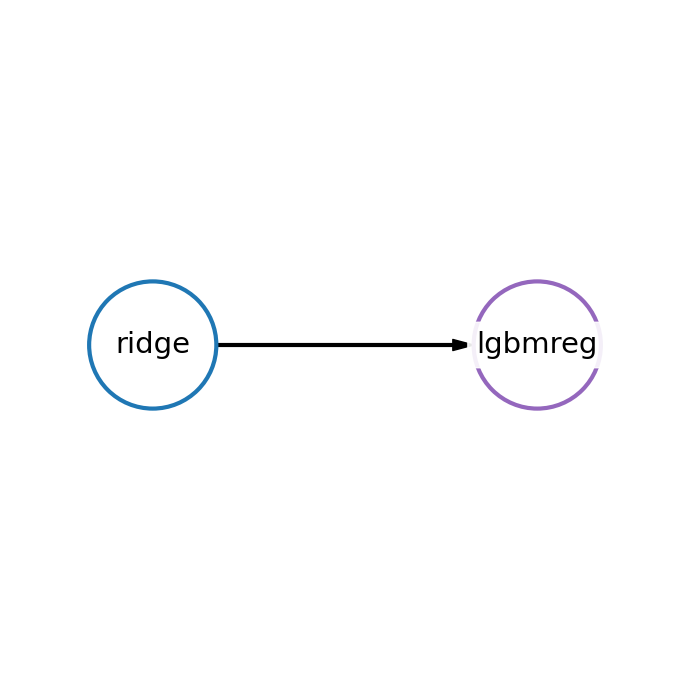

In [7]:
pipeline.show()

In [9]:
# метрика модели, обученной на 1/100 тренировочного датасета
prediction = model.predict(test)
r2_score_100 = r2_score(test.target, prediction)
print(r2_score_100)

0.8517849057310365


### FEDOT + MAB Agent

In [7]:
mutations = [parameter_change_mutation,
             add_resample_mutation,
             MutationTypesEnum.single_change,
             MutationTypesEnum.single_drop,
             MutationTypesEnum.single_add,
             MutationTypesEnum.single_edge]

In [8]:
adaptive_mutation_type = MultiArmedBanditAgent(actions=mutations)

model_mab = Fedot(problem='regression', timeout=30, early_stopping_timeout=np.inf, with_tuning=False, 
                          adaptive_mutation_type=adaptive_mutation_type, seed=42, logging_level=20, n_jobs=-1)

pipeline_mab = model_mab.fit(train)

2025-06-30 18:11:18,011 - TableTypesCorrector - Preprocessing was unable to define the categorical columns
2025-06-30 18:11:19,051 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-06-30 18:11:19,091 - AssumptionsHandler - Initial pipeline fitting started
2025-06-30 18:11:23,618 - AssumptionsHandler - Initial pipeline was fitted successfully
2025-06-30 18:11:23,619 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 22.7 MiB, max: 97.2 MiB
2025-06-30 18:11:23,621 - ApiComposer - Initial pipeline was fitted in 4.5 sec.
2025-06-30 18:11:23,622 - ApiComposer - Taking into account n_folds=5, estimated fit time for initial assumption is 22.7 sec.
2025-06-30 18:11:23,623 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2025-06-30 18:11:23,

Generations:   0%|          | 0/10000 [00:00<?, ?gen/s]

2025-06-30 18:11:23,689 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 18:11:50,083 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 18:11:50,102 - EvoGraphOptimizer - Generation num: 1 size: 3
2025-06-30 18:11:50,104 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 18:11:51,232 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 18:17:15,215 - MultiprocessingDispatcher - 21 individuals out of 21 in previous population were evaluated successfully.
2025-06-30 18:17:15,260 - EvoGraphOptimizer - Generation num: 2 size: 21
2025-06-30 18:17:15,261 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 18:17:15,262 - EvoGraphOptimizer - Next population size: 21; max graph depth: 6
2025-06-30 18:17:19,286 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-

Generations:   0%|          | 1/10000 [07:42<1283:53:47, 462.25s/gen]

2025-06-30 18:19:05,980 - EvoGraphOptimizer - Generation num: 3 size: 21
2025-06-30 18:19:05,981 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 18:19:05,982 - EvoGraphOptimizer - no improvements for 1 iterations
2025-06-30 18:19:05,984 - EvoGraphOptimizer - spent time: 7.7 min
2025-06-30 18:19:05,985 - EvoGraphOptimizer - Next mutation proba: 0.1; Next crossover proba: 0.9
2025-06-30 18:19:05,986 - EvoGraphOptimizer - Next population size: 34; max graph depth: 6
2025-06-30 18:19:09,354 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 18:19:14,861 - MultiprocessingDispatcher - 20 individuals out of 20 in previous population were evaluated successfully.
2025-06-30 18:19:18,254 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 18:19:30,701 - MultiprocessingDispatcher - 14 individuals out of 14 in previous population were evaluated successfully.
2025-06-30 18:19:30,703 - ReproductionCont

Generations:   0%|          | 2/10000 [08:07<569:05:29, 204.91s/gen] 

2025-06-30 18:19:30,787 - EvoGraphOptimizer - Generation num: 4 size: 34
2025-06-30 18:19:30,789 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 18:19:30,790 - EvoGraphOptimizer - Next population size: 34; max graph depth: 6
2025-06-30 18:19:32,528 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 18:19:44,241 - MultiprocessingDispatcher - 34 individuals out of 34 in previous population were evaluated successfully.
2025-06-30 18:19:44,243 - ReproductionController - Reproduction achieved pop size 34 using 1 attempt(s) with success rate 0.971
2025-06-30 18:19:44,245 - MultiArmedBanditAgent - len=4 nonzero=0 
2025-06-30 18:19:44,246 - MultiArmedBanditAgent - actions/rewards: [('single_change', 0.0), ('single_add', 0.0), ('add_resample_mutation', 0.0), ('parameter_change_mutation', 0.0)]
2025-06-30 18:19:44,248 - MultiArmedBanditAgent - exp=[-0.8557  0.0556  3.176  -3.2279  0.0417  0.0833] probs=[0.0423 0

Generations:   0%|          | 3/10000 [08:20<326:22:09, 117.53s/gen]

2025-06-30 18:19:44,322 - EvoGraphOptimizer - Generation num: 5 size: 34
2025-06-30 18:19:44,323 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 18:19:44,325 - EvoGraphOptimizer - no improvements for 1 iterations
2025-06-30 18:19:44,326 - EvoGraphOptimizer - spent time: 8.3 min
2025-06-30 18:19:44,327 - EvoGraphOptimizer - Next mutation proba: 0.7846975020184372; Next crossover proba: 0.21530249798156276
2025-06-30 18:19:44,328 - EvoGraphOptimizer - Next population size: 55; max graph depth: 6
2025-06-30 18:19:47,423 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 18:24:11,852 - MultiprocessingDispatcher - 32 individuals out of 32 in previous population were evaluated successfully.
2025-06-30 18:24:12,771 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 18:24:33,285 - MultiprocessingDispatcher - 18 individuals out of 18 in previous population were evaluated successfully.
2025-06-30 

Generations:   0%|          | 4/10000 [13:09<514:22:03, 185.25s/gen]

2025-06-30 18:24:33,363 - EvoGraphOptimizer - Generation num: 6 size: 25
2025-06-30 18:24:33,364 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 18:24:33,366 - EvoGraphOptimizer - no improvements for 2 iterations
2025-06-30 18:24:33,367 - EvoGraphOptimizer - spent time: 13.2 min
2025-06-30 18:24:33,368 - EvoGraphOptimizer - Next mutation proba: 0.9946001181732931; Next crossover proba: 0.00539988182670692
2025-06-30 18:24:33,370 - EvoGraphOptimizer - Next population size: 25; max graph depth: 6
2025-06-30 18:24:33,814 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 18:29:05,966 - MultiprocessingDispatcher - 11 individuals out of 11 in previous population were evaluated successfully.
2025-06-30 18:29:06,184 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 18:29:10,844 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 1

Generations:   0%|          | 5/10000 [17:50<609:46:33, 219.63s/gen]

2025-06-30 18:29:13,959 - EvoGraphOptimizer - Generation num: 7 size: 25
2025-06-30 18:29:13,961 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 18:29:13,962 - EvoGraphOptimizer - no improvements for 3 iterations
2025-06-30 18:29:13,963 - EvoGraphOptimizer - spent time: 17.8 min
2025-06-30 18:29:13,965 - EvoGraphOptimizer - Next mutation proba: 0.9998954770493325; Next crossover proba: 0.00010452295066754047
2025-06-30 18:29:13,966 - EvoGraphOptimizer - Next population size: 25; max graph depth: 6
2025-06-30 18:29:18,710 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 18:33:33,214 - MultiprocessingDispatcher - 21 individuals out of 21 in previous population were evaluated successfully.
2025-06-30 18:33:37,490 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 18:33:38,410 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-3

Generations:   0%|          | 6/10000 [22:14<652:05:01, 234.89s/gen]

2025-06-30 18:33:38,477 - EvoGraphOptimizer - Generation num: 8 size: 25
2025-06-30 18:33:38,479 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 18:33:38,480 - EvoGraphOptimizer - no improvements for 4 iterations
2025-06-30 18:33:38,481 - EvoGraphOptimizer - spent time: 22.2 min
2025-06-30 18:33:38,483 - EvoGraphOptimizer - Next mutation proba: 0.9999537561791549; Next crossover proba: 4.624382084505996e-05
2025-06-30 18:33:38,484 - EvoGraphOptimizer - Next population size: 25; max graph depth: 6
2025-06-30 18:33:46,061 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 18:33:49,859 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 18:33:50,357 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 18:34:11,557 - MultiprocessingDispatcher - 14 individuals out of 14 in previous population were evaluated successfully.
2025-06-30

Generations:   0%|          | 7/10000 [22:51<472:36:35, 170.26s/gen]

2025-06-30 18:34:15,675 - EvoGraphOptimizer - Generation num: 9 size: 25
2025-06-30 18:34:15,677 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 18:34:15,678 - EvoGraphOptimizer - no improvements for 5 iterations
2025-06-30 18:34:15,679 - EvoGraphOptimizer - spent time: 22.9 min
2025-06-30 18:34:15,681 - EvoGraphOptimizer - Next mutation proba: 0.99996320612723; Next crossover proba: 3.6793872770002345e-05
2025-06-30 18:34:15,682 - EvoGraphOptimizer - Next population size: 25; max graph depth: 6
2025-06-30 18:34:26,055 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 18:34:34,294 - MultiprocessingDispatcher - 15 individuals out of 15 in previous population were evaluated successfully.
2025-06-30 18:34:34,683 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 18:34:37,605 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.
2025-06-30 

Generations:   0%|          | 8/10000 [23:13<341:33:40, 123.06s/gen]

2025-06-30 18:34:37,672 - EvoGraphOptimizer - Generation num: 10 size: 25
2025-06-30 18:34:37,673 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 18:34:37,674 - EvoGraphOptimizer - no improvements for 6 iterations
2025-06-30 18:34:37,675 - EvoGraphOptimizer - spent time: 23.2 min
2025-06-30 18:34:37,677 - EvoGraphOptimizer - Next mutation proba: 0.9999937744230526; Next crossover proba: 6.225576947405109e-06
2025-06-30 18:34:37,678 - EvoGraphOptimizer - Next population size: 25; max graph depth: 6
2025-06-30 18:34:38,385 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 18:34:40,688 - MultiprocessingDispatcher - 14 individuals out of 14 in previous population were evaluated successfully.
2025-06-30 18:34:46,834 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 18:34:48,764 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-3

Generations:   0%|          | 9/10000 [27:54<477:57:42, 172.22s/gen]

2025-06-30 18:39:17,959 - EvoGraphOptimizer - Generation num: 11 size: 11
2025-06-30 18:39:17,960 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.300>']
2025-06-30 18:39:17,961 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 9/10000 [27:54<516:17:10, 186.03s/gen]

2025-06-30 18:39:17,963 - OptimisationTimer - Composition time: 27.905 min
2025-06-30 18:39:17,965 - OptimisationTimer - Algorithm was terminated due to processing time limit
2025-06-30 18:39:17,969 - EvoGraphOptimizer - Generation num: 12 size: 1
2025-06-30 18:39:17,970 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.300>']
2025-06-30 18:39:17,971 - EvoGraphOptimizer - no improvements for 1 iterations
2025-06-30 18:39:17,972 - EvoGraphOptimizer - spent time: 27.9 min
2025-06-30 18:39:17,976 - GPComposer - GP composition finished
2025-06-30 18:39:18,109 - ApiComposer - Model generation finished


2025-06-30 18:39:19,215 - FEDOT logger - Final pipeline was fitted
2025-06-30 18:39:19,216 - FEDOT logger - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, isolation_forest_reg, scaling]}
ridge - {'alpha': 9.521355892548376}
isolation_forest_reg - {}
scaling - {}
2025-06-30 18:39:19,217 - MemoryAnalytics - Memory consumption for finish in main session: current 25.1 MiB, max: 97.2 MiB


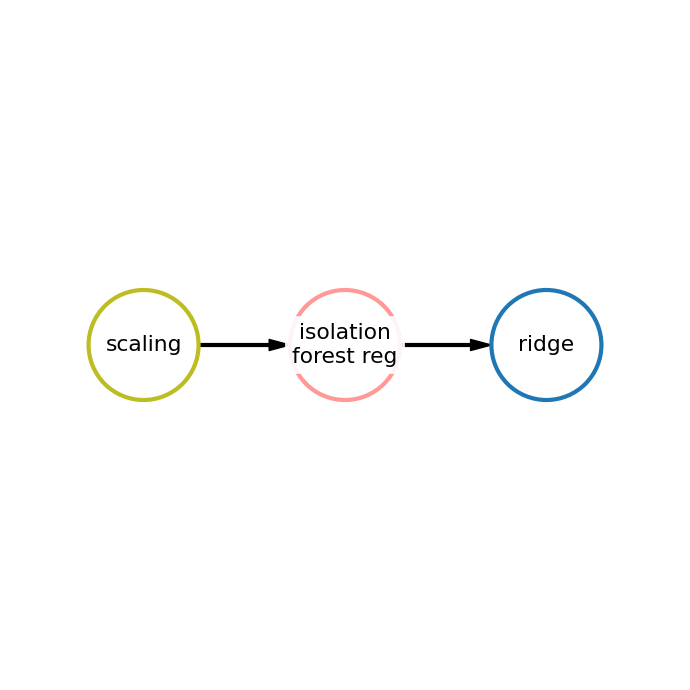

In [9]:
pipeline_mab.show()

In [10]:
# метрика модели, обученной на 1/100 тренировочного датасета
prediction = model_mab.predict(test)
r2_score_100 = r2_score(test.target, prediction)
print(r2_score_100)

0.8411962851660488


### FEDOT + Contextual MAB Agent

In [22]:
# вероятно получить available_operations можно более элегантно, используя специально созданную
# для этого get_all_available_operations() из PipelineOptNodeFactory

available_operations = get_operations_for_task(task=Task(TaskTypesEnum.regression))
print(available_operations)

# можно проще: adaptive_mutation_type = 'contextual_bandit' или 
# adaptive_mutation_type=MutationAgentTypeEnum.contextual_bandit
# но в таком случае не получится управлять типом контекста (по умолчанию: nodes_num)

adaptive_mutation_type = ContextualMultiArmedBanditAgent(actions=mutations, available_operations=available_operations,
                                                         context_agent_type=ContextAgentTypeEnum.labeled_edges)

['adareg', 'catboostreg', 'knnreg', 'lasso', 'lgbmreg', 'linear', 'rfr', 'ridge', 'xgboostreg', 'scaling', 'normalization', 'pca', 'fast_ica', 'poly_features', 'ransac_lin_reg', 'ransac_non_lin_reg', 'isolation_forest_reg']


In [23]:
model_cmab = Fedot(problem='regression', timeout=30, with_tuning=False, logging_level=20, 
                   early_stopping_timeout=np.inf, early_stopping_iterations=None, seed=42, n_jobs=-1, 
                   adaptive_mutation_type=adaptive_mutation_type)

pipeline_cmab = model_cmab.fit(train)

2025-06-30 20:30:39,251 - TableTypesCorrector - Preprocessing was unable to define the categorical columns
2025-06-30 20:30:39,420 - AssumptionsHandler - Initial pipeline fitting started
2025-06-30 20:30:43,910 - AssumptionsHandler - Initial pipeline was fitted successfully
2025-06-30 20:30:43,912 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 3.9 MiB, max: 78.5 MiB
2025-06-30 20:30:43,914 - ApiComposer - Initial pipeline was fitted in 4.5 sec.
2025-06-30 20:30:43,915 - ApiComposer - Taking into account n_folds=5, estimated fit time for initial assumption is 22.5 sec.
2025-06-30 20:30:43,916 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2025-06-30 20:30:43,924 - ApiComposer - AutoML configured. Parameters tuning: False. Time limit: 30 min. Set of candidate models: ['adareg', 'catboostreg', 'fast_ica', 'isolation_forest_reg', 'knnreg', 'lasso', 'lgbmreg', 'linear', 'normaliz

Generations:   0%|          | 0/10000 [00:00<?, ?gen/s]

2025-06-30 20:30:43,974 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:31:10,594 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:31:10,603 - EvoGraphOptimizer - Generation num: 1 size: 3
2025-06-30 20:31:10,605 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:31:11,925 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:31:42,758 - MultiprocessingDispatcher - 21 individuals out of 21 in previous population were evaluated successfully.
2025-06-30 20:31:42,801 - EvoGraphOptimizer - Generation num: 2 size: 21
2025-06-30 20:31:42,803 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:31:42,804 - EvoGraphOptimizer - Next population size: 21; max graph depth: 6
2025-06-30 20:31:43,373 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-

Generations:   0%|          | 1/10000 [01:24<235:50:40, 84.91s/gen]

2025-06-30 20:32:08,927 - EvoGraphOptimizer - Generation num: 3 size: 21
2025-06-30 20:32:08,928 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:32:08,930 - EvoGraphOptimizer - no improvements for 1 iterations
2025-06-30 20:32:08,931 - EvoGraphOptimizer - spent time: 1.4 min
2025-06-30 20:32:08,932 - EvoGraphOptimizer - Next mutation proba: 0.1; Next crossover proba: 0.9
2025-06-30 20:32:08,933 - EvoGraphOptimizer - Next population size: 34; max graph depth: 6
2025-06-30 20:32:09,214 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:32:14,022 - MultiprocessingDispatcher - 20 individuals out of 20 in previous population were evaluated successfully.
2025-06-30 20:32:14,238 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:32:27,237 - MultiprocessingDispatcher - 14 individuals out of 14 in previous population were evaluated successfully.
2025-06-30 20:32:27,240 - ReproductionCont

Generations:   0%|          | 2/10000 [01:43<127:09:37, 45.79s/gen]

2025-06-30 20:32:27,371 - EvoGraphOptimizer - Generation num: 4 size: 34
2025-06-30 20:32:27,372 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:32:27,373 - EvoGraphOptimizer - no improvements for 2 iterations
2025-06-30 20:32:27,374 - EvoGraphOptimizer - spent time: 1.7 min
2025-06-30 20:32:27,376 - EvoGraphOptimizer - Next mutation proba: 0.2535304052393049; Next crossover proba: 0.7464695947606951
2025-06-30 20:32:27,377 - EvoGraphOptimizer - Next population size: 55; max graph depth: 6
2025-06-30 20:32:27,832 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:32:33,248 - MultiprocessingDispatcher - 32 individuals out of 32 in previous population were evaluated successfully.
2025-06-30 20:32:33,649 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:32:36,317 - MultiprocessingDispatcher - 22 individuals out of 22 in previous population were evaluated successfully.
2025-06-30 2

Generations:   0%|          | 3/10000 [01:52<80:38:08, 29.04s/gen] 

2025-06-30 20:32:36,491 - EvoGraphOptimizer - Generation num: 5 size: 55
2025-06-30 20:32:36,492 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:32:36,494 - EvoGraphOptimizer - Next population size: 55; max graph depth: 6
2025-06-30 20:32:37,266 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:32:40,820 - MultiprocessingDispatcher - 48 individuals out of 48 in previous population were evaluated successfully.
2025-06-30 20:32:40,955 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:32:41,778 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:32:41,780 - ReproductionController - Reproduction achieved pop size 53 using 2 attempt(s) with success rate 0.866
2025-06-30 20:32:41,781 - ContextualMultiArmedBanditAgent - len=7 nonzero=0 
2025-06-30 20:32:41,782 - ContextualMultiArmedBanditAgent - actions/rewards: [('pa

Generations:   0%|          | 4/10000 [01:57<54:47:31, 19.73s/gen]

2025-06-30 20:32:41,888 - EvoGraphOptimizer - Generation num: 6 size: 12
2025-06-30 20:32:41,889 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:32:41,890 - EvoGraphOptimizer - no improvements for 1 iterations
2025-06-30 20:32:41,891 - EvoGraphOptimizer - spent time: 2.0 min
2025-06-30 20:32:41,892 - EvoGraphOptimizer - Next mutation proba: 0.9999992716433895; Next crossover proba: 7.283566104687722e-07
2025-06-30 20:32:41,893 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:32:42,137 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:32:43,170 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:32:43,331 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:32:44,193 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20

Generations:   0%|          | 5/10000 [02:01<38:28:47, 13.86s/gen]

2025-06-30 20:32:45,331 - EvoGraphOptimizer - Generation num: 7 size: 12
2025-06-30 20:32:45,332 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:32:45,333 - EvoGraphOptimizer - no improvements for 2 iterations
2025-06-30 20:32:45,335 - EvoGraphOptimizer - spent time: 2.0 min
2025-06-30 20:32:45,336 - EvoGraphOptimizer - Next mutation proba: 0.9999993057987581; Next crossover proba: 6.942012419353105e-07
2025-06-30 20:32:45,337 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:32:45,585 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:32:46,623 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:32:46,787 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:32:47,647 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20

Generations:   0%|          | 6/10000 [02:05<29:23:30, 10.59s/gen]

2025-06-30 20:32:49,563 - EvoGraphOptimizer - Generation num: 8 size: 12
2025-06-30 20:32:49,564 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:32:49,565 - EvoGraphOptimizer - no improvements for 3 iterations
2025-06-30 20:32:49,567 - EvoGraphOptimizer - spent time: 2.1 min
2025-06-30 20:32:49,568 - EvoGraphOptimizer - Next mutation proba: 0.99999923585424; Next crossover proba: 7.64145760001611e-07
2025-06-30 20:32:49,569 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:32:49,801 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:32:51,109 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:32:51,321 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:32:52,435 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:32

Generations:   0%|          | 7/10000 [02:09<23:20:35,  8.41s/gen]

2025-06-30 20:32:53,496 - EvoGraphOptimizer - Generation num: 9 size: 12
2025-06-30 20:32:53,497 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:32:53,498 - EvoGraphOptimizer - no improvements for 4 iterations
2025-06-30 20:32:53,499 - EvoGraphOptimizer - spent time: 2.2 min
2025-06-30 20:32:53,501 - EvoGraphOptimizer - Next mutation proba: 0.9999994094818975; Next crossover proba: 5.905181025278594e-07
2025-06-30 20:32:53,502 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:32:53,736 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:32:54,688 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:32:54,891 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:32:55,823 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20

Generations:   0%|          | 8/10000 [02:12<18:53:11,  6.80s/gen]

2025-06-30 20:32:56,862 - EvoGraphOptimizer - Generation num: 10 size: 12
2025-06-30 20:32:56,864 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:32:56,865 - EvoGraphOptimizer - no improvements for 5 iterations
2025-06-30 20:32:56,866 - EvoGraphOptimizer - spent time: 2.2 min
2025-06-30 20:32:56,868 - EvoGraphOptimizer - Next mutation proba: 0.9999997659767987; Next crossover proba: 2.340232012620902e-07
2025-06-30 20:32:56,869 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:32:57,141 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:32:58,234 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:32:58,394 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:32:59,290 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 2

Generations:   0%|          | 9/10000 [02:16<15:54:33,  5.73s/gen]

2025-06-30 20:33:00,234 - EvoGraphOptimizer - Generation num: 11 size: 12
2025-06-30 20:33:00,236 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:33:00,237 - EvoGraphOptimizer - no improvements for 6 iterations
2025-06-30 20:33:00,238 - EvoGraphOptimizer - spent time: 2.3 min
2025-06-30 20:33:00,239 - EvoGraphOptimizer - Next mutation proba: 0.9999998172558603; Next crossover proba: 1.8274413970953418e-07
2025-06-30 20:33:00,240 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:33:00,486 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:01,683 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:33:01,821 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:02,801 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 

Generations:   0%|          | 10/10000 [02:18<13:16:35,  4.78s/gen]

2025-06-30 20:33:02,902 - EvoGraphOptimizer - Generation num: 12 size: 12
2025-06-30 20:33:02,903 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:33:02,904 - EvoGraphOptimizer - no improvements for 7 iterations
2025-06-30 20:33:02,906 - EvoGraphOptimizer - spent time: 2.3 min
2025-06-30 20:33:02,907 - EvoGraphOptimizer - Next mutation proba: 0.9999999006704976; Next crossover proba: 9.932950240099103e-08
2025-06-30 20:33:02,908 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:33:03,154 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:04,351 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:33:04,488 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:05,483 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 2

Generations:   0%|          | 11/10000 [02:21<11:29:30,  4.14s/gen]

2025-06-30 20:33:05,584 - EvoGraphOptimizer - Generation num: 13 size: 12
2025-06-30 20:33:05,585 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:33:05,586 - EvoGraphOptimizer - no improvements for 8 iterations
2025-06-30 20:33:05,588 - EvoGraphOptimizer - spent time: 2.4 min
2025-06-30 20:33:05,589 - EvoGraphOptimizer - Next mutation proba: 0.9999996731279733; Next crossover proba: 3.268720266680347e-07
2025-06-30 20:33:05,590 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:33:05,845 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:07,097 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:33:07,228 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:08,182 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 2

Generations:   0%|          | 12/10000 [02:24<10:16:23,  3.70s/gen]

2025-06-30 20:33:08,283 - EvoGraphOptimizer - Generation num: 14 size: 12
2025-06-30 20:33:08,284 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:33:08,285 - EvoGraphOptimizer - no improvements for 9 iterations
2025-06-30 20:33:08,286 - EvoGraphOptimizer - spent time: 2.4 min
2025-06-30 20:33:08,287 - EvoGraphOptimizer - Next mutation proba: 0.999999647416157; Next crossover proba: 3.525838430107342e-07
2025-06-30 20:33:08,289 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:33:08,551 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:10,132 - MultiprocessingDispatcher - 10 individuals out of 10 in previous population were evaluated successfully.
2025-06-30 20:33:10,224 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:11,121 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 

Generations:   0%|          | 13/10000 [02:27<9:37:52,  3.47s/gen] 

2025-06-30 20:33:11,219 - EvoGraphOptimizer - Generation num: 15 size: 12
2025-06-30 20:33:11,221 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:33:11,222 - EvoGraphOptimizer - no improvements for 10 iterations
2025-06-30 20:33:11,223 - EvoGraphOptimizer - spent time: 2.5 min
2025-06-30 20:33:11,224 - EvoGraphOptimizer - Next mutation proba: 0.9999994246595059; Next crossover proba: 5.753404941355456e-07
2025-06-30 20:33:11,225 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:33:11,469 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:12,687 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:33:12,844 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:13,742 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 

Generations:   0%|          | 14/10000 [02:30<9:43:33,  3.51s/gen]

2025-06-30 20:33:14,802 - EvoGraphOptimizer - Generation num: 16 size: 12
2025-06-30 20:33:14,803 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:33:14,804 - EvoGraphOptimizer - no improvements for 11 iterations
2025-06-30 20:33:14,805 - EvoGraphOptimizer - spent time: 2.5 min
2025-06-30 20:33:14,806 - EvoGraphOptimizer - Next mutation proba: 0.999999397716278; Next crossover proba: 6.022837220065469e-07
2025-06-30 20:33:14,807 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:33:15,052 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:16,233 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:33:16,390 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:17,269 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 2

Generations:   0%|          | 15/10000 [02:34<9:39:43,  3.48s/gen]

2025-06-30 20:33:18,234 - EvoGraphOptimizer - Generation num: 17 size: 12
2025-06-30 20:33:18,235 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:33:18,236 - EvoGraphOptimizer - no improvements for 12 iterations
2025-06-30 20:33:18,237 - EvoGraphOptimizer - spent time: 2.6 min
2025-06-30 20:33:18,239 - EvoGraphOptimizer - Next mutation proba: 0.9999997926126926; Next crossover proba: 2.0738730743818934e-07
2025-06-30 20:33:18,240 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:33:18,488 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:19,630 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:33:19,803 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:20,940 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30

Generations:   0%|          | 16/10000 [02:37<9:05:40,  3.28s/gen]

2025-06-30 20:33:21,044 - EvoGraphOptimizer - Generation num: 18 size: 12
2025-06-30 20:33:21,045 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:33:21,046 - EvoGraphOptimizer - no improvements for 13 iterations
2025-06-30 20:33:21,047 - EvoGraphOptimizer - spent time: 2.6 min
2025-06-30 20:33:21,049 - EvoGraphOptimizer - Next mutation proba: 0.9999996338258063; Next crossover proba: 3.661741937444063e-07
2025-06-30 20:33:21,050 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:33:21,294 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:22,330 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:33:22,535 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:23,642 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 

Generations:   0%|          | 17/10000 [02:39<8:36:31,  3.10s/gen]

2025-06-30 20:33:23,741 - EvoGraphOptimizer - Generation num: 19 size: 12
2025-06-30 20:33:23,742 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:33:23,744 - EvoGraphOptimizer - no improvements for 14 iterations
2025-06-30 20:33:23,745 - EvoGraphOptimizer - spent time: 2.7 min
2025-06-30 20:33:23,746 - EvoGraphOptimizer - Next mutation proba: 0.9999997136234537; Next crossover proba: 2.863765462546297e-07
2025-06-30 20:33:23,748 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:33:23,997 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:25,067 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:33:25,277 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:26,409 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 

Generations:   0%|          | 18/10000 [02:42<8:19:32,  3.00s/gen]

2025-06-30 20:33:26,502 - EvoGraphOptimizer - Generation num: 20 size: 12
2025-06-30 20:33:26,503 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:33:26,504 - EvoGraphOptimizer - no improvements for 15 iterations
2025-06-30 20:33:26,505 - EvoGraphOptimizer - spent time: 2.7 min
2025-06-30 20:33:26,507 - EvoGraphOptimizer - Next mutation proba: 0.9999997815407267; Next crossover proba: 2.1845927333785653e-07
2025-06-30 20:33:26,508 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:33:26,749 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:27,801 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:33:28,064 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:29,176 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30

Generations:   0%|          | 19/10000 [02:45<8:07:53,  2.93s/gen]

2025-06-30 20:33:29,282 - EvoGraphOptimizer - Generation num: 21 size: 12
2025-06-30 20:33:29,284 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:33:29,285 - EvoGraphOptimizer - no improvements for 16 iterations
2025-06-30 20:33:29,286 - EvoGraphOptimizer - spent time: 2.8 min
2025-06-30 20:33:29,287 - EvoGraphOptimizer - Next mutation proba: 0.9999995711668956; Next crossover proba: 4.2883310436003796e-07
2025-06-30 20:33:29,289 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:33:29,520 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:30,487 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:33:30,727 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:31,750 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30

Generations:   0%|          | 20/10000 [02:48<8:33:30,  3.09s/gen]

2025-06-30 20:33:32,725 - EvoGraphOptimizer - Generation num: 22 size: 12
2025-06-30 20:33:32,727 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:33:32,728 - EvoGraphOptimizer - no improvements for 17 iterations
2025-06-30 20:33:32,729 - EvoGraphOptimizer - spent time: 2.8 min
2025-06-30 20:33:32,730 - EvoGraphOptimizer - Next mutation proba: 0.9999997204249286; Next crossover proba: 2.795750714268408e-07
2025-06-30 20:33:32,731 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:33:33,002 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:34,303 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:33:34,427 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:35,210 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-30 

Generations:   0%|          | 21/10000 [02:52<8:50:38,  3.19s/gen]

2025-06-30 20:33:36,150 - EvoGraphOptimizer - Generation num: 23 size: 12
2025-06-30 20:33:36,152 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:33:36,153 - EvoGraphOptimizer - no improvements for 18 iterations
2025-06-30 20:33:36,154 - EvoGraphOptimizer - spent time: 2.9 min
2025-06-30 20:33:36,155 - EvoGraphOptimizer - Next mutation proba: 0.9999994103048421; Next crossover proba: 5.896951579265064e-07
2025-06-30 20:33:36,156 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:33:36,392 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:37,446 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:33:37,694 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:38,916 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 

Generations:   0%|          | 22/10000 [02:55<8:34:00,  3.09s/gen]

2025-06-30 20:33:39,008 - EvoGraphOptimizer - Generation num: 24 size: 12
2025-06-30 20:33:39,009 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:33:39,011 - EvoGraphOptimizer - no improvements for 19 iterations
2025-06-30 20:33:39,012 - EvoGraphOptimizer - spent time: 2.9 min
2025-06-30 20:33:39,013 - EvoGraphOptimizer - Next mutation proba: 0.9999993018066502; Next crossover proba: 6.981933498018122e-07
2025-06-30 20:33:39,015 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:33:39,260 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:40,257 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:33:40,494 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:41,504 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 

Generations:   0%|          | 23/10000 [02:58<8:49:19,  3.18s/gen]

2025-06-30 20:33:42,413 - EvoGraphOptimizer - Generation num: 25 size: 12
2025-06-30 20:33:42,414 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:33:42,415 - EvoGraphOptimizer - no improvements for 20 iterations
2025-06-30 20:33:42,416 - EvoGraphOptimizer - spent time: 3.0 min
2025-06-30 20:33:42,418 - EvoGraphOptimizer - Next mutation proba: 0.9999994593550899; Next crossover proba: 5.40644910063115e-07
2025-06-30 20:33:42,419 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:33:42,665 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:43,756 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:33:44,014 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:45,179 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 2

Generations:   0%|          | 24/10000 [03:01<8:33:53,  3.09s/gen]

2025-06-30 20:33:45,285 - EvoGraphOptimizer - Generation num: 26 size: 12
2025-06-30 20:33:45,286 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:33:45,287 - EvoGraphOptimizer - no improvements for 21 iterations
2025-06-30 20:33:45,288 - EvoGraphOptimizer - spent time: 3.0 min
2025-06-30 20:33:45,290 - EvoGraphOptimizer - Next mutation proba: 0.9999993800168846; Next crossover proba: 6.199831154019009e-07
2025-06-30 20:33:45,291 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:33:45,528 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:46,856 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:33:47,114 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:48,403 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 

Generations:   0%|          | 25/10000 [03:04<8:40:17,  3.13s/gen]

2025-06-30 20:33:48,507 - EvoGraphOptimizer - Generation num: 27 size: 12
2025-06-30 20:33:48,509 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:33:48,510 - EvoGraphOptimizer - no improvements for 22 iterations
2025-06-30 20:33:48,511 - EvoGraphOptimizer - spent time: 3.1 min
2025-06-30 20:33:48,512 - EvoGraphOptimizer - Next mutation proba: 0.9999995150581698; Next crossover proba: 4.849418302477204e-07
2025-06-30 20:33:48,513 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:33:48,765 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:49,924 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:33:50,080 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:50,864 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-30 

Generations:   0%|          | 26/10000 [03:07<8:55:28,  3.22s/gen]

2025-06-30 20:33:51,941 - EvoGraphOptimizer - Generation num: 28 size: 12
2025-06-30 20:33:51,942 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:33:51,943 - EvoGraphOptimizer - no improvements for 23 iterations
2025-06-30 20:33:51,944 - EvoGraphOptimizer - spent time: 3.1 min
2025-06-30 20:33:51,946 - EvoGraphOptimizer - Next mutation proba: 0.9999999465833125; Next crossover proba: 5.341668751768225e-08
2025-06-30 20:33:51,947 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:33:52,183 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:53,278 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:33:53,530 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:54,717 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 

Generations:   0%|          | 27/10000 [03:10<8:38:18,  3.12s/gen]

2025-06-30 20:33:54,819 - EvoGraphOptimizer - Generation num: 29 size: 12
2025-06-30 20:33:54,820 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:33:54,821 - EvoGraphOptimizer - no improvements for 24 iterations
2025-06-30 20:33:54,822 - EvoGraphOptimizer - spent time: 3.2 min
2025-06-30 20:33:54,824 - EvoGraphOptimizer - Next mutation proba: 0.9999995998326269; Next crossover proba: 4.0016737312686956e-07
2025-06-30 20:33:54,825 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:33:55,073 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:56,267 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:33:56,425 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:57,335 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30

Generations:   0%|          | 28/10000 [03:14<8:53:42,  3.21s/gen]

2025-06-30 20:33:58,243 - EvoGraphOptimizer - Generation num: 30 size: 12
2025-06-30 20:33:58,244 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:33:58,245 - EvoGraphOptimizer - no improvements for 25 iterations
2025-06-30 20:33:58,247 - EvoGraphOptimizer - spent time: 3.2 min
2025-06-30 20:33:58,248 - EvoGraphOptimizer - Next mutation proba: 0.9999999540286222; Next crossover proba: 4.597137781559013e-08
2025-06-30 20:33:58,249 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:33:58,480 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:33:59,395 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:33:59,663 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:01,047 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.
2025-06-30 

Generations:   0%|          | 29/10000 [03:17<8:38:29,  3.12s/gen]

2025-06-30 20:34:01,157 - EvoGraphOptimizer - Generation num: 31 size: 12
2025-06-30 20:34:01,158 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:34:01,159 - EvoGraphOptimizer - no improvements for 26 iterations
2025-06-30 20:34:01,161 - EvoGraphOptimizer - spent time: 3.3 min
2025-06-30 20:34:01,162 - EvoGraphOptimizer - Next mutation proba: 0.9999992207445649; Next crossover proba: 7.792554350682934e-07
2025-06-30 20:34:01,163 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:34:01,407 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:02,534 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:34:02,730 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:03,684 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 

Generations:   0%|          | 30/10000 [03:20<9:01:55,  3.26s/gen]

2025-06-30 20:34:04,748 - EvoGraphOptimizer - Generation num: 32 size: 12
2025-06-30 20:34:04,749 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:34:04,750 - EvoGraphOptimizer - no improvements for 27 iterations
2025-06-30 20:34:04,751 - EvoGraphOptimizer - spent time: 3.3 min
2025-06-30 20:34:04,752 - EvoGraphOptimizer - Next mutation proba: 0.999999961809545; Next crossover proba: 3.819045502062579e-08
2025-06-30 20:34:04,753 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:34:04,994 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:05,999 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:34:06,236 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:07,293 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 2

Generations:   0%|          | 31/10000 [03:24<9:20:36,  3.37s/gen]

2025-06-30 20:34:08,380 - EvoGraphOptimizer - Generation num: 33 size: 12
2025-06-30 20:34:08,381 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:34:08,383 - EvoGraphOptimizer - no improvements for 28 iterations
2025-06-30 20:34:08,384 - EvoGraphOptimizer - spent time: 3.4 min
2025-06-30 20:34:08,385 - EvoGraphOptimizer - Next mutation proba: 0.9999998452154825; Next crossover proba: 1.5478451753647704e-07
2025-06-30 20:34:08,386 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:34:08,612 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:09,575 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:34:09,820 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:10,952 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30

Generations:   0%|          | 32/10000 [03:27<8:45:21,  3.16s/gen]

2025-06-30 20:34:11,052 - EvoGraphOptimizer - Generation num: 34 size: 12
2025-06-30 20:34:11,053 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:34:11,054 - EvoGraphOptimizer - no improvements for 29 iterations
2025-06-30 20:34:11,055 - EvoGraphOptimizer - spent time: 3.5 min
2025-06-30 20:34:11,057 - EvoGraphOptimizer - Next mutation proba: 0.9999986202313774; Next crossover proba: 1.3797686225780481e-06
2025-06-30 20:34:11,058 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:34:11,298 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:12,341 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:34:12,572 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:13,475 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30

Generations:   0%|          | 33/10000 [03:30<9:16:32,  3.35s/gen]

2025-06-30 20:34:14,842 - EvoGraphOptimizer - Generation num: 35 size: 12
2025-06-30 20:34:14,844 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:34:14,845 - EvoGraphOptimizer - no improvements for 30 iterations
2025-06-30 20:34:14,846 - EvoGraphOptimizer - spent time: 3.5 min
2025-06-30 20:34:14,847 - EvoGraphOptimizer - Next mutation proba: 0.9999994648757052; Next crossover proba: 5.351242947648771e-07
2025-06-30 20:34:14,848 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:34:15,096 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:16,161 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:34:16,358 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:17,328 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 

Generations:   0%|          | 34/10000 [03:34<9:20:59,  3.38s/gen]

2025-06-30 20:34:18,285 - EvoGraphOptimizer - Generation num: 36 size: 12
2025-06-30 20:34:18,286 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:34:18,287 - EvoGraphOptimizer - no improvements for 31 iterations
2025-06-30 20:34:18,288 - EvoGraphOptimizer - spent time: 3.6 min
2025-06-30 20:34:18,289 - EvoGraphOptimizer - Next mutation proba: 0.999999680370604; Next crossover proba: 3.196293959506491e-07
2025-06-30 20:34:18,291 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:34:18,521 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:19,548 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:34:19,793 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:21,002 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 2

Generations:   0%|          | 35/10000 [03:37<8:53:10,  3.21s/gen]

2025-06-30 20:34:21,104 - EvoGraphOptimizer - Generation num: 37 size: 12
2025-06-30 20:34:21,105 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:34:21,106 - EvoGraphOptimizer - no improvements for 32 iterations
2025-06-30 20:34:21,107 - EvoGraphOptimizer - spent time: 3.6 min
2025-06-30 20:34:21,109 - EvoGraphOptimizer - Next mutation proba: 0.9999999316010617; Next crossover proba: 6.83989382910255e-08
2025-06-30 20:34:21,110 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:34:21,336 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:22,312 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:34:22,555 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:23,559 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 2

Generations:   0%|          | 36/10000 [03:40<9:14:50,  3.34s/gen]

2025-06-30 20:34:24,749 - EvoGraphOptimizer - Generation num: 38 size: 12
2025-06-30 20:34:24,750 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:34:24,751 - EvoGraphOptimizer - no improvements for 33 iterations
2025-06-30 20:34:24,753 - EvoGraphOptimizer - spent time: 3.7 min
2025-06-30 20:34:24,754 - EvoGraphOptimizer - Next mutation proba: 0.9999995725579411; Next crossover proba: 4.2744205885902886e-07
2025-06-30 20:34:24,755 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:34:24,992 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:25,990 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:34:26,244 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:27,461 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30

Generations:   0%|          | 37/10000 [03:43<8:48:35,  3.18s/gen]

2025-06-30 20:34:27,560 - EvoGraphOptimizer - Generation num: 39 size: 12
2025-06-30 20:34:27,562 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:34:27,563 - EvoGraphOptimizer - no improvements for 34 iterations
2025-06-30 20:34:27,564 - EvoGraphOptimizer - spent time: 3.7 min
2025-06-30 20:34:27,565 - EvoGraphOptimizer - Next mutation proba: 0.9999999743387963; Next crossover proba: 2.566120371749747e-08
2025-06-30 20:34:27,566 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:34:27,817 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:29,075 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:34:29,196 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:29,970 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-30 

Generations:   0%|          | 38/10000 [03:46<8:57:02,  3.23s/gen]

2025-06-30 20:34:30,921 - EvoGraphOptimizer - Generation num: 40 size: 12
2025-06-30 20:34:30,922 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:34:30,923 - EvoGraphOptimizer - no improvements for 35 iterations
2025-06-30 20:34:30,925 - EvoGraphOptimizer - spent time: 3.8 min
2025-06-30 20:34:30,926 - EvoGraphOptimizer - Next mutation proba: 0.9999991525398119; Next crossover proba: 8.474601881358623e-07
2025-06-30 20:34:30,927 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:34:31,175 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:32,316 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:34:32,488 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:33,499 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 

Generations:   0%|          | 39/10000 [03:49<8:29:50,  3.07s/gen]

2025-06-30 20:34:33,602 - EvoGraphOptimizer - Generation num: 41 size: 12
2025-06-30 20:34:33,603 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:34:33,604 - EvoGraphOptimizer - no improvements for 36 iterations
2025-06-30 20:34:33,605 - EvoGraphOptimizer - spent time: 3.8 min
2025-06-30 20:34:33,606 - EvoGraphOptimizer - Next mutation proba: 0.9999997750191408; Next crossover proba: 2.249808591647806e-07
2025-06-30 20:34:33,608 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:34:33,863 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:35,099 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:34:35,227 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:36,185 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 

Generations:   0%|          | 40/10000 [03:52<8:10:22,  2.95s/gen]

2025-06-30 20:34:36,283 - EvoGraphOptimizer - Generation num: 42 size: 12
2025-06-30 20:34:36,284 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:34:36,285 - EvoGraphOptimizer - no improvements for 37 iterations
2025-06-30 20:34:36,286 - EvoGraphOptimizer - spent time: 3.9 min
2025-06-30 20:34:36,288 - EvoGraphOptimizer - Next mutation proba: 0.9999998753351643; Next crossover proba: 1.2466483567674658e-07
2025-06-30 20:34:36,289 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:34:36,536 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:37,671 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:34:37,845 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:38,837 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30

Generations:   0%|          | 41/10000 [03:54<7:55:14,  2.86s/gen]

2025-06-30 20:34:38,940 - EvoGraphOptimizer - Generation num: 43 size: 12
2025-06-30 20:34:38,941 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:34:38,943 - EvoGraphOptimizer - no improvements for 38 iterations
2025-06-30 20:34:38,944 - EvoGraphOptimizer - spent time: 3.9 min
2025-06-30 20:34:38,946 - EvoGraphOptimizer - Next mutation proba: 0.9999999060079254; Next crossover proba: 9.399207456795011e-08
2025-06-30 20:34:38,947 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:34:39,182 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:40,196 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:34:40,453 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:41,781 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 

Generations:   0%|          | 42/10000 [03:57<7:59:11,  2.89s/gen]

2025-06-30 20:34:41,884 - EvoGraphOptimizer - Generation num: 44 size: 12
2025-06-30 20:34:41,885 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:34:41,887 - EvoGraphOptimizer - no improvements for 39 iterations
2025-06-30 20:34:41,888 - EvoGraphOptimizer - spent time: 4.0 min
2025-06-30 20:34:41,889 - EvoGraphOptimizer - Next mutation proba: 0.9999998634730276; Next crossover proba: 1.3652697239407985e-07
2025-06-30 20:34:41,891 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:34:42,136 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:43,331 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:34:43,498 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:44,497 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30

Generations:   0%|          | 43/10000 [04:00<7:50:31,  2.84s/gen]

2025-06-30 20:34:44,597 - EvoGraphOptimizer - Generation num: 45 size: 12
2025-06-30 20:34:44,599 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:34:44,600 - EvoGraphOptimizer - no improvements for 40 iterations
2025-06-30 20:34:44,601 - EvoGraphOptimizer - spent time: 4.0 min
2025-06-30 20:34:44,602 - EvoGraphOptimizer - Next mutation proba: 0.9999998806954199; Next crossover proba: 1.1930458010400713e-07
2025-06-30 20:34:44,603 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:34:44,847 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:45,824 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:34:46,074 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:47,264 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30

Generations:   0%|          | 44/10000 [04:03<7:47:16,  2.82s/gen]

2025-06-30 20:34:47,369 - EvoGraphOptimizer - Generation num: 46 size: 12
2025-06-30 20:34:47,370 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:34:47,371 - EvoGraphOptimizer - no improvements for 41 iterations
2025-06-30 20:34:47,373 - EvoGraphOptimizer - spent time: 4.1 min
2025-06-30 20:34:47,374 - EvoGraphOptimizer - Next mutation proba: 0.9999995645838852; Next crossover proba: 4.3541611483011167e-07
2025-06-30 20:34:47,375 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:34:47,622 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:48,719 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:34:48,923 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:49,870 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30

Generations:   0%|          | 45/10000 [04:06<8:18:52,  3.01s/gen]

2025-06-30 20:34:50,819 - EvoGraphOptimizer - Generation num: 47 size: 12
2025-06-30 20:34:50,820 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:34:50,822 - EvoGraphOptimizer - no improvements for 42 iterations
2025-06-30 20:34:50,823 - EvoGraphOptimizer - spent time: 4.1 min
2025-06-30 20:34:50,824 - EvoGraphOptimizer - Next mutation proba: 0.9999996864153025; Next crossover proba: 3.1358469754216856e-07
2025-06-30 20:34:50,825 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:34:51,086 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:52,376 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:34:52,487 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:52,489 - MultiprocessingDispatcher - 0 individuals out of 0 in previous population were evaluated successfully. 0% is a fa

Generations:   0%|          | 46/10000 [04:09<8:16:20,  2.99s/gen]

2025-06-30 20:34:53,784 - EvoGraphOptimizer - Generation num: 48 size: 12
2025-06-30 20:34:53,785 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:34:53,786 - EvoGraphOptimizer - no improvements for 43 iterations
2025-06-30 20:34:53,787 - EvoGraphOptimizer - spent time: 4.2 min
2025-06-30 20:34:53,788 - EvoGraphOptimizer - Next mutation proba: 0.9999999247946394; Next crossover proba: 7.520536060567906e-08
2025-06-30 20:34:53,789 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:34:54,031 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:55,064 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:34:55,280 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:56,582 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 

Generations:   0%|          | 47/10000 [04:12<8:12:18,  2.97s/gen]

2025-06-30 20:34:56,695 - EvoGraphOptimizer - Generation num: 49 size: 12
2025-06-30 20:34:56,696 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:34:56,697 - EvoGraphOptimizer - no improvements for 44 iterations
2025-06-30 20:34:56,698 - EvoGraphOptimizer - spent time: 4.2 min
2025-06-30 20:34:56,700 - EvoGraphOptimizer - Next mutation proba: 0.9999995302581126; Next crossover proba: 4.697418873877979e-07
2025-06-30 20:34:56,701 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:34:56,946 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:58,101 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:34:58,257 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:34:59,028 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-30 

Generations:   0%|          | 48/10000 [04:16<9:07:49,  3.30s/gen]

2025-06-30 20:35:00,778 - EvoGraphOptimizer - Generation num: 50 size: 12
2025-06-30 20:35:00,779 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:35:00,780 - EvoGraphOptimizer - no improvements for 45 iterations
2025-06-30 20:35:00,781 - EvoGraphOptimizer - spent time: 4.3 min
2025-06-30 20:35:00,782 - EvoGraphOptimizer - Next mutation proba: 0.9999997459263017; Next crossover proba: 2.540736983025482e-07
2025-06-30 20:35:00,783 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:35:01,048 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:02,427 - MultiprocessingDispatcher - 10 individuals out of 10 in previous population were evaluated successfully.
2025-06-30 20:35:02,499 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:02,501 - MultiprocessingDispatcher - 0 individuals out of 0 in previous population were evaluated successfully. 0% is a f

Generations:   0%|          | 49/10000 [04:19<8:38:06,  3.12s/gen]

2025-06-30 20:35:03,481 - EvoGraphOptimizer - Generation num: 51 size: 12
2025-06-30 20:35:03,482 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:35:03,483 - EvoGraphOptimizer - no improvements for 46 iterations
2025-06-30 20:35:03,484 - EvoGraphOptimizer - spent time: 4.3 min
2025-06-30 20:35:03,486 - EvoGraphOptimizer - Next mutation proba: 0.9999998361544488; Next crossover proba: 1.638455512376069e-07
2025-06-30 20:35:03,487 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:35:03,723 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:04,777 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:35:04,993 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:06,072 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 

Generations:   0%|          | 50/10000 [04:22<8:16:40,  2.99s/gen]

2025-06-30 20:35:06,174 - EvoGraphOptimizer - Generation num: 52 size: 12
2025-06-30 20:35:06,176 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:35:06,177 - EvoGraphOptimizer - no improvements for 47 iterations
2025-06-30 20:35:06,178 - EvoGraphOptimizer - spent time: 4.4 min
2025-06-30 20:35:06,180 - EvoGraphOptimizer - Next mutation proba: 0.9999994511653131; Next crossover proba: 5.488346869197969e-07
2025-06-30 20:35:06,181 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:35:06,428 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:07,603 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:35:07,740 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:08,802 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 51/10000 [04:24<8:03:48,  2.92s/gen]

2025-06-30 20:35:08,912 - EvoGraphOptimizer - Generation num: 53 size: 12
2025-06-30 20:35:08,913 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:35:08,914 - EvoGraphOptimizer - no improvements for 48 iterations
2025-06-30 20:35:08,916 - EvoGraphOptimizer - spent time: 4.4 min
2025-06-30 20:35:08,917 - EvoGraphOptimizer - Next mutation proba: 0.9999996496699968; Next crossover proba: 3.5033000322926e-07
2025-06-30 20:35:08,918 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:35:09,170 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:10,417 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:35:10,554 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:11,665 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20

Generations:   1%|          | 52/10000 [04:27<8:00:49,  2.90s/gen]

2025-06-30 20:35:11,775 - EvoGraphOptimizer - Generation num: 54 size: 12
2025-06-30 20:35:11,776 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:35:11,778 - EvoGraphOptimizer - no improvements for 49 iterations
2025-06-30 20:35:11,779 - EvoGraphOptimizer - spent time: 4.5 min
2025-06-30 20:35:11,780 - EvoGraphOptimizer - Next mutation proba: 0.9999998352900683; Next crossover proba: 1.647099316937073e-07
2025-06-30 20:35:11,781 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:35:12,017 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:13,025 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:35:13,234 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:14,352 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 53/10000 [04:30<7:50:02,  2.84s/gen]

2025-06-30 20:35:14,452 - EvoGraphOptimizer - Generation num: 55 size: 12
2025-06-30 20:35:14,454 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:35:14,455 - EvoGraphOptimizer - no improvements for 50 iterations
2025-06-30 20:35:14,456 - EvoGraphOptimizer - spent time: 4.5 min
2025-06-30 20:35:14,457 - EvoGraphOptimizer - Next mutation proba: 0.9999998723164116; Next crossover proba: 1.2768358836900973e-07
2025-06-30 20:35:14,458 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:35:14,701 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:15,808 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:35:16,010 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:17,041 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 54/10000 [04:34<8:28:22,  3.07s/gen]

2025-06-30 20:35:18,056 - EvoGraphOptimizer - Generation num: 56 size: 12
2025-06-30 20:35:18,057 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:35:18,058 - EvoGraphOptimizer - no improvements for 51 iterations
2025-06-30 20:35:18,059 - EvoGraphOptimizer - spent time: 4.6 min
2025-06-30 20:35:18,060 - EvoGraphOptimizer - Next mutation proba: 0.9999994400441055; Next crossover proba: 5.599558945412753e-07
2025-06-30 20:35:18,062 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:35:18,289 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:19,231 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:35:19,476 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:20,656 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 55/10000 [04:37<9:01:47,  3.27s/gen]

2025-06-30 20:35:21,802 - EvoGraphOptimizer - Generation num: 57 size: 12
2025-06-30 20:35:21,803 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:35:21,805 - EvoGraphOptimizer - no improvements for 52 iterations
2025-06-30 20:35:21,806 - EvoGraphOptimizer - spent time: 4.6 min
2025-06-30 20:35:21,807 - EvoGraphOptimizer - Next mutation proba: 0.9999998686933177; Next crossover proba: 1.31306682304988e-07
2025-06-30 20:35:21,809 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:35:22,054 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:23,119 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:35:23,297 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:24,021 - MultiprocessingDispatcher - 1 individuals out of 1 in previous population were evaluated successfully.
2025-06-30 2

Generations:   1%|          | 56/10000 [04:42<9:51:15,  3.57s/gen]

2025-06-30 20:35:26,065 - EvoGraphOptimizer - Generation num: 58 size: 12
2025-06-30 20:35:26,066 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:35:26,067 - EvoGraphOptimizer - no improvements for 53 iterations
2025-06-30 20:35:26,068 - EvoGraphOptimizer - spent time: 4.7 min
2025-06-30 20:35:26,070 - EvoGraphOptimizer - Next mutation proba: 0.9999997925930335; Next crossover proba: 2.0740696649035328e-07
2025-06-30 20:35:26,071 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:35:26,310 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:27,370 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:35:27,631 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:28,951 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 57/10000 [04:45<9:22:30,  3.39s/gen]

2025-06-30 20:35:29,051 - EvoGraphOptimizer - Generation num: 59 size: 12
2025-06-30 20:35:29,052 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:35:29,054 - EvoGraphOptimizer - no improvements for 54 iterations
2025-06-30 20:35:29,055 - EvoGraphOptimizer - spent time: 4.8 min
2025-06-30 20:35:29,056 - EvoGraphOptimizer - Next mutation proba: 0.9999997921298178; Next crossover proba: 2.0787018217838238e-07
2025-06-30 20:35:29,057 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:35:29,294 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:30,311 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:35:30,557 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:31,697 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 58/10000 [04:47<8:50:00,  3.20s/gen]

2025-06-30 20:35:31,796 - EvoGraphOptimizer - Generation num: 60 size: 12
2025-06-30 20:35:31,797 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:35:31,798 - EvoGraphOptimizer - no improvements for 55 iterations
2025-06-30 20:35:31,800 - EvoGraphOptimizer - spent time: 4.8 min
2025-06-30 20:35:31,801 - EvoGraphOptimizer - Next mutation proba: 0.9999998213101298; Next crossover proba: 1.786898702338391e-07
2025-06-30 20:35:31,802 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:35:32,061 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:33,324 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:35:33,495 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:34,539 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 59/10000 [04:50<8:32:34,  3.09s/gen]

2025-06-30 20:35:34,649 - EvoGraphOptimizer - Generation num: 61 size: 12
2025-06-30 20:35:34,650 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:35:34,651 - EvoGraphOptimizer - no improvements for 56 iterations
2025-06-30 20:35:34,652 - EvoGraphOptimizer - spent time: 4.8 min
2025-06-30 20:35:34,654 - EvoGraphOptimizer - Next mutation proba: 0.9999999710652675; Next crossover proba: 2.893473249887535e-08
2025-06-30 20:35:34,655 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:35:34,909 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:36,009 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:35:36,216 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:37,352 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 60/10000 [04:53<8:18:30,  3.01s/gen]

2025-06-30 20:35:37,460 - EvoGraphOptimizer - Generation num: 62 size: 12
2025-06-30 20:35:37,461 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:35:37,462 - EvoGraphOptimizer - no improvements for 57 iterations
2025-06-30 20:35:37,463 - EvoGraphOptimizer - spent time: 4.9 min
2025-06-30 20:35:37,464 - EvoGraphOptimizer - Next mutation proba: 0.999999482431758; Next crossover proba: 5.175682420421879e-07
2025-06-30 20:35:37,466 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:35:37,724 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:38,936 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:35:39,064 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:40,040 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 2

Generations:   1%|          | 61/10000 [04:56<8:02:28,  2.91s/gen]

2025-06-30 20:35:40,147 - EvoGraphOptimizer - Generation num: 63 size: 12
2025-06-30 20:35:40,148 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:35:40,150 - EvoGraphOptimizer - no improvements for 58 iterations
2025-06-30 20:35:40,151 - EvoGraphOptimizer - spent time: 4.9 min
2025-06-30 20:35:40,152 - EvoGraphOptimizer - Next mutation proba: 0.9999998434560301; Next crossover proba: 1.5654396989805974e-07
2025-06-30 20:35:40,153 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:35:40,400 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:41,479 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:35:41,715 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:42,791 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 62/10000 [04:59<8:34:18,  3.11s/gen]

2025-06-30 20:35:43,695 - EvoGraphOptimizer - Generation num: 64 size: 12
2025-06-30 20:35:43,696 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:35:43,697 - EvoGraphOptimizer - no improvements for 59 iterations
2025-06-30 20:35:43,699 - EvoGraphOptimizer - spent time: 5.0 min
2025-06-30 20:35:43,700 - EvoGraphOptimizer - Next mutation proba: 0.9999996701232203; Next crossover proba: 3.2987677967000195e-07
2025-06-30 20:35:43,701 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:35:43,956 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:45,120 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:35:45,281 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:46,285 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 63/10000 [05:02<8:13:26,  2.98s/gen]

2025-06-30 20:35:46,391 - EvoGraphOptimizer - Generation num: 65 size: 12
2025-06-30 20:35:46,393 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:35:46,394 - EvoGraphOptimizer - no improvements for 60 iterations
2025-06-30 20:35:46,395 - EvoGraphOptimizer - spent time: 5.0 min
2025-06-30 20:35:46,396 - EvoGraphOptimizer - Next mutation proba: 0.9999997424040541; Next crossover proba: 2.575959459072408e-07
2025-06-30 20:35:46,397 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:35:46,633 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:47,694 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:35:47,949 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:49,197 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 64/10000 [05:05<8:10:28,  2.96s/gen]

2025-06-30 20:35:49,309 - EvoGraphOptimizer - Generation num: 66 size: 12
2025-06-30 20:35:49,310 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:35:49,311 - EvoGraphOptimizer - no improvements for 61 iterations
2025-06-30 20:35:49,312 - EvoGraphOptimizer - spent time: 5.1 min
2025-06-30 20:35:49,314 - EvoGraphOptimizer - Next mutation proba: 0.9999997561939397; Next crossover proba: 2.438060603404679e-07
2025-06-30 20:35:49,315 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:35:49,571 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:50,827 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:35:50,957 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:51,835 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 65/10000 [05:07<7:53:55,  2.86s/gen]

2025-06-30 20:35:51,939 - EvoGraphOptimizer - Generation num: 67 size: 12
2025-06-30 20:35:51,940 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:35:51,942 - EvoGraphOptimizer - no improvements for 62 iterations
2025-06-30 20:35:51,943 - EvoGraphOptimizer - spent time: 5.1 min
2025-06-30 20:35:51,944 - EvoGraphOptimizer - Next mutation proba: 0.9999994426787181; Next crossover proba: 5.573212819021123e-07
2025-06-30 20:35:51,945 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:35:52,194 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:53,353 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:35:53,535 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:54,713 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 66/10000 [05:10<7:54:48,  2.87s/gen]

2025-06-30 20:35:54,814 - EvoGraphOptimizer - Generation num: 68 size: 12
2025-06-30 20:35:54,816 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:35:54,817 - EvoGraphOptimizer - no improvements for 63 iterations
2025-06-30 20:35:54,818 - EvoGraphOptimizer - spent time: 5.2 min
2025-06-30 20:35:54,819 - EvoGraphOptimizer - Next mutation proba: 0.9999995864656203; Next crossover proba: 4.135343797395663e-07
2025-06-30 20:35:54,820 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:35:55,047 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:55,927 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:35:56,176 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:57,429 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 67/10000 [05:13<7:47:13,  2.82s/gen]

2025-06-30 20:35:57,529 - EvoGraphOptimizer - Generation num: 69 size: 12
2025-06-30 20:35:57,530 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:35:57,531 - EvoGraphOptimizer - no improvements for 64 iterations
2025-06-30 20:35:57,532 - EvoGraphOptimizer - spent time: 5.2 min
2025-06-30 20:35:57,534 - EvoGraphOptimizer - Next mutation proba: 0.9999995870540329; Next crossover proba: 4.129459670876301e-07
2025-06-30 20:35:57,535 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:35:57,782 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:35:58,997 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:35:59,161 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:00,051 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 68/10000 [05:16<8:16:55,  3.00s/gen]

2025-06-30 20:36:00,951 - EvoGraphOptimizer - Generation num: 70 size: 12
2025-06-30 20:36:00,952 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:36:00,954 - EvoGraphOptimizer - no improvements for 65 iterations
2025-06-30 20:36:00,955 - EvoGraphOptimizer - spent time: 5.3 min
2025-06-30 20:36:00,956 - EvoGraphOptimizer - Next mutation proba: 0.9999993639187805; Next crossover proba: 6.360812194738941e-07
2025-06-30 20:36:00,957 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:36:01,215 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:02,498 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:36:02,625 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:03,537 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 69/10000 [05:19<8:01:25,  2.91s/gen]

2025-06-30 20:36:03,647 - EvoGraphOptimizer - Generation num: 71 size: 12
2025-06-30 20:36:03,648 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:36:03,649 - EvoGraphOptimizer - no improvements for 66 iterations
2025-06-30 20:36:03,650 - EvoGraphOptimizer - spent time: 5.3 min
2025-06-30 20:36:03,652 - EvoGraphOptimizer - Next mutation proba: 0.9999998141704237; Next crossover proba: 1.858295762824369e-07
2025-06-30 20:36:03,653 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:36:03,894 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:04,929 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:36:05,143 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:06,241 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 70/10000 [05:22<7:50:58,  2.85s/gen]

2025-06-30 20:36:06,346 - EvoGraphOptimizer - Generation num: 72 size: 12
2025-06-30 20:36:06,348 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:36:06,349 - EvoGraphOptimizer - no improvements for 67 iterations
2025-06-30 20:36:06,350 - EvoGraphOptimizer - spent time: 5.4 min
2025-06-30 20:36:06,351 - EvoGraphOptimizer - Next mutation proba: 0.9999992996655159; Next crossover proba: 7.003344840716963e-07
2025-06-30 20:36:06,353 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:36:06,598 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:07,713 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:36:07,885 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:08,897 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 71/10000 [05:24<7:41:24,  2.79s/gen]

2025-06-30 20:36:09,004 - EvoGraphOptimizer - Generation num: 73 size: 12
2025-06-30 20:36:09,005 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:36:09,006 - EvoGraphOptimizer - no improvements for 68 iterations
2025-06-30 20:36:09,008 - EvoGraphOptimizer - spent time: 5.4 min
2025-06-30 20:36:09,010 - EvoGraphOptimizer - Next mutation proba: 0.9999994564880795; Next crossover proba: 5.435119204699745e-07
2025-06-30 20:36:09,011 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:36:09,270 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:10,496 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:36:10,619 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:11,471 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 72/10000 [05:27<7:30:49,  2.72s/gen]

2025-06-30 20:36:11,576 - EvoGraphOptimizer - Generation num: 74 size: 12
2025-06-30 20:36:11,577 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:36:11,579 - EvoGraphOptimizer - no improvements for 69 iterations
2025-06-30 20:36:11,580 - EvoGraphOptimizer - spent time: 5.5 min
2025-06-30 20:36:11,581 - EvoGraphOptimizer - Next mutation proba: 0.999999471147385; Next crossover proba: 5.288526150337702e-07
2025-06-30 20:36:11,583 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:36:11,847 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:13,164 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.
2025-06-30 20:36:13,252 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:14,026 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-30 2

Generations:   1%|          | 73/10000 [05:30<7:22:28,  2.67s/gen]

2025-06-30 20:36:14,140 - EvoGraphOptimizer - Generation num: 75 size: 12
2025-06-30 20:36:14,141 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:36:14,142 - EvoGraphOptimizer - no improvements for 70 iterations
2025-06-30 20:36:14,143 - EvoGraphOptimizer - spent time: 5.5 min
2025-06-30 20:36:14,145 - EvoGraphOptimizer - Next mutation proba: 0.9999995064010025; Next crossover proba: 4.935989974530486e-07
2025-06-30 20:36:14,146 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:36:14,391 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:15,574 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:36:15,744 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:16,790 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 74/10000 [05:32<7:27:08,  2.70s/gen]

2025-06-30 20:36:16,902 - EvoGraphOptimizer - Generation num: 76 size: 12
2025-06-30 20:36:16,903 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:36:16,904 - EvoGraphOptimizer - no improvements for 71 iterations
2025-06-30 20:36:16,906 - EvoGraphOptimizer - spent time: 5.5 min
2025-06-30 20:36:16,907 - EvoGraphOptimizer - Next mutation proba: 0.9999996446006333; Next crossover proba: 3.5539936671380445e-07
2025-06-30 20:36:16,908 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:36:17,164 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:18,421 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:36:18,544 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:19,313 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 75/10000 [05:36<8:15:54,  3.00s/gen]

2025-06-30 20:36:20,590 - EvoGraphOptimizer - Generation num: 77 size: 12
2025-06-30 20:36:20,591 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:36:20,592 - EvoGraphOptimizer - no improvements for 72 iterations
2025-06-30 20:36:20,593 - EvoGraphOptimizer - spent time: 5.6 min
2025-06-30 20:36:20,594 - EvoGraphOptimizer - Next mutation proba: 0.9999998322657538; Next crossover proba: 1.677342461592346e-07
2025-06-30 20:36:20,596 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:36:20,815 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:21,788 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-30 20:36:22,030 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:23,051 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 76/10000 [05:41<9:32:06,  3.46s/gen]

2025-06-30 20:36:25,125 - EvoGraphOptimizer - Generation num: 78 size: 12
2025-06-30 20:36:25,127 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:36:25,128 - EvoGraphOptimizer - no improvements for 73 iterations
2025-06-30 20:36:25,129 - EvoGraphOptimizer - spent time: 5.7 min
2025-06-30 20:36:25,131 - EvoGraphOptimizer - Next mutation proba: 0.9999998377389244; Next crossover proba: 1.6226107557582026e-07
2025-06-30 20:36:25,132 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:36:25,374 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:26,549 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:36:26,757 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:27,797 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 77/10000 [05:43<8:58:15,  3.25s/gen]

2025-06-30 20:36:27,902 - EvoGraphOptimizer - Generation num: 79 size: 12
2025-06-30 20:36:27,903 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:36:27,904 - EvoGraphOptimizer - no improvements for 74 iterations
2025-06-30 20:36:27,906 - EvoGraphOptimizer - spent time: 5.7 min
2025-06-30 20:36:27,907 - EvoGraphOptimizer - Next mutation proba: 0.9999995695919455; Next crossover proba: 4.3040805453031794e-07
2025-06-30 20:36:27,908 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:36:28,164 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:29,268 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:36:29,439 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:30,482 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 78/10000 [05:46<8:30:09,  3.09s/gen]

2025-06-30 20:36:30,591 - EvoGraphOptimizer - Generation num: 80 size: 12
2025-06-30 20:36:30,592 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:36:30,593 - EvoGraphOptimizer - no improvements for 75 iterations
2025-06-30 20:36:30,595 - EvoGraphOptimizer - spent time: 5.8 min
2025-06-30 20:36:30,596 - EvoGraphOptimizer - Next mutation proba: 0.9999996540029992; Next crossover proba: 3.459970008279356e-07
2025-06-30 20:36:30,597 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:36:30,852 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:32,143 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:36:32,316 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:33,357 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 79/10000 [05:49<8:19:55,  3.02s/gen]

2025-06-30 20:36:33,471 - EvoGraphOptimizer - Generation num: 81 size: 12
2025-06-30 20:36:33,472 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:36:33,474 - EvoGraphOptimizer - no improvements for 76 iterations
2025-06-30 20:36:33,475 - EvoGraphOptimizer - spent time: 5.8 min
2025-06-30 20:36:33,476 - EvoGraphOptimizer - Next mutation proba: 0.9999997893351592; Next crossover proba: 2.1066484079401704e-07
2025-06-30 20:36:33,477 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:36:33,712 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:34,670 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:36:34,907 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:35,838 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 80/10000 [05:52<8:43:19,  3.17s/gen]

2025-06-30 20:36:36,965 - EvoGraphOptimizer - Generation num: 82 size: 12
2025-06-30 20:36:36,966 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:36:36,967 - EvoGraphOptimizer - no improvements for 77 iterations
2025-06-30 20:36:36,969 - EvoGraphOptimizer - spent time: 5.9 min
2025-06-30 20:36:36,970 - EvoGraphOptimizer - Next mutation proba: 0.9999998210086278; Next crossover proba: 1.789913721683689e-07
2025-06-30 20:36:36,971 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:36:37,214 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:38,362 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:36:38,572 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:39,606 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 81/10000 [05:55<8:22:24,  3.04s/gen]

2025-06-30 20:36:39,714 - EvoGraphOptimizer - Generation num: 83 size: 12
2025-06-30 20:36:39,715 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:36:39,716 - EvoGraphOptimizer - no improvements for 78 iterations
2025-06-30 20:36:39,718 - EvoGraphOptimizer - spent time: 5.9 min
2025-06-30 20:36:39,720 - EvoGraphOptimizer - Next mutation proba: 0.9999998215743964; Next crossover proba: 1.7842560362524296e-07
2025-06-30 20:36:39,721 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:36:39,967 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:41,093 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:36:41,300 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:42,262 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 82/10000 [05:59<8:42:46,  3.16s/gen]

2025-06-30 20:36:43,163 - EvoGraphOptimizer - Generation num: 84 size: 12
2025-06-30 20:36:43,164 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:36:43,165 - EvoGraphOptimizer - no improvements for 79 iterations
2025-06-30 20:36:43,166 - EvoGraphOptimizer - spent time: 6.0 min
2025-06-30 20:36:43,168 - EvoGraphOptimizer - Next mutation proba: 0.9999995438982338; Next crossover proba: 4.5610176624411025e-07
2025-06-30 20:36:43,169 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:36:43,425 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:44,847 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.
2025-06-30 20:36:44,937 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:45,884 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 83/10000 [06:01<8:26:15,  3.06s/gen]

2025-06-30 20:36:45,987 - EvoGraphOptimizer - Generation num: 85 size: 12
2025-06-30 20:36:45,989 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:36:45,990 - EvoGraphOptimizer - no improvements for 80 iterations
2025-06-30 20:36:45,991 - EvoGraphOptimizer - spent time: 6.0 min
2025-06-30 20:36:45,992 - EvoGraphOptimizer - Next mutation proba: 0.9999995223498553; Next crossover proba: 4.776501446590586e-07
2025-06-30 20:36:45,993 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:36:46,239 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:47,388 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:36:47,590 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:48,539 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 84/10000 [06:05<8:46:56,  3.19s/gen]

2025-06-30 20:36:49,468 - EvoGraphOptimizer - Generation num: 86 size: 12
2025-06-30 20:36:49,469 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:36:49,470 - EvoGraphOptimizer - no improvements for 81 iterations
2025-06-30 20:36:49,471 - EvoGraphOptimizer - spent time: 6.1 min
2025-06-30 20:36:49,472 - EvoGraphOptimizer - Next mutation proba: 0.9999997600332391; Next crossover proba: 2.3996676090654034e-07
2025-06-30 20:36:49,473 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:36:49,714 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:50,738 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:36:50,985 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:52,033 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 85/10000 [06:09<9:14:16,  3.35s/gen]

2025-06-30 20:36:53,218 - EvoGraphOptimizer - Generation num: 87 size: 12
2025-06-30 20:36:53,219 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:36:53,221 - EvoGraphOptimizer - no improvements for 82 iterations
2025-06-30 20:36:53,222 - EvoGraphOptimizer - spent time: 6.2 min
2025-06-30 20:36:53,223 - EvoGraphOptimizer - Next mutation proba: 0.9999996041332031; Next crossover proba: 3.958667968984031e-07
2025-06-30 20:36:53,224 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:36:53,477 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:54,830 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:36:55,007 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:56,456 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 86/10000 [06:12<9:13:57,  3.35s/gen]

2025-06-30 20:36:56,565 - EvoGraphOptimizer - Generation num: 88 size: 12
2025-06-30 20:36:56,566 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:36:56,567 - EvoGraphOptimizer - no improvements for 83 iterations
2025-06-30 20:36:56,568 - EvoGraphOptimizer - spent time: 6.2 min
2025-06-30 20:36:56,570 - EvoGraphOptimizer - Next mutation proba: 0.999999641414222; Next crossover proba: 3.5858577795977453e-07
2025-06-30 20:36:56,571 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:36:56,808 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:58,209 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:36:58,461 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:36:59,852 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 87/10000 [06:15<9:15:56,  3.36s/gen]

2025-06-30 20:36:59,957 - EvoGraphOptimizer - Generation num: 89 size: 12
2025-06-30 20:36:59,959 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:36:59,960 - EvoGraphOptimizer - no improvements for 84 iterations
2025-06-30 20:36:59,961 - EvoGraphOptimizer - spent time: 6.3 min
2025-06-30 20:36:59,962 - EvoGraphOptimizer - Next mutation proba: 0.9999997907499555; Next crossover proba: 2.0925004451388673e-07
2025-06-30 20:36:59,963 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:37:00,223 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:02,057 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:37:02,179 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:03,380 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 88/10000 [06:19<9:24:00,  3.41s/gen]

2025-06-30 20:37:03,487 - EvoGraphOptimizer - Generation num: 90 size: 12
2025-06-30 20:37:03,489 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:37:03,490 - EvoGraphOptimizer - no improvements for 85 iterations
2025-06-30 20:37:03,491 - EvoGraphOptimizer - spent time: 6.3 min
2025-06-30 20:37:03,492 - EvoGraphOptimizer - Next mutation proba: 0.9999997892798631; Next crossover proba: 2.1072013689504843e-07
2025-06-30 20:37:03,493 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:37:03,742 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:05,264 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:37:05,471 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:06,876 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 89/10000 [06:22<9:28:17,  3.44s/gen]

2025-06-30 20:37:06,988 - EvoGraphOptimizer - Generation num: 91 size: 12
2025-06-30 20:37:06,990 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:37:06,991 - EvoGraphOptimizer - no improvements for 86 iterations
2025-06-30 20:37:06,992 - EvoGraphOptimizer - spent time: 6.4 min
2025-06-30 20:37:06,993 - EvoGraphOptimizer - Next mutation proba: 0.9999998916583319; Next crossover proba: 1.083416680813798e-07
2025-06-30 20:37:06,994 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:37:07,251 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:09,232 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:37:09,352 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:10,408 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 90/10000 [06:27<10:29:23,  3.81s/gen]

2025-06-30 20:37:11,665 - EvoGraphOptimizer - Generation num: 92 size: 12
2025-06-30 20:37:11,666 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:37:11,668 - EvoGraphOptimizer - no improvements for 87 iterations
2025-06-30 20:37:11,669 - EvoGraphOptimizer - spent time: 6.5 min
2025-06-30 20:37:11,670 - EvoGraphOptimizer - Next mutation proba: 0.9999995437558208; Next crossover proba: 4.562441792144156e-07
2025-06-30 20:37:11,671 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:37:11,910 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:13,209 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:37:13,446 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:14,742 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 91/10000 [06:32<11:08:30,  4.05s/gen]

2025-06-30 20:37:16,264 - EvoGraphOptimizer - Generation num: 93 size: 12
2025-06-30 20:37:16,266 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:37:16,267 - EvoGraphOptimizer - no improvements for 88 iterations
2025-06-30 20:37:16,268 - EvoGraphOptimizer - spent time: 6.5 min
2025-06-30 20:37:16,270 - EvoGraphOptimizer - Next mutation proba: 0.9999996231703584; Next crossover proba: 3.7682964160179466e-07
2025-06-30 20:37:16,271 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:37:16,520 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:18,010 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:37:18,212 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:19,494 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 92/10000 [06:36<11:39:42,  4.24s/gen]

2025-06-30 20:37:20,943 - EvoGraphOptimizer - Generation num: 94 size: 12
2025-06-30 20:37:20,944 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:37:20,946 - EvoGraphOptimizer - no improvements for 89 iterations
2025-06-30 20:37:20,947 - EvoGraphOptimizer - spent time: 6.6 min
2025-06-30 20:37:20,948 - EvoGraphOptimizer - Next mutation proba: 0.9999996663650829; Next crossover proba: 3.3363491713789273e-07
2025-06-30 20:37:20,949 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:37:21,192 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:22,813 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:37:22,982 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:24,297 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 93/10000 [06:40<11:01:09,  4.00s/gen]

2025-06-30 20:37:24,411 - EvoGraphOptimizer - Generation num: 95 size: 12
2025-06-30 20:37:24,412 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:37:24,413 - EvoGraphOptimizer - no improvements for 90 iterations
2025-06-30 20:37:24,414 - EvoGraphOptimizer - spent time: 6.7 min
2025-06-30 20:37:24,416 - EvoGraphOptimizer - Next mutation proba: 0.9999995143601809; Next crossover proba: 4.856398191366296e-07
2025-06-30 20:37:24,417 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:37:24,673 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:26,272 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:37:26,441 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:27,833 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 94/10000 [06:43<10:38:23,  3.87s/gen]

2025-06-30 20:37:27,949 - EvoGraphOptimizer - Generation num: 96 size: 12
2025-06-30 20:37:27,950 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:37:27,951 - EvoGraphOptimizer - no improvements for 91 iterations
2025-06-30 20:37:27,952 - EvoGraphOptimizer - spent time: 6.7 min
2025-06-30 20:37:27,953 - EvoGraphOptimizer - Next mutation proba: 0.999999820404125; Next crossover proba: 1.795958749495341e-07
2025-06-30 20:37:27,954 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:37:28,201 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:29,897 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:37:30,063 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:31,266 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 2

Generations:   1%|          | 95/10000 [06:48<11:13:08,  4.08s/gen]

2025-06-30 20:37:32,519 - EvoGraphOptimizer - Generation num: 97 size: 12
2025-06-30 20:37:32,521 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:37:32,522 - EvoGraphOptimizer - no improvements for 92 iterations
2025-06-30 20:37:32,523 - EvoGraphOptimizer - spent time: 6.8 min
2025-06-30 20:37:32,525 - EvoGraphOptimizer - Next mutation proba: 0.9999993220211763; Next crossover proba: 6.779788237487594e-07
2025-06-30 20:37:32,526 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:37:32,763 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:34,499 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:37:34,744 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:36,324 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 

Generations:   1%|          | 96/10000 [06:52<11:04:56,  4.03s/gen]

2025-06-30 20:37:36,432 - EvoGraphOptimizer - Generation num: 98 size: 12
2025-06-30 20:37:36,433 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:37:36,435 - EvoGraphOptimizer - no improvements for 93 iterations
2025-06-30 20:37:36,436 - EvoGraphOptimizer - spent time: 6.9 min
2025-06-30 20:37:36,437 - EvoGraphOptimizer - Next mutation proba: 0.999999735239068; Next crossover proba: 2.647609319561539e-07
2025-06-30 20:37:36,438 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:37:36,693 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:38,347 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:37:38,555 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:40,129 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 2

Generations:   1%|          | 97/10000 [06:56<10:53:59,  3.96s/gen]

2025-06-30 20:37:40,242 - EvoGraphOptimizer - Generation num: 99 size: 12
2025-06-30 20:37:40,243 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:37:40,244 - EvoGraphOptimizer - no improvements for 94 iterations
2025-06-30 20:37:40,245 - EvoGraphOptimizer - spent time: 6.9 min
2025-06-30 20:37:40,247 - EvoGraphOptimizer - Next mutation proba: 0.9999997750776675; Next crossover proba: 2.2492233253679217e-07
2025-06-30 20:37:40,248 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:37:40,483 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:41,930 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:37:42,171 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:43,745 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 98/10000 [06:59<10:36:34,  3.86s/gen]

2025-06-30 20:37:43,850 - EvoGraphOptimizer - Generation num: 100 size: 12
2025-06-30 20:37:43,851 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:37:43,853 - EvoGraphOptimizer - no improvements for 95 iterations
2025-06-30 20:37:43,854 - EvoGraphOptimizer - spent time: 7.0 min
2025-06-30 20:37:43,855 - EvoGraphOptimizer - Next mutation proba: 0.9999999335328607; Next crossover proba: 6.646713934799209e-08
2025-06-30 20:37:43,856 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:37:44,114 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:45,816 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:37:45,969 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:46,924 - MultiprocessingDispatcher - 1 individuals out of 1 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 99/10000 [07:04<11:18:59,  4.11s/gen]

2025-06-30 20:37:48,568 - EvoGraphOptimizer - Generation num: 101 size: 12
2025-06-30 20:37:48,569 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:37:48,570 - EvoGraphOptimizer - no improvements for 96 iterations
2025-06-30 20:37:48,571 - EvoGraphOptimizer - spent time: 7.1 min
2025-06-30 20:37:48,573 - EvoGraphOptimizer - Next mutation proba: 0.9999997020753653; Next crossover proba: 2.979246347400988e-07
2025-06-30 20:37:48,574 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:37:48,839 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:51,619 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.
2025-06-30 20:37:51,709 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:52,922 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 100/10000 [07:09<11:36:03,  4.22s/gen]

2025-06-30 20:37:53,030 - EvoGraphOptimizer - Generation num: 102 size: 12
2025-06-30 20:37:53,031 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:37:53,033 - EvoGraphOptimizer - no improvements for 97 iterations
2025-06-30 20:37:53,034 - EvoGraphOptimizer - spent time: 7.2 min
2025-06-30 20:37:53,035 - EvoGraphOptimizer - Next mutation proba: 0.9999993165322376; Next crossover proba: 6.834677623857033e-07
2025-06-30 20:37:53,036 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:37:53,268 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:54,750 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:37:55,005 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:56,883 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 101/10000 [07:12<11:23:11,  4.14s/gen]

2025-06-30 20:37:56,990 - EvoGraphOptimizer - Generation num: 103 size: 12
2025-06-30 20:37:56,991 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:37:56,992 - EvoGraphOptimizer - no improvements for 98 iterations
2025-06-30 20:37:56,994 - EvoGraphOptimizer - spent time: 7.2 min
2025-06-30 20:37:56,995 - EvoGraphOptimizer - Next mutation proba: 0.9999995906846665; Next crossover proba: 4.093153335160693e-07
2025-06-30 20:37:56,996 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:37:57,236 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:37:58,765 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:37:59,017 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:00,876 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 102/10000 [07:16<11:16:03,  4.10s/gen]

2025-06-30 20:38:00,989 - EvoGraphOptimizer - Generation num: 104 size: 12
2025-06-30 20:38:00,990 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:38:00,991 - EvoGraphOptimizer - no improvements for 99 iterations
2025-06-30 20:38:00,992 - EvoGraphOptimizer - spent time: 7.3 min
2025-06-30 20:38:00,994 - EvoGraphOptimizer - Next mutation proba: 0.999999846464938; Next crossover proba: 1.5353506199744515e-07
2025-06-30 20:38:00,995 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:38:01,245 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:03,102 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:38:03,309 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:04,998 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 103/10000 [07:21<11:17:04,  4.10s/gen]

2025-06-30 20:38:05,109 - EvoGraphOptimizer - Generation num: 105 size: 12
2025-06-30 20:38:05,110 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:38:05,111 - EvoGraphOptimizer - no improvements for 100 iterations
2025-06-30 20:38:05,112 - EvoGraphOptimizer - spent time: 7.4 min
2025-06-30 20:38:05,114 - EvoGraphOptimizer - Next mutation proba: 0.999999291178369; Next crossover proba: 7.088216309458772e-07
2025-06-30 20:38:05,115 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:38:05,348 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:07,131 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:38:07,383 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:09,711 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 104/10000 [07:25<11:47:22,  4.29s/gen]

2025-06-30 20:38:09,820 - EvoGraphOptimizer - Generation num: 106 size: 12
2025-06-30 20:38:09,821 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:38:09,822 - EvoGraphOptimizer - no improvements for 101 iterations
2025-06-30 20:38:09,823 - EvoGraphOptimizer - spent time: 7.4 min
2025-06-30 20:38:09,824 - EvoGraphOptimizer - Next mutation proba: 0.9999994609660778; Next crossover proba: 5.39033922164478e-07
2025-06-30 20:38:09,826 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:38:10,087 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:12,695 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.
2025-06-30 20:38:12,785 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:14,107 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 105/10000 [07:30<11:52:22,  4.32s/gen]

2025-06-30 20:38:14,218 - EvoGraphOptimizer - Generation num: 107 size: 12
2025-06-30 20:38:14,219 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:38:14,220 - EvoGraphOptimizer - no improvements for 102 iterations
2025-06-30 20:38:14,221 - EvoGraphOptimizer - spent time: 7.5 min
2025-06-30 20:38:14,223 - EvoGraphOptimizer - Next mutation proba: 0.9999993212496322; Next crossover proba: 6.787503677996298e-07
2025-06-30 20:38:14,224 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:38:14,467 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:15,967 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:38:16,202 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:17,529 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-3

Generations:   1%|          | 106/10000 [07:34<12:05:58,  4.40s/gen]

2025-06-30 20:38:18,814 - EvoGraphOptimizer - Generation num: 108 size: 12
2025-06-30 20:38:18,815 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:38:18,817 - EvoGraphOptimizer - no improvements for 103 iterations
2025-06-30 20:38:18,818 - EvoGraphOptimizer - spent time: 7.6 min
2025-06-30 20:38:18,819 - EvoGraphOptimizer - Next mutation proba: 0.9999995181305829; Next crossover proba: 4.818694171460081e-07
2025-06-30 20:38:18,820 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:38:19,051 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:20,478 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:38:20,703 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:21,959 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-3

Generations:   1%|          | 107/10000 [07:39<12:40:36,  4.61s/gen]

2025-06-30 20:38:23,917 - EvoGraphOptimizer - Generation num: 109 size: 12
2025-06-30 20:38:23,919 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:38:23,920 - EvoGraphOptimizer - no improvements for 104 iterations
2025-06-30 20:38:23,921 - EvoGraphOptimizer - spent time: 7.7 min
2025-06-30 20:38:23,922 - EvoGraphOptimizer - Next mutation proba: 0.9999996908640486; Next crossover proba: 3.091359513929248e-07
2025-06-30 20:38:23,923 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:38:24,160 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:25,634 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:38:25,880 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:27,783 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-3

Generations:   1%|          | 108/10000 [07:43<12:09:05,  4.42s/gen]

2025-06-30 20:38:27,894 - EvoGraphOptimizer - Generation num: 110 size: 12
2025-06-30 20:38:27,896 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:38:27,897 - EvoGraphOptimizer - no improvements for 105 iterations
2025-06-30 20:38:27,898 - EvoGraphOptimizer - spent time: 7.7 min
2025-06-30 20:38:27,899 - EvoGraphOptimizer - Next mutation proba: 0.9999994601941059; Next crossover proba: 5.398058940953021e-07
2025-06-30 20:38:27,900 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:38:28,146 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:29,993 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:38:30,154 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:31,429 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-3

Generations:   1%|          | 109/10000 [07:48<12:36:18,  4.59s/gen]

2025-06-30 20:38:32,870 - EvoGraphOptimizer - Generation num: 111 size: 12
2025-06-30 20:38:32,871 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:38:32,872 - EvoGraphOptimizer - no improvements for 106 iterations
2025-06-30 20:38:32,873 - EvoGraphOptimizer - spent time: 7.8 min
2025-06-30 20:38:32,875 - EvoGraphOptimizer - Next mutation proba: 0.9999989285938085; Next crossover proba: 1.0714061915439999e-06
2025-06-30 20:38:32,876 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:38:33,125 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:34,808 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:38:34,997 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:36,111 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-

Generations:   1%|          | 110/10000 [07:53<12:54:06,  4.70s/gen]

2025-06-30 20:38:37,820 - EvoGraphOptimizer - Generation num: 112 size: 12
2025-06-30 20:38:37,821 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:38:37,822 - EvoGraphOptimizer - no improvements for 107 iterations
2025-06-30 20:38:37,824 - EvoGraphOptimizer - spent time: 7.9 min
2025-06-30 20:38:37,825 - EvoGraphOptimizer - Next mutation proba: 0.999999460521863; Next crossover proba: 5.394781370515744e-07
2025-06-30 20:38:37,826 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:38:38,077 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:39,893 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:38:40,056 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:41,548 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 111/10000 [07:57<12:11:32,  4.44s/gen]

2025-06-30 20:38:41,655 - EvoGraphOptimizer - Generation num: 113 size: 12
2025-06-30 20:38:41,657 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:38:41,658 - EvoGraphOptimizer - no improvements for 108 iterations
2025-06-30 20:38:41,659 - EvoGraphOptimizer - spent time: 8.0 min
2025-06-30 20:38:41,660 - EvoGraphOptimizer - Next mutation proba: 0.9999998604199589; Next crossover proba: 1.3958004108083344e-07
2025-06-30 20:38:41,661 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:38:41,920 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:44,407 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:38:44,546 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:46,131 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-

Generations:   1%|          | 112/10000 [08:02<12:18:53,  4.48s/gen]

2025-06-30 20:38:46,245 - EvoGraphOptimizer - Generation num: 114 size: 12
2025-06-30 20:38:46,246 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:38:46,247 - EvoGraphOptimizer - no improvements for 109 iterations
2025-06-30 20:38:46,249 - EvoGraphOptimizer - spent time: 8.0 min
2025-06-30 20:38:46,251 - EvoGraphOptimizer - Next mutation proba: 0.9999989114645222; Next crossover proba: 1.08853547775567e-06
2025-06-30 20:38:46,252 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:38:46,484 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:47,710 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:38:47,961 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:50,162 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|          | 113/10000 [08:06<11:56:20,  4.35s/gen]

2025-06-30 20:38:50,273 - EvoGraphOptimizer - Generation num: 115 size: 12
2025-06-30 20:38:50,274 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:38:50,276 - EvoGraphOptimizer - no improvements for 110 iterations
2025-06-30 20:38:50,277 - EvoGraphOptimizer - spent time: 8.1 min
2025-06-30 20:38:50,278 - EvoGraphOptimizer - Next mutation proba: 0.9999994231226692; Next crossover proba: 5.768773307934794e-07
2025-06-30 20:38:50,279 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:38:50,540 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:53,041 - MultiprocessingDispatcher - 10 individuals out of 10 in previous population were evaluated successfully.
2025-06-30 20:38:53,126 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:54,203 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06

Generations:   1%|          | 114/10000 [08:10<11:41:22,  4.26s/gen]

2025-06-30 20:38:54,319 - EvoGraphOptimizer - Generation num: 116 size: 12
2025-06-30 20:38:54,320 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:38:54,321 - EvoGraphOptimizer - no improvements for 111 iterations
2025-06-30 20:38:54,322 - EvoGraphOptimizer - spent time: 8.2 min
2025-06-30 20:38:54,323 - EvoGraphOptimizer - Next mutation proba: 0.9999995528027058; Next crossover proba: 4.471972941955116e-07
2025-06-30 20:38:54,324 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:38:54,577 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:56,833 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:38:56,962 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:38:58,378 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-3

Generations:   1%|          | 115/10000 [08:14<11:37:09,  4.23s/gen]

2025-06-30 20:38:58,493 - EvoGraphOptimizer - Generation num: 117 size: 12
2025-06-30 20:38:58,494 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:38:58,495 - EvoGraphOptimizer - no improvements for 112 iterations
2025-06-30 20:38:58,497 - EvoGraphOptimizer - spent time: 8.2 min
2025-06-30 20:38:58,498 - EvoGraphOptimizer - Next mutation proba: 0.9999995272511208; Next crossover proba: 4.7274887915449426e-07
2025-06-30 20:38:58,499 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:38:58,739 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:00,593 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:39:00,763 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:02,343 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   1%|          | 116/10000 [08:19<12:24:02,  4.52s/gen]

2025-06-30 20:39:03,666 - EvoGraphOptimizer - Generation num: 118 size: 12
2025-06-30 20:39:03,668 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:39:03,668 - EvoGraphOptimizer - no improvements for 113 iterations
2025-06-30 20:39:03,670 - EvoGraphOptimizer - spent time: 8.3 min
2025-06-30 20:39:03,671 - EvoGraphOptimizer - Next mutation proba: 0.9999990429818719; Next crossover proba: 9.570181280782464e-07
2025-06-30 20:39:03,672 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:39:03,940 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:06,294 - MultiprocessingDispatcher - 10 individuals out of 10 in previous population were evaluated successfully.
2025-06-30 20:39:06,380 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:07,484 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06

Generations:   1%|          | 117/10000 [08:23<11:54:39,  4.34s/gen]

2025-06-30 20:39:07,597 - EvoGraphOptimizer - Generation num: 119 size: 12
2025-06-30 20:39:07,598 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:39:07,599 - EvoGraphOptimizer - no improvements for 114 iterations
2025-06-30 20:39:07,600 - EvoGraphOptimizer - spent time: 8.4 min
2025-06-30 20:39:07,602 - EvoGraphOptimizer - Next mutation proba: 0.9999996821859122; Next crossover proba: 3.178140878246083e-07
2025-06-30 20:39:07,603 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:39:07,846 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:09,411 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:39:09,620 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:11,630 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-3

Generations:   1%|          | 118/10000 [08:27<11:45:03,  4.28s/gen]

2025-06-30 20:39:11,743 - EvoGraphOptimizer - Generation num: 120 size: 12
2025-06-30 20:39:11,744 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:39:11,745 - EvoGraphOptimizer - no improvements for 115 iterations
2025-06-30 20:39:11,746 - EvoGraphOptimizer - spent time: 8.5 min
2025-06-30 20:39:11,747 - EvoGraphOptimizer - Next mutation proba: 0.9999996980300645; Next crossover proba: 3.0196993550113405e-07
2025-06-30 20:39:11,748 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:39:11,988 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:13,479 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:39:13,689 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:15,519 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-

Generations:   1%|          | 119/10000 [08:31<11:25:52,  4.16s/gen]

2025-06-30 20:39:15,637 - EvoGraphOptimizer - Generation num: 121 size: 12
2025-06-30 20:39:15,638 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:39:15,639 - EvoGraphOptimizer - no improvements for 116 iterations
2025-06-30 20:39:15,641 - EvoGraphOptimizer - spent time: 8.5 min
2025-06-30 20:39:15,642 - EvoGraphOptimizer - Next mutation proba: 0.9999991512762897; Next crossover proba: 8.487237103116385e-07
2025-06-30 20:39:15,643 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:39:15,894 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:17,695 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:39:17,813 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:18,753 - MultiprocessingDispatcher - 1 individuals out of 1 in previous population were evaluated successfully.
2025-06-3

Generations:   1%|          | 120/10000 [08:36<11:47:43,  4.30s/gen]

2025-06-30 20:39:20,245 - EvoGraphOptimizer - Generation num: 122 size: 12
2025-06-30 20:39:20,246 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:39:20,247 - EvoGraphOptimizer - no improvements for 117 iterations
2025-06-30 20:39:20,248 - EvoGraphOptimizer - spent time: 8.6 min
2025-06-30 20:39:20,250 - EvoGraphOptimizer - Next mutation proba: 0.9999993286512816; Next crossover proba: 6.713487183951372e-07
2025-06-30 20:39:20,251 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:39:20,497 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:22,112 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:39:22,268 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:23,321 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-3

Generations:   1%|          | 121/10000 [08:40<11:58:49,  4.37s/gen]

2025-06-30 20:39:24,764 - EvoGraphOptimizer - Generation num: 123 size: 12
2025-06-30 20:39:24,765 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:39:24,767 - EvoGraphOptimizer - no improvements for 118 iterations
2025-06-30 20:39:24,768 - EvoGraphOptimizer - spent time: 8.7 min
2025-06-30 20:39:24,769 - EvoGraphOptimizer - Next mutation proba: 0.9999997525089128; Next crossover proba: 2.474910871796965e-07
2025-06-30 20:39:24,770 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:39:25,022 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:27,155 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:39:27,327 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:28,846 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-3

Generations:   1%|          | 122/10000 [08:44<11:50:01,  4.31s/gen]

2025-06-30 20:39:28,956 - EvoGraphOptimizer - Generation num: 124 size: 12
2025-06-30 20:39:28,957 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:39:28,958 - EvoGraphOptimizer - no improvements for 119 iterations
2025-06-30 20:39:28,959 - EvoGraphOptimizer - spent time: 8.7 min
2025-06-30 20:39:28,961 - EvoGraphOptimizer - Next mutation proba: 0.9999996322863693; Next crossover proba: 3.677136306556861e-07
2025-06-30 20:39:28,962 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:39:29,194 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:30,423 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:39:30,666 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:32,845 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-3

Generations:   1%|          | 123/10000 [08:49<12:25:08,  4.53s/gen]

2025-06-30 20:39:33,987 - EvoGraphOptimizer - Generation num: 125 size: 12
2025-06-30 20:39:33,988 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:39:33,990 - EvoGraphOptimizer - no improvements for 120 iterations
2025-06-30 20:39:33,991 - EvoGraphOptimizer - spent time: 8.8 min
2025-06-30 20:39:33,992 - EvoGraphOptimizer - Next mutation proba: 0.9999990173681698; Next crossover proba: 9.826318302375014e-07
2025-06-30 20:39:33,993 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:39:34,234 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:36,265 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:39:36,431 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:37,951 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-3

Generations:   1%|          | 124/10000 [08:54<12:03:11,  4.39s/gen]

2025-06-30 20:39:38,068 - EvoGraphOptimizer - Generation num: 126 size: 12
2025-06-30 20:39:38,069 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:39:38,070 - EvoGraphOptimizer - no improvements for 121 iterations
2025-06-30 20:39:38,071 - EvoGraphOptimizer - spent time: 8.9 min
2025-06-30 20:39:38,073 - EvoGraphOptimizer - Next mutation proba: 0.9999998983448999; Next crossover proba: 1.0165510011539425e-07
2025-06-30 20:39:38,074 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:39:38,323 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:40,301 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:39:40,463 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:41,832 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   1%|▏         | 125/10000 [08:57<11:37:28,  4.24s/gen]

2025-06-30 20:39:41,947 - EvoGraphOptimizer - Generation num: 127 size: 12
2025-06-30 20:39:41,948 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:39:41,949 - EvoGraphOptimizer - no improvements for 122 iterations
2025-06-30 20:39:41,950 - EvoGraphOptimizer - spent time: 9.0 min
2025-06-30 20:39:41,952 - EvoGraphOptimizer - Next mutation proba: 0.999999900132982; Next crossover proba: 9.986701798858633e-08
2025-06-30 20:39:41,953 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:39:42,204 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:44,184 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:39:44,308 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:45,548 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|▏         | 126/10000 [09:01<11:11:42,  4.08s/gen]

2025-06-30 20:39:45,660 - EvoGraphOptimizer - Generation num: 128 size: 12
2025-06-30 20:39:45,662 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:39:45,663 - EvoGraphOptimizer - no improvements for 123 iterations
2025-06-30 20:39:45,664 - EvoGraphOptimizer - spent time: 9.0 min
2025-06-30 20:39:45,665 - EvoGraphOptimizer - Next mutation proba: 0.9999995144169781; Next crossover proba: 4.855830219030466e-07
2025-06-30 20:39:45,667 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:39:45,917 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:47,683 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:39:47,855 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:49,244 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-3

Generations:   1%|▏         | 127/10000 [09:05<10:52:41,  3.97s/gen]

2025-06-30 20:39:49,350 - EvoGraphOptimizer - Generation num: 129 size: 12
2025-06-30 20:39:49,352 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:39:49,353 - EvoGraphOptimizer - no improvements for 124 iterations
2025-06-30 20:39:49,354 - EvoGraphOptimizer - spent time: 9.1 min
2025-06-30 20:39:49,355 - EvoGraphOptimizer - Next mutation proba: 0.999999673354328; Next crossover proba: 3.266456719552835e-07
2025-06-30 20:39:49,357 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:39:49,773 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:51,206 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:39:51,426 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:53,390 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|▏         | 128/10000 [09:09<11:01:31,  4.02s/gen]

2025-06-30 20:39:53,498 - EvoGraphOptimizer - Generation num: 130 size: 12
2025-06-30 20:39:53,500 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:39:53,501 - EvoGraphOptimizer - no improvements for 125 iterations
2025-06-30 20:39:53,502 - EvoGraphOptimizer - spent time: 9.2 min
2025-06-30 20:39:53,503 - EvoGraphOptimizer - Next mutation proba: 0.9999998785821336; Next crossover proba: 1.214178664277199e-07
2025-06-30 20:39:53,504 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:39:53,745 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:55,256 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:39:55,514 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:57,417 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-3

Generations:   1%|▏         | 129/10000 [09:13<11:02:02,  4.02s/gen]

2025-06-30 20:39:57,529 - EvoGraphOptimizer - Generation num: 131 size: 12
2025-06-30 20:39:57,530 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:39:57,532 - EvoGraphOptimizer - no improvements for 126 iterations
2025-06-30 20:39:57,533 - EvoGraphOptimizer - spent time: 9.2 min
2025-06-30 20:39:57,534 - EvoGraphOptimizer - Next mutation proba: 0.99999984741447; Next crossover proba: 1.5258552998886898e-07
2025-06-30 20:39:57,535 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:39:57,768 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:39:59,183 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:39:59,406 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:00,466 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|▏         | 130/10000 [09:18<11:58:59,  4.37s/gen]

2025-06-30 20:40:02,718 - EvoGraphOptimizer - Generation num: 132 size: 12
2025-06-30 20:40:02,719 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:40:02,720 - EvoGraphOptimizer - no improvements for 127 iterations
2025-06-30 20:40:02,721 - EvoGraphOptimizer - spent time: 9.3 min
2025-06-30 20:40:02,722 - EvoGraphOptimizer - Next mutation proba: 0.9999995906113729; Next crossover proba: 4.09388627109486e-07
2025-06-30 20:40:02,724 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:40:02,958 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:04,403 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:40:04,647 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:06,266 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|▏         | 131/10000 [09:23<12:30:06,  4.56s/gen]

2025-06-30 20:40:07,720 - EvoGraphOptimizer - Generation num: 133 size: 12
2025-06-30 20:40:07,721 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:40:07,722 - EvoGraphOptimizer - no improvements for 128 iterations
2025-06-30 20:40:07,723 - EvoGraphOptimizer - spent time: 9.4 min
2025-06-30 20:40:07,724 - EvoGraphOptimizer - Next mutation proba: 0.9999995993725097; Next crossover proba: 4.0062749029345923e-07
2025-06-30 20:40:07,725 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:40:07,964 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:09,784 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:40:09,988 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:11,532 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-

Generations:   1%|▏         | 132/10000 [09:27<11:58:39,  4.37s/gen]

2025-06-30 20:40:11,638 - EvoGraphOptimizer - Generation num: 134 size: 12
2025-06-30 20:40:11,639 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:40:11,640 - EvoGraphOptimizer - no improvements for 129 iterations
2025-06-30 20:40:11,642 - EvoGraphOptimizer - spent time: 9.5 min
2025-06-30 20:40:11,643 - EvoGraphOptimizer - Next mutation proba: 0.9999996798516834; Next crossover proba: 3.2014831663484955e-07
2025-06-30 20:40:11,644 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:40:11,895 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:13,542 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:40:13,769 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:15,775 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-

Generations:   1%|▏         | 133/10000 [09:31<11:52:32,  4.33s/gen]

2025-06-30 20:40:15,883 - EvoGraphOptimizer - Generation num: 135 size: 12
2025-06-30 20:40:15,885 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:40:15,886 - EvoGraphOptimizer - no improvements for 130 iterations
2025-06-30 20:40:15,887 - EvoGraphOptimizer - spent time: 9.5 min
2025-06-30 20:40:15,888 - EvoGraphOptimizer - Next mutation proba: 0.9999997004120105; Next crossover proba: 2.99587989527339e-07
2025-06-30 20:40:15,890 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:40:16,144 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:17,740 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:40:17,959 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:19,543 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|▏         | 134/10000 [09:35<11:24:53,  4.17s/gen]

2025-06-30 20:40:19,664 - EvoGraphOptimizer - Generation num: 136 size: 12
2025-06-30 20:40:19,666 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:40:19,667 - EvoGraphOptimizer - no improvements for 131 iterations
2025-06-30 20:40:19,668 - EvoGraphOptimizer - spent time: 9.6 min
2025-06-30 20:40:19,670 - EvoGraphOptimizer - Next mutation proba: 0.9999997678615015; Next crossover proba: 2.321384985348729e-07
2025-06-30 20:40:19,671 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:40:19,931 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:21,979 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:40:22,105 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:23,392 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-3

Generations:   1%|▏         | 135/10000 [09:39<11:08:47,  4.07s/gen]

2025-06-30 20:40:23,497 - EvoGraphOptimizer - Generation num: 137 size: 12
2025-06-30 20:40:23,499 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:40:23,500 - EvoGraphOptimizer - no improvements for 132 iterations
2025-06-30 20:40:23,501 - EvoGraphOptimizer - spent time: 9.7 min
2025-06-30 20:40:23,502 - EvoGraphOptimizer - Next mutation proba: 0.9999994617085135; Next crossover proba: 5.382914864959787e-07
2025-06-30 20:40:23,504 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:40:23,755 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:25,698 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:40:25,874 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:27,583 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-3

Generations:   1%|▏         | 136/10000 [09:43<11:14:55,  4.11s/gen]

2025-06-30 20:40:27,700 - EvoGraphOptimizer - Generation num: 138 size: 12
2025-06-30 20:40:27,701 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:40:27,702 - EvoGraphOptimizer - no improvements for 133 iterations
2025-06-30 20:40:27,703 - EvoGraphOptimizer - spent time: 9.7 min
2025-06-30 20:40:27,704 - EvoGraphOptimizer - Next mutation proba: 0.9999996240613168; Next crossover proba: 3.759386831836409e-07
2025-06-30 20:40:27,706 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:40:27,958 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:29,564 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:40:29,767 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:31,145 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-3

Generations:   1%|▏         | 137/10000 [09:48<11:40:51,  4.26s/gen]

2025-06-30 20:40:32,331 - EvoGraphOptimizer - Generation num: 139 size: 12
2025-06-30 20:40:32,333 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:40:32,334 - EvoGraphOptimizer - no improvements for 134 iterations
2025-06-30 20:40:32,335 - EvoGraphOptimizer - spent time: 9.8 min
2025-06-30 20:40:32,336 - EvoGraphOptimizer - Next mutation proba: 0.999999718585707; Next crossover proba: 2.814142929796759e-07
2025-06-30 20:40:32,337 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:40:32,574 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:33,987 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:40:34,235 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:36,156 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30

Generations:   1%|▏         | 138/10000 [09:53<12:34:46,  4.59s/gen]

2025-06-30 20:40:37,684 - EvoGraphOptimizer - Generation num: 140 size: 12
2025-06-30 20:40:37,686 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:40:37,687 - EvoGraphOptimizer - no improvements for 135 iterations
2025-06-30 20:40:37,688 - EvoGraphOptimizer - spent time: 9.9 min
2025-06-30 20:40:37,689 - EvoGraphOptimizer - Next mutation proba: 0.9999993101632086; Next crossover proba: 6.898367913565906e-07
2025-06-30 20:40:37,691 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:40:37,940 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:39,914 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:40:40,077 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:41,374 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-3

Generations:   1%|▏         | 139/10000 [09:58<13:04:04,  4.77s/gen]

2025-06-30 20:40:42,877 - EvoGraphOptimizer - Generation num: 141 size: 12
2025-06-30 20:40:42,879 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:40:42,880 - EvoGraphOptimizer - no improvements for 136 iterations
2025-06-30 20:40:42,881 - EvoGraphOptimizer - spent time: 10.0 min
2025-06-30 20:40:42,882 - EvoGraphOptimizer - Next mutation proba: 0.9999998081470451; Next crossover proba: 1.9185295485613096e-07
2025-06-30 20:40:42,883 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:40:43,140 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:45,079 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:40:45,235 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:46,397 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06

Generations:   1%|▏         | 140/10000 [10:03<13:05:06,  4.78s/gen]

2025-06-30 20:40:47,671 - EvoGraphOptimizer - Generation num: 142 size: 12
2025-06-30 20:40:47,672 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:40:47,674 - EvoGraphOptimizer - no improvements for 137 iterations
2025-06-30 20:40:47,675 - EvoGraphOptimizer - spent time: 10.1 min
2025-06-30 20:40:47,676 - EvoGraphOptimizer - Next mutation proba: 0.9999999249667617; Next crossover proba: 7.503323828927932e-08
2025-06-30 20:40:47,677 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:40:47,935 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:49,578 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:40:49,746 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:50,801 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-

Generations:   1%|▏         | 141/10000 [10:08<12:47:22,  4.67s/gen]

2025-06-30 20:40:52,088 - EvoGraphOptimizer - Generation num: 143 size: 12
2025-06-30 20:40:52,089 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:40:52,090 - EvoGraphOptimizer - no improvements for 138 iterations
2025-06-30 20:40:52,091 - EvoGraphOptimizer - spent time: 10.1 min
2025-06-30 20:40:52,092 - EvoGraphOptimizer - Next mutation proba: 0.9999993859058371; Next crossover proba: 6.14094162854073e-07
2025-06-30 20:40:52,093 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:40:52,346 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:54,241 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:40:54,461 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:56,261 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-3

Generations:   1%|▏         | 142/10000 [10:12<12:28:26,  4.56s/gen]

2025-06-30 20:40:56,379 - EvoGraphOptimizer - Generation num: 144 size: 12
2025-06-30 20:40:56,380 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:40:56,381 - EvoGraphOptimizer - no improvements for 139 iterations
2025-06-30 20:40:56,382 - EvoGraphOptimizer - spent time: 10.2 min
2025-06-30 20:40:56,383 - EvoGraphOptimizer - Next mutation proba: 0.9999997506385292; Next crossover proba: 2.493614708054537e-07
2025-06-30 20:40:56,385 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:40:56,632 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:40:58,396 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:40:58,610 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:00,405 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-

Generations:   1%|▏         | 143/10000 [10:16<12:08:05,  4.43s/gen]

2025-06-30 20:41:00,521 - EvoGraphOptimizer - Generation num: 145 size: 12
2025-06-30 20:41:00,523 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:41:00,524 - EvoGraphOptimizer - no improvements for 140 iterations
2025-06-30 20:41:00,525 - EvoGraphOptimizer - spent time: 10.3 min
2025-06-30 20:41:00,526 - EvoGraphOptimizer - Next mutation proba: 0.9999998354114895; Next crossover proba: 1.6458851048728462e-07
2025-06-30 20:41:00,527 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:41:00,758 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:01,833 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-30 20:41:02,097 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:03,921 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06

Generations:   1%|▏         | 144/10000 [10:21<12:44:06,  4.65s/gen]

2025-06-30 20:41:05,678 - EvoGraphOptimizer - Generation num: 146 size: 12
2025-06-30 20:41:05,679 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:41:05,680 - EvoGraphOptimizer - no improvements for 141 iterations
2025-06-30 20:41:05,681 - EvoGraphOptimizer - spent time: 10.4 min
2025-06-30 20:41:05,682 - EvoGraphOptimizer - Next mutation proba: 0.9999997861693598; Next crossover proba: 2.1383064019442344e-07
2025-06-30 20:41:05,683 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:41:05,934 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:07,829 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:41:07,990 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:09,278 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06

Generations:   1%|▏         | 145/10000 [10:26<13:02:38,  4.76s/gen]

2025-06-30 20:41:10,709 - EvoGraphOptimizer - Generation num: 147 size: 12
2025-06-30 20:41:10,710 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:41:10,711 - EvoGraphOptimizer - no improvements for 142 iterations
2025-06-30 20:41:10,712 - EvoGraphOptimizer - spent time: 10.4 min
2025-06-30 20:41:10,714 - EvoGraphOptimizer - Next mutation proba: 0.9999997908292763; Next crossover proba: 2.0917072374171397e-07
2025-06-30 20:41:10,715 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:41:10,968 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:12,702 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:41:12,914 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:14,773 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06

Generations:   1%|▏         | 146/10000 [10:30<12:33:29,  4.59s/gen]

2025-06-30 20:41:14,889 - EvoGraphOptimizer - Generation num: 148 size: 12
2025-06-30 20:41:14,891 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:41:14,892 - EvoGraphOptimizer - no improvements for 143 iterations
2025-06-30 20:41:14,893 - EvoGraphOptimizer - spent time: 10.5 min
2025-06-30 20:41:14,894 - EvoGraphOptimizer - Next mutation proba: 0.9999995005685642; Next crossover proba: 4.994314357631424e-07
2025-06-30 20:41:14,895 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:41:15,160 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:17,478 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.
2025-06-30 20:41:17,565 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:18,779 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-

Generations:   1%|▏         | 147/10000 [10:34<12:04:33,  4.41s/gen]

2025-06-30 20:41:18,893 - EvoGraphOptimizer - Generation num: 149 size: 12
2025-06-30 20:41:18,895 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:41:18,896 - EvoGraphOptimizer - no improvements for 144 iterations
2025-06-30 20:41:18,897 - EvoGraphOptimizer - spent time: 10.6 min
2025-06-30 20:41:18,898 - EvoGraphOptimizer - Next mutation proba: 0.9999996060244543; Next crossover proba: 3.9397554574271965e-07
2025-06-30 20:41:18,899 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:41:19,151 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:20,899 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:41:21,097 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:22,413 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06

Generations:   1%|▏         | 148/10000 [10:39<12:27:07,  4.55s/gen]

2025-06-30 20:41:23,765 - EvoGraphOptimizer - Generation num: 150 size: 12
2025-06-30 20:41:23,766 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:41:23,767 - EvoGraphOptimizer - no improvements for 145 iterations
2025-06-30 20:41:23,769 - EvoGraphOptimizer - spent time: 10.7 min
2025-06-30 20:41:23,770 - EvoGraphOptimizer - Next mutation proba: 0.999999814916752; Next crossover proba: 1.8508324794996867e-07
2025-06-30 20:41:23,771 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:41:24,012 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:25,513 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:41:25,748 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:27,140 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   1%|▏         | 149/10000 [10:45<13:43:23,  5.02s/gen]

2025-06-30 20:41:29,864 - EvoGraphOptimizer - Generation num: 151 size: 12
2025-06-30 20:41:29,865 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:41:29,866 - EvoGraphOptimizer - no improvements for 146 iterations
2025-06-30 20:41:29,867 - EvoGraphOptimizer - spent time: 10.8 min
2025-06-30 20:41:29,869 - EvoGraphOptimizer - Next mutation proba: 0.9999998084525603; Next crossover proba: 1.9154743968741172e-07
2025-06-30 20:41:29,870 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:41:30,114 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:31,911 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:41:32,122 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:33,689 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 150/10000 [10:49<12:50:17,  4.69s/gen]

2025-06-30 20:41:33,804 - EvoGraphOptimizer - Generation num: 152 size: 12
2025-06-30 20:41:33,805 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:41:33,806 - EvoGraphOptimizer - no improvements for 147 iterations
2025-06-30 20:41:33,807 - EvoGraphOptimizer - spent time: 10.8 min
2025-06-30 20:41:33,808 - EvoGraphOptimizer - Next mutation proba: 0.9999993700751054; Next crossover proba: 6.29924894579581e-07
2025-06-30 20:41:33,810 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:41:34,050 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:35,697 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:41:35,909 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:37,546 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-3

Generations:   2%|▏         | 151/10000 [10:53<12:09:03,  4.44s/gen]

2025-06-30 20:41:37,660 - EvoGraphOptimizer - Generation num: 153 size: 12
2025-06-30 20:41:37,661 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:41:37,663 - EvoGraphOptimizer - no improvements for 148 iterations
2025-06-30 20:41:37,664 - EvoGraphOptimizer - spent time: 10.9 min
2025-06-30 20:41:37,665 - EvoGraphOptimizer - Next mutation proba: 0.9999992709415475; Next crossover proba: 7.290584524977106e-07
2025-06-30 20:41:37,666 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:41:37,891 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:39,057 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-30 20:41:39,346 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:41,845 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 152/10000 [10:57<12:01:57,  4.40s/gen]

2025-06-30 20:41:41,959 - EvoGraphOptimizer - Generation num: 154 size: 12
2025-06-30 20:41:41,960 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:41:41,961 - EvoGraphOptimizer - no improvements for 149 iterations
2025-06-30 20:41:41,963 - EvoGraphOptimizer - spent time: 11.0 min
2025-06-30 20:41:41,964 - EvoGraphOptimizer - Next mutation proba: 0.9999994115416805; Next crossover proba: 5.884583195170379e-07
2025-06-30 20:41:41,965 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:41:42,212 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:44,564 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:41:44,722 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:46,141 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 153/10000 [11:03<13:08:56,  4.81s/gen]

2025-06-30 20:41:47,713 - EvoGraphOptimizer - Generation num: 155 size: 12
2025-06-30 20:41:47,714 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:41:47,716 - EvoGraphOptimizer - no improvements for 150 iterations
2025-06-30 20:41:47,717 - EvoGraphOptimizer - spent time: 11.1 min
2025-06-30 20:41:47,719 - EvoGraphOptimizer - Next mutation proba: 0.9999996028490526; Next crossover proba: 3.971509473510437e-07
2025-06-30 20:41:47,720 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:41:47,988 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:49,561 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:41:49,819 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:51,540 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 154/10000 [11:08<13:28:03,  4.92s/gen]

2025-06-30 20:41:52,915 - EvoGraphOptimizer - Generation num: 156 size: 12
2025-06-30 20:41:52,916 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:41:52,917 - EvoGraphOptimizer - no improvements for 151 iterations
2025-06-30 20:41:52,918 - EvoGraphOptimizer - spent time: 11.1 min
2025-06-30 20:41:52,919 - EvoGraphOptimizer - Next mutation proba: 0.9999996910073086; Next crossover proba: 3.0899269143347396e-07
2025-06-30 20:41:52,920 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:41:53,171 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:55,076 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:41:55,244 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:56,560 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 155/10000 [11:13<13:30:48,  4.94s/gen]

2025-06-30 20:41:57,899 - EvoGraphOptimizer - Generation num: 157 size: 12
2025-06-30 20:41:57,900 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:41:57,901 - EvoGraphOptimizer - no improvements for 152 iterations
2025-06-30 20:41:57,903 - EvoGraphOptimizer - spent time: 11.2 min
2025-06-30 20:41:57,904 - EvoGraphOptimizer - Next mutation proba: 0.9999997216777305; Next crossover proba: 2.783222694535681e-07
2025-06-30 20:41:57,905 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:41:58,158 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:41:59,962 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:42:00,193 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:01,461 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 156/10000 [11:19<14:27:16,  5.29s/gen]

2025-06-30 20:42:03,980 - EvoGraphOptimizer - Generation num: 158 size: 12
2025-06-30 20:42:03,981 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:42:03,982 - EvoGraphOptimizer - no improvements for 153 iterations
2025-06-30 20:42:03,983 - EvoGraphOptimizer - spent time: 11.3 min
2025-06-30 20:42:03,985 - EvoGraphOptimizer - Next mutation proba: 0.9999994165276916; Next crossover proba: 5.834723083575355e-07
2025-06-30 20:42:03,986 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:42:04,236 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:06,020 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:42:06,191 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:07,661 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 157/10000 [11:23<13:12:20,  4.83s/gen]

2025-06-30 20:42:07,746 - EvoGraphOptimizer - Generation num: 159 size: 12
2025-06-30 20:42:07,748 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:42:07,749 - EvoGraphOptimizer - no improvements for 154 iterations
2025-06-30 20:42:07,750 - EvoGraphOptimizer - spent time: 11.4 min
2025-06-30 20:42:07,751 - EvoGraphOptimizer - Next mutation proba: 0.9999994148254081; Next crossover proba: 5.851745918938889e-07
2025-06-30 20:42:07,752 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:42:07,981 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:09,238 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:42:09,478 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:11,102 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 158/10000 [11:28<13:04:05,  4.78s/gen]

2025-06-30 20:42:12,411 - EvoGraphOptimizer - Generation num: 160 size: 12
2025-06-30 20:42:12,412 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:42:12,413 - EvoGraphOptimizer - no improvements for 155 iterations
2025-06-30 20:42:12,414 - EvoGraphOptimizer - spent time: 11.5 min
2025-06-30 20:42:12,415 - EvoGraphOptimizer - Next mutation proba: 0.9999997284635649; Next crossover proba: 2.7153643511468317e-07
2025-06-30 20:42:12,416 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:42:12,671 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:14,569 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:42:14,715 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:15,659 - MultiprocessingDispatcher - 1 individuals out of 1 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 159/10000 [11:33<13:06:53,  4.80s/gen]

2025-06-30 20:42:17,248 - EvoGraphOptimizer - Generation num: 161 size: 12
2025-06-30 20:42:17,249 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:42:17,250 - EvoGraphOptimizer - no improvements for 156 iterations
2025-06-30 20:42:17,251 - EvoGraphOptimizer - spent time: 11.6 min
2025-06-30 20:42:17,253 - EvoGraphOptimizer - Next mutation proba: 0.9999997489088776; Next crossover proba: 2.510911224495871e-07
2025-06-30 20:42:17,254 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:42:17,503 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:19,400 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:42:19,574 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:21,187 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 160/10000 [11:37<12:28:57,  4.57s/gen]

2025-06-30 20:42:21,286 - EvoGraphOptimizer - Generation num: 162 size: 12
2025-06-30 20:42:21,288 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:42:21,289 - EvoGraphOptimizer - no improvements for 157 iterations
2025-06-30 20:42:21,290 - EvoGraphOptimizer - spent time: 11.6 min
2025-06-30 20:42:21,291 - EvoGraphOptimizer - Next mutation proba: 0.9999998989980005; Next crossover proba: 1.0100199954177214e-07
2025-06-30 20:42:21,292 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:42:21,548 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:23,372 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:42:23,583 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:25,189 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 161/10000 [11:41<12:00:54,  4.40s/gen]

2025-06-30 20:42:25,285 - EvoGraphOptimizer - Generation num: 163 size: 12
2025-06-30 20:42:25,287 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:42:25,288 - EvoGraphOptimizer - no improvements for 158 iterations
2025-06-30 20:42:25,289 - EvoGraphOptimizer - spent time: 11.7 min
2025-06-30 20:42:25,290 - EvoGraphOptimizer - Next mutation proba: 0.9999993005284767; Next crossover proba: 6.994715232577775e-07
2025-06-30 20:42:25,292 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:42:25,547 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:27,674 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:42:27,798 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:28,864 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 162/10000 [11:46<12:35:22,  4.61s/gen]

2025-06-30 20:42:30,374 - EvoGraphOptimizer - Generation num: 164 size: 12
2025-06-30 20:42:30,375 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:42:30,376 - EvoGraphOptimizer - no improvements for 159 iterations
2025-06-30 20:42:30,377 - EvoGraphOptimizer - spent time: 11.8 min
2025-06-30 20:42:30,379 - EvoGraphOptimizer - Next mutation proba: 0.9999993314091457; Next crossover proba: 6.685908543468955e-07
2025-06-30 20:42:30,380 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:42:30,633 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:32,692 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:42:32,843 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:33,995 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 163/10000 [11:51<12:57:29,  4.74s/gen]

2025-06-30 20:42:35,438 - EvoGraphOptimizer - Generation num: 165 size: 12
2025-06-30 20:42:35,439 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:42:35,440 - EvoGraphOptimizer - no improvements for 160 iterations
2025-06-30 20:42:35,441 - EvoGraphOptimizer - spent time: 11.9 min
2025-06-30 20:42:35,442 - EvoGraphOptimizer - Next mutation proba: 0.9999998337491712; Next crossover proba: 1.6625082877030906e-07
2025-06-30 20:42:35,444 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:42:35,700 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:37,742 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:42:37,913 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:39,447 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 164/10000 [11:55<12:26:13,  4.55s/gen]

2025-06-30 20:42:39,546 - EvoGraphOptimizer - Generation num: 166 size: 12
2025-06-30 20:42:39,547 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:42:39,548 - EvoGraphOptimizer - no improvements for 161 iterations
2025-06-30 20:42:39,549 - EvoGraphOptimizer - spent time: 11.9 min
2025-06-30 20:42:39,550 - EvoGraphOptimizer - Next mutation proba: 0.9999997392461973; Next crossover proba: 2.607538026611067e-07
2025-06-30 20:42:39,551 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:42:39,794 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:41,375 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:42:41,599 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:42,889 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 165/10000 [12:00<12:45:02,  4.67s/gen]

2025-06-30 20:42:44,478 - EvoGraphOptimizer - Generation num: 167 size: 12
2025-06-30 20:42:44,479 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:42:44,480 - EvoGraphOptimizer - no improvements for 162 iterations
2025-06-30 20:42:44,481 - EvoGraphOptimizer - spent time: 12.0 min
2025-06-30 20:42:44,483 - EvoGraphOptimizer - Next mutation proba: 0.9999995881989332; Next crossover proba: 4.118010668019423e-07
2025-06-30 20:42:44,484 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:42:44,736 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:46,683 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:42:46,856 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:48,567 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 166/10000 [12:04<12:20:58,  4.52s/gen]

2025-06-30 20:42:48,654 - EvoGraphOptimizer - Generation num: 168 size: 12
2025-06-30 20:42:48,655 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:42:48,656 - EvoGraphOptimizer - no improvements for 163 iterations
2025-06-30 20:42:48,657 - EvoGraphOptimizer - spent time: 12.1 min
2025-06-30 20:42:48,659 - EvoGraphOptimizer - Next mutation proba: 0.9999994872813097; Next crossover proba: 5.127186902820213e-07
2025-06-30 20:42:48,660 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:42:48,900 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:50,496 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:42:50,735 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:52,422 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 167/10000 [12:08<11:48:02,  4.32s/gen]

2025-06-30 20:42:52,513 - EvoGraphOptimizer - Generation num: 169 size: 12
2025-06-30 20:42:52,514 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:42:52,515 - EvoGraphOptimizer - no improvements for 164 iterations
2025-06-30 20:42:52,516 - EvoGraphOptimizer - spent time: 12.1 min
2025-06-30 20:42:52,518 - EvoGraphOptimizer - Next mutation proba: 0.9999997231818986; Next crossover proba: 2.768181014412008e-07
2025-06-30 20:42:52,519 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:42:52,775 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:54,797 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:42:54,914 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:55,952 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 168/10000 [12:13<12:08:32,  4.45s/gen]

2025-06-30 20:42:57,246 - EvoGraphOptimizer - Generation num: 170 size: 12
2025-06-30 20:42:57,247 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:42:57,248 - EvoGraphOptimizer - no improvements for 165 iterations
2025-06-30 20:42:57,250 - EvoGraphOptimizer - spent time: 12.2 min
2025-06-30 20:42:57,251 - EvoGraphOptimizer - Next mutation proba: 0.9999998075555306; Next crossover proba: 1.9244446936017567e-07
2025-06-30 20:42:57,252 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:42:57,515 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:42:59,960 - MultiprocessingDispatcher - 10 individuals out of 10 in previous population were evaluated successfully.
2025-06-30 20:43:00,055 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:01,167 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-

Generations:   2%|▏         | 169/10000 [12:17<11:47:09,  4.32s/gen]

2025-06-30 20:43:01,266 - EvoGraphOptimizer - Generation num: 171 size: 12
2025-06-30 20:43:01,267 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:43:01,268 - EvoGraphOptimizer - no improvements for 166 iterations
2025-06-30 20:43:01,269 - EvoGraphOptimizer - spent time: 12.3 min
2025-06-30 20:43:01,270 - EvoGraphOptimizer - Next mutation proba: 0.9999994923150864; Next crossover proba: 5.076849135532413e-07
2025-06-30 20:43:01,272 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:43:01,525 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:03,568 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:43:03,729 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:04,953 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 170/10000 [12:22<12:11:22,  4.46s/gen]

2025-06-30 20:43:06,073 - EvoGraphOptimizer - Generation num: 172 size: 12
2025-06-30 20:43:06,075 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:43:06,076 - EvoGraphOptimizer - no improvements for 167 iterations
2025-06-30 20:43:06,077 - EvoGraphOptimizer - spent time: 12.4 min
2025-06-30 20:43:06,078 - EvoGraphOptimizer - Next mutation proba: 0.99999950309931; Next crossover proba: 4.969006900390482e-07
2025-06-30 20:43:06,079 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:43:06,341 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:08,525 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:43:08,651 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:09,925 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30

Generations:   2%|▏         | 171/10000 [12:26<11:45:41,  4.31s/gen]

2025-06-30 20:43:10,015 - EvoGraphOptimizer - Generation num: 173 size: 12
2025-06-30 20:43:10,016 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:43:10,017 - EvoGraphOptimizer - no improvements for 168 iterations
2025-06-30 20:43:10,018 - EvoGraphOptimizer - spent time: 12.4 min
2025-06-30 20:43:10,020 - EvoGraphOptimizer - Next mutation proba: 0.9999996540009983; Next crossover proba: 3.459990016718706e-07
2025-06-30 20:43:10,021 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:43:10,272 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:12,049 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:43:12,250 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:13,674 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 172/10000 [12:31<12:25:26,  4.55s/gen]

2025-06-30 20:43:15,132 - EvoGraphOptimizer - Generation num: 174 size: 12
2025-06-30 20:43:15,133 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:43:15,134 - EvoGraphOptimizer - no improvements for 169 iterations
2025-06-30 20:43:15,135 - EvoGraphOptimizer - spent time: 12.5 min
2025-06-30 20:43:15,137 - EvoGraphOptimizer - Next mutation proba: 0.9999990802166707; Next crossover proba: 9.197833292784452e-07
2025-06-30 20:43:15,138 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:43:15,380 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:16,760 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:43:17,021 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:19,082 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 173/10000 [12:35<12:00:16,  4.40s/gen]

2025-06-30 20:43:19,174 - EvoGraphOptimizer - Generation num: 175 size: 12
2025-06-30 20:43:19,175 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:43:19,177 - EvoGraphOptimizer - no improvements for 170 iterations
2025-06-30 20:43:19,178 - EvoGraphOptimizer - spent time: 12.6 min
2025-06-30 20:43:19,179 - EvoGraphOptimizer - Next mutation proba: 0.9999995023797354; Next crossover proba: 4.97620264550136e-07
2025-06-30 20:43:19,181 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:43:19,438 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:21,362 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:43:21,529 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:22,926 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-3

Generations:   2%|▏         | 174/10000 [12:39<11:33:05,  4.23s/gen]

2025-06-30 20:43:23,018 - EvoGraphOptimizer - Generation num: 176 size: 12
2025-06-30 20:43:23,019 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:43:23,020 - EvoGraphOptimizer - no improvements for 171 iterations
2025-06-30 20:43:23,022 - EvoGraphOptimizer - spent time: 12.7 min
2025-06-30 20:43:23,023 - EvoGraphOptimizer - Next mutation proba: 0.9999993171690965; Next crossover proba: 6.82830903486753e-07
2025-06-30 20:43:23,024 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:43:23,279 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:24,967 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:43:25,146 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:26,786 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-3

Generations:   2%|▏         | 175/10000 [12:42<11:14:42,  4.12s/gen]

2025-06-30 20:43:26,877 - EvoGraphOptimizer - Generation num: 177 size: 12
2025-06-30 20:43:26,878 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:43:26,879 - EvoGraphOptimizer - no improvements for 172 iterations
2025-06-30 20:43:26,881 - EvoGraphOptimizer - spent time: 12.7 min
2025-06-30 20:43:26,882 - EvoGraphOptimizer - Next mutation proba: 0.999998773290839; Next crossover proba: 1.2267091610285163e-06
2025-06-30 20:43:26,883 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:43:27,136 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:28,717 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:43:28,902 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:31,136 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 176/10000 [12:47<11:25:53,  4.19s/gen]

2025-06-30 20:43:31,225 - EvoGraphOptimizer - Generation num: 178 size: 12
2025-06-30 20:43:31,226 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:43:31,227 - EvoGraphOptimizer - no improvements for 173 iterations
2025-06-30 20:43:31,229 - EvoGraphOptimizer - spent time: 12.8 min
2025-06-30 20:43:31,230 - EvoGraphOptimizer - Next mutation proba: 0.9999996246762283; Next crossover proba: 3.753237717285529e-07
2025-06-30 20:43:31,231 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:43:31,470 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:32,953 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:43:33,152 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:34,513 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 177/10000 [12:52<11:58:44,  4.39s/gen]

2025-06-30 20:43:36,095 - EvoGraphOptimizer - Generation num: 179 size: 12
2025-06-30 20:43:36,096 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:43:36,097 - EvoGraphOptimizer - no improvements for 174 iterations
2025-06-30 20:43:36,098 - EvoGraphOptimizer - spent time: 12.9 min
2025-06-30 20:43:36,100 - EvoGraphOptimizer - Next mutation proba: 0.9999995633344819; Next crossover proba: 4.366655180776391e-07
2025-06-30 20:43:36,101 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:43:36,339 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:37,786 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:43:37,981 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:39,285 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 178/10000 [12:56<12:11:37,  4.47s/gen]

2025-06-30 20:43:40,739 - EvoGraphOptimizer - Generation num: 180 size: 12
2025-06-30 20:43:40,740 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:43:40,741 - EvoGraphOptimizer - no improvements for 175 iterations
2025-06-30 20:43:40,742 - EvoGraphOptimizer - spent time: 12.9 min
2025-06-30 20:43:40,743 - EvoGraphOptimizer - Next mutation proba: 0.9999998655879568; Next crossover proba: 1.3441204316233524e-07
2025-06-30 20:43:40,744 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:43:40,989 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:42,578 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:43:42,767 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:43,747 - MultiprocessingDispatcher - 1 individuals out of 1 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 179/10000 [13:01<12:31:32,  4.59s/gen]

2025-06-30 20:43:45,621 - EvoGraphOptimizer - Generation num: 181 size: 12
2025-06-30 20:43:45,622 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:43:45,623 - EvoGraphOptimizer - no improvements for 176 iterations
2025-06-30 20:43:45,624 - EvoGraphOptimizer - spent time: 13.0 min
2025-06-30 20:43:45,625 - EvoGraphOptimizer - Next mutation proba: 0.9999998166588578; Next crossover proba: 1.8334114215701192e-07
2025-06-30 20:43:45,626 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:43:45,864 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:47,437 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:43:47,657 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:49,650 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 180/10000 [13:05<12:08:29,  4.45s/gen]

2025-06-30 20:43:49,745 - EvoGraphOptimizer - Generation num: 182 size: 12
2025-06-30 20:43:49,746 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:43:49,747 - EvoGraphOptimizer - no improvements for 177 iterations
2025-06-30 20:43:49,748 - EvoGraphOptimizer - spent time: 13.1 min
2025-06-30 20:43:49,750 - EvoGraphOptimizer - Next mutation proba: 0.9999998531416445; Next crossover proba: 1.4685835547645354e-07
2025-06-30 20:43:49,751 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:43:49,995 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:51,787 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:43:51,991 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:53,435 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 181/10000 [13:10<12:25:22,  4.55s/gen]

2025-06-30 20:43:54,536 - EvoGraphOptimizer - Generation num: 183 size: 12
2025-06-30 20:43:54,537 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:43:54,538 - EvoGraphOptimizer - no improvements for 178 iterations
2025-06-30 20:43:54,539 - EvoGraphOptimizer - spent time: 13.2 min
2025-06-30 20:43:54,540 - EvoGraphOptimizer - Next mutation proba: 0.9999993551657418; Next crossover proba: 6.448342582121569e-07
2025-06-30 20:43:54,541 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:43:54,781 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:56,266 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:43:56,516 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:43:58,177 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 182/10000 [13:14<11:44:50,  4.31s/gen]

2025-06-30 20:43:58,273 - EvoGraphOptimizer - Generation num: 184 size: 12
2025-06-30 20:43:58,274 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:43:58,276 - EvoGraphOptimizer - no improvements for 179 iterations
2025-06-30 20:43:58,277 - EvoGraphOptimizer - spent time: 13.2 min
2025-06-30 20:43:58,278 - EvoGraphOptimizer - Next mutation proba: 0.9999997137804747; Next crossover proba: 2.8621952530283323e-07
2025-06-30 20:43:58,279 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:43:58,523 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:00,108 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:44:00,313 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:01,928 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 183/10000 [13:18<11:17:15,  4.14s/gen]

2025-06-30 20:44:02,012 - EvoGraphOptimizer - Generation num: 185 size: 12
2025-06-30 20:44:02,013 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:44:02,015 - EvoGraphOptimizer - no improvements for 180 iterations
2025-06-30 20:44:02,016 - EvoGraphOptimizer - spent time: 13.3 min
2025-06-30 20:44:02,017 - EvoGraphOptimizer - Next mutation proba: 0.9999997923396491; Next crossover proba: 2.0766035091490664e-07
2025-06-30 20:44:02,019 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:44:02,264 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:04,017 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:44:04,224 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:05,959 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 184/10000 [13:22<11:12:01,  4.11s/gen]

2025-06-30 20:44:06,054 - EvoGraphOptimizer - Generation num: 186 size: 12
2025-06-30 20:44:06,055 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:44:06,056 - EvoGraphOptimizer - no improvements for 181 iterations
2025-06-30 20:44:06,057 - EvoGraphOptimizer - spent time: 13.4 min
2025-06-30 20:44:06,058 - EvoGraphOptimizer - Next mutation proba: 0.9999994815127281; Next crossover proba: 5.184872718944078e-07
2025-06-30 20:44:06,059 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:44:06,299 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:07,821 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:44:08,056 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:09,397 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 185/10000 [13:26<11:41:18,  4.29s/gen]

2025-06-30 20:44:10,752 - EvoGraphOptimizer - Generation num: 187 size: 12
2025-06-30 20:44:10,754 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:44:10,755 - EvoGraphOptimizer - no improvements for 182 iterations
2025-06-30 20:44:10,756 - EvoGraphOptimizer - spent time: 13.4 min
2025-06-30 20:44:10,757 - EvoGraphOptimizer - Next mutation proba: 0.9999994863937974; Next crossover proba: 5.136062025679067e-07
2025-06-30 20:44:10,759 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:44:11,009 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:12,964 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:44:13,116 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:14,069 - MultiprocessingDispatcher - 1 individuals out of 1 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 186/10000 [13:31<12:12:16,  4.48s/gen]

2025-06-30 20:44:15,673 - EvoGraphOptimizer - Generation num: 188 size: 12
2025-06-30 20:44:15,674 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:44:15,675 - EvoGraphOptimizer - no improvements for 183 iterations
2025-06-30 20:44:15,676 - EvoGraphOptimizer - spent time: 13.5 min
2025-06-30 20:44:15,677 - EvoGraphOptimizer - Next mutation proba: 0.9999996822736985; Next crossover proba: 3.1772630149085046e-07
2025-06-30 20:44:15,678 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:44:15,896 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:16,867 - MultiprocessingDispatcher - 1 individuals out of 1 in previous population were evaluated successfully.
2025-06-30 20:44:17,101 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:18,713 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 187/10000 [13:37<13:34:46,  4.98s/gen]

2025-06-30 20:44:21,831 - EvoGraphOptimizer - Generation num: 189 size: 12
2025-06-30 20:44:21,832 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:44:21,833 - EvoGraphOptimizer - no improvements for 184 iterations
2025-06-30 20:44:21,835 - EvoGraphOptimizer - spent time: 13.6 min
2025-06-30 20:44:21,836 - EvoGraphOptimizer - Next mutation proba: 0.9999995345775716; Next crossover proba: 4.654224283751063e-07
2025-06-30 20:44:21,837 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:44:22,073 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:23,643 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:44:23,900 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:25,969 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 188/10000 [13:42<12:57:35,  4.75s/gen]

2025-06-30 20:44:26,058 - EvoGraphOptimizer - Generation num: 190 size: 12
2025-06-30 20:44:26,059 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:44:26,060 - EvoGraphOptimizer - no improvements for 185 iterations
2025-06-30 20:44:26,061 - EvoGraphOptimizer - spent time: 13.7 min
2025-06-30 20:44:26,063 - EvoGraphOptimizer - Next mutation proba: 0.9999996558487593; Next crossover proba: 3.4415124072761927e-07
2025-06-30 20:44:26,064 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:44:26,316 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:28,074 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:44:28,221 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:29,135 - MultiprocessingDispatcher - 1 individuals out of 1 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 189/10000 [13:47<13:08:01,  4.82s/gen]

2025-06-30 20:44:31,027 - EvoGraphOptimizer - Generation num: 191 size: 12
2025-06-30 20:44:31,028 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:44:31,029 - EvoGraphOptimizer - no improvements for 186 iterations
2025-06-30 20:44:31,030 - EvoGraphOptimizer - spent time: 13.8 min
2025-06-30 20:44:31,031 - EvoGraphOptimizer - Next mutation proba: 0.9999992563170339; Next crossover proba: 7.436829660978361e-07
2025-06-30 20:44:31,033 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:44:31,265 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:32,874 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:44:33,114 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:34,497 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 190/10000 [13:51<13:02:11,  4.78s/gen]

2025-06-30 20:44:35,728 - EvoGraphOptimizer - Generation num: 192 size: 12
2025-06-30 20:44:35,730 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:44:35,731 - EvoGraphOptimizer - no improvements for 187 iterations
2025-06-30 20:44:35,732 - EvoGraphOptimizer - spent time: 13.9 min
2025-06-30 20:44:35,733 - EvoGraphOptimizer - Next mutation proba: 0.9999997859773364; Next crossover proba: 2.140226635916065e-07
2025-06-30 20:44:35,734 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:44:35,984 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:37,910 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:44:38,067 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:39,360 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 191/10000 [13:56<13:06:00,  4.81s/gen]

2025-06-30 20:44:40,591 - EvoGraphOptimizer - Generation num: 193 size: 12
2025-06-30 20:44:40,592 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:44:40,593 - EvoGraphOptimizer - no improvements for 188 iterations
2025-06-30 20:44:40,594 - EvoGraphOptimizer - spent time: 13.9 min
2025-06-30 20:44:40,595 - EvoGraphOptimizer - Next mutation proba: 0.9999990121161993; Next crossover proba: 9.878838006516233e-07
2025-06-30 20:44:40,596 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:44:40,828 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:42,111 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:44:42,356 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:43,849 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 192/10000 [14:02<14:01:04,  5.15s/gen]

2025-06-30 20:44:46,524 - EvoGraphOptimizer - Generation num: 194 size: 12
2025-06-30 20:44:46,525 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:44:46,527 - EvoGraphOptimizer - no improvements for 189 iterations
2025-06-30 20:44:46,528 - EvoGraphOptimizer - spent time: 14.0 min
2025-06-30 20:44:46,529 - EvoGraphOptimizer - Next mutation proba: 0.9999997115888644; Next crossover proba: 2.8841113564048726e-07
2025-06-30 20:44:46,530 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:44:46,777 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:48,743 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:44:48,905 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:50,244 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 193/10000 [14:06<12:55:14,  4.74s/gen]

2025-06-30 20:44:50,329 - EvoGraphOptimizer - Generation num: 195 size: 12
2025-06-30 20:44:50,330 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:44:50,331 - EvoGraphOptimizer - no improvements for 190 iterations
2025-06-30 20:44:50,332 - EvoGraphOptimizer - spent time: 14.1 min
2025-06-30 20:44:50,334 - EvoGraphOptimizer - Next mutation proba: 0.9999998553512485; Next crossover proba: 1.446487515321948e-07
2025-06-30 20:44:50,335 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:44:50,573 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:52,310 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:44:52,506 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:53,891 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 194/10000 [14:11<13:14:08,  4.86s/gen]

2025-06-30 20:44:55,460 - EvoGraphOptimizer - Generation num: 196 size: 12
2025-06-30 20:44:55,461 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:44:55,462 - EvoGraphOptimizer - no improvements for 191 iterations
2025-06-30 20:44:55,463 - EvoGraphOptimizer - spent time: 14.2 min
2025-06-30 20:44:55,465 - EvoGraphOptimizer - Next mutation proba: 0.9999990784566238; Next crossover proba: 9.215433761644576e-07
2025-06-30 20:44:55,466 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:44:55,707 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:57,536 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:44:57,743 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:44:59,638 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 195/10000 [14:15<12:45:04,  4.68s/gen]

2025-06-30 20:44:59,734 - EvoGraphOptimizer - Generation num: 197 size: 12
2025-06-30 20:44:59,735 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:44:59,736 - EvoGraphOptimizer - no improvements for 192 iterations
2025-06-30 20:44:59,737 - EvoGraphOptimizer - spent time: 14.3 min
2025-06-30 20:44:59,738 - EvoGraphOptimizer - Next mutation proba: 0.9999994571098318; Next crossover proba: 5.428901681536757e-07
2025-06-30 20:44:59,740 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:44:59,969 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:01,229 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:45:01,487 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:03,669 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 196/10000 [14:19<12:12:53,  4.49s/gen]

2025-06-30 20:45:03,753 - EvoGraphOptimizer - Generation num: 198 size: 12
2025-06-30 20:45:03,754 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:45:03,755 - EvoGraphOptimizer - no improvements for 193 iterations
2025-06-30 20:45:03,756 - EvoGraphOptimizer - spent time: 14.3 min
2025-06-30 20:45:03,758 - EvoGraphOptimizer - Next mutation proba: 0.9999993893787223; Next crossover proba: 6.106212776524345e-07
2025-06-30 20:45:03,759 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:45:03,990 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:05,446 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:45:05,693 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:07,520 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 197/10000 [14:24<12:37:53,  4.64s/gen]

2025-06-30 20:45:08,750 - EvoGraphOptimizer - Generation num: 199 size: 12
2025-06-30 20:45:08,751 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:45:08,752 - EvoGraphOptimizer - no improvements for 194 iterations
2025-06-30 20:45:08,753 - EvoGraphOptimizer - spent time: 14.4 min
2025-06-30 20:45:08,754 - EvoGraphOptimizer - Next mutation proba: 0.9999988150293907; Next crossover proba: 1.1849706093025603e-06
2025-06-30 20:45:08,755 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:45:09,007 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:11,022 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:45:11,177 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:12,308 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 198/10000 [14:29<12:57:40,  4.76s/gen]

2025-06-30 20:45:13,833 - EvoGraphOptimizer - Generation num: 200 size: 12
2025-06-30 20:45:13,835 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:45:13,836 - EvoGraphOptimizer - no improvements for 195 iterations
2025-06-30 20:45:13,837 - EvoGraphOptimizer - spent time: 14.5 min
2025-06-30 20:45:13,838 - EvoGraphOptimizer - Next mutation proba: 0.9999997340890694; Next crossover proba: 2.659109306080154e-07
2025-06-30 20:45:13,839 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:45:14,083 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:15,619 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:45:15,869 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:17,593 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 199/10000 [14:33<12:14:46,  4.50s/gen]

2025-06-30 20:45:17,687 - EvoGraphOptimizer - Generation num: 201 size: 12
2025-06-30 20:45:17,688 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:45:17,689 - EvoGraphOptimizer - no improvements for 196 iterations
2025-06-30 20:45:17,690 - EvoGraphOptimizer - spent time: 14.6 min
2025-06-30 20:45:17,691 - EvoGraphOptimizer - Next mutation proba: 0.9999990819850361; Next crossover proba: 9.180149639353985e-07
2025-06-30 20:45:17,692 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:45:17,946 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:19,839 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:45:20,005 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:21,369 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 200/10000 [14:37<11:39:11,  4.28s/gen]

2025-06-30 20:45:21,460 - EvoGraphOptimizer - Generation num: 202 size: 12
2025-06-30 20:45:21,461 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:45:21,462 - EvoGraphOptimizer - no improvements for 197 iterations
2025-06-30 20:45:21,463 - EvoGraphOptimizer - spent time: 14.6 min
2025-06-30 20:45:21,464 - EvoGraphOptimizer - Next mutation proba: 0.9999995758992426; Next crossover proba: 4.2410075740129116e-07
2025-06-30 20:45:21,466 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:45:21,697 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:22,959 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:45:23,202 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:24,840 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 201/10000 [14:42<12:14:32,  4.50s/gen]

2025-06-30 20:45:26,469 - EvoGraphOptimizer - Generation num: 203 size: 12
2025-06-30 20:45:26,471 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:45:26,472 - EvoGraphOptimizer - no improvements for 198 iterations
2025-06-30 20:45:26,473 - EvoGraphOptimizer - spent time: 14.7 min
2025-06-30 20:45:26,474 - EvoGraphOptimizer - Next mutation proba: 0.9999996593420102; Next crossover proba: 3.4065798981686157e-07
2025-06-30 20:45:26,475 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:45:26,726 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:28,584 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:45:28,748 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:30,148 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 202/10000 [14:46<11:39:05,  4.28s/gen]

2025-06-30 20:45:30,240 - EvoGraphOptimizer - Generation num: 204 size: 12
2025-06-30 20:45:30,241 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:45:30,242 - EvoGraphOptimizer - no improvements for 199 iterations
2025-06-30 20:45:30,243 - EvoGraphOptimizer - spent time: 14.8 min
2025-06-30 20:45:30,244 - EvoGraphOptimizer - Next mutation proba: 0.9999998659783141; Next crossover proba: 1.3402168586029717e-07
2025-06-30 20:45:30,245 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:45:30,515 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:33,286 - MultiprocessingDispatcher - 10 individuals out of 10 in previous population were evaluated successfully.
2025-06-30 20:45:33,360 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:33,363 - MultiprocessingDispatcher - 0 individuals out of 0 in previous population were evaluated successfully. 0% is

Generations:   2%|▏         | 203/10000 [14:50<11:52:39,  4.36s/gen]

2025-06-30 20:45:34,799 - EvoGraphOptimizer - Generation num: 205 size: 12
2025-06-30 20:45:34,800 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:45:34,801 - EvoGraphOptimizer - no improvements for 200 iterations
2025-06-30 20:45:34,802 - EvoGraphOptimizer - spent time: 14.8 min
2025-06-30 20:45:34,803 - EvoGraphOptimizer - Next mutation proba: 0.9999996564834298; Next crossover proba: 3.4351657018927284e-07
2025-06-30 20:45:34,804 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:45:35,039 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:36,616 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:45:36,862 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:38,654 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 204/10000 [14:54<11:32:18,  4.24s/gen]

2025-06-30 20:45:38,749 - EvoGraphOptimizer - Generation num: 206 size: 12
2025-06-30 20:45:38,750 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:45:38,751 - EvoGraphOptimizer - no improvements for 201 iterations
2025-06-30 20:45:38,752 - EvoGraphOptimizer - spent time: 14.9 min
2025-06-30 20:45:38,753 - EvoGraphOptimizer - Next mutation proba: 0.9999998513345997; Next crossover proba: 1.4866540032354436e-07
2025-06-30 20:45:38,754 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:45:39,018 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:41,302 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.
2025-06-30 20:45:41,387 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:42,484 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 205/10000 [14:58<11:11:54,  4.12s/gen]

2025-06-30 20:45:42,568 - EvoGraphOptimizer - Generation num: 207 size: 12
2025-06-30 20:45:42,569 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:45:42,570 - EvoGraphOptimizer - no improvements for 202 iterations
2025-06-30 20:45:42,571 - EvoGraphOptimizer - spent time: 15.0 min
2025-06-30 20:45:42,572 - EvoGraphOptimizer - Next mutation proba: 0.9999994356213917; Next crossover proba: 5.643786082920599e-07
2025-06-30 20:45:42,574 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:45:42,814 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:44,360 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:45:44,613 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:46,768 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 206/10000 [15:02<11:20:11,  4.17s/gen]

2025-06-30 20:45:46,854 - EvoGraphOptimizer - Generation num: 208 size: 12
2025-06-30 20:45:46,855 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:45:46,857 - EvoGraphOptimizer - no improvements for 203 iterations
2025-06-30 20:45:46,858 - EvoGraphOptimizer - spent time: 15.0 min
2025-06-30 20:45:46,859 - EvoGraphOptimizer - Next mutation proba: 0.9999998988623543; Next crossover proba: 1.0113764570274242e-07
2025-06-30 20:45:46,860 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:45:47,100 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:48,598 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:45:48,837 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:50,660 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 207/10000 [15:06<11:06:41,  4.08s/gen]

2025-06-30 20:45:50,750 - EvoGraphOptimizer - Generation num: 209 size: 12
2025-06-30 20:45:50,752 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:45:50,753 - EvoGraphOptimizer - no improvements for 204 iterations
2025-06-30 20:45:50,754 - EvoGraphOptimizer - spent time: 15.1 min
2025-06-30 20:45:50,755 - EvoGraphOptimizer - Next mutation proba: 0.9999988118187753; Next crossover proba: 1.1881812247427348e-06
2025-06-30 20:45:50,756 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:45:51,006 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:52,703 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:45:52,916 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:54,872 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 208/10000 [15:10<11:12:55,  4.12s/gen]

2025-06-30 20:45:54,965 - EvoGraphOptimizer - Generation num: 210 size: 12
2025-06-30 20:45:54,966 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:45:54,967 - EvoGraphOptimizer - no improvements for 205 iterations
2025-06-30 20:45:54,968 - EvoGraphOptimizer - spent time: 15.2 min
2025-06-30 20:45:54,970 - EvoGraphOptimizer - Next mutation proba: 0.9999998627619999; Next crossover proba: 1.372380000752571e-07
2025-06-30 20:45:54,971 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:45:55,222 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:57,243 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:45:57,410 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:45:58,879 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 209/10000 [15:14<11:07:05,  4.09s/gen]

2025-06-30 20:45:58,967 - EvoGraphOptimizer - Generation num: 211 size: 12
2025-06-30 20:45:58,968 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:45:58,969 - EvoGraphOptimizer - no improvements for 206 iterations
2025-06-30 20:45:58,970 - EvoGraphOptimizer - spent time: 15.2 min
2025-06-30 20:45:58,971 - EvoGraphOptimizer - Next mutation proba: 0.999999399490874; Next crossover proba: 6.005091259808637e-07
2025-06-30 20:45:58,973 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:45:59,219 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:00,474 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:46:00,716 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:02,418 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-3

Generations:   2%|▏         | 210/10000 [15:19<11:43:51,  4.31s/gen]

2025-06-30 20:46:03,816 - EvoGraphOptimizer - Generation num: 212 size: 12
2025-06-30 20:46:03,817 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:46:03,818 - EvoGraphOptimizer - no improvements for 207 iterations
2025-06-30 20:46:03,820 - EvoGraphOptimizer - spent time: 15.3 min
2025-06-30 20:46:03,821 - EvoGraphOptimizer - Next mutation proba: 0.9999994567171259; Next crossover proba: 5.432828741325224e-07
2025-06-30 20:46:03,822 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:46:04,079 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:05,983 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:46:06,144 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:07,402 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 211/10000 [15:24<12:11:42,  4.48s/gen]

2025-06-30 20:46:08,691 - EvoGraphOptimizer - Generation num: 213 size: 12
2025-06-30 20:46:08,692 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:46:08,693 - EvoGraphOptimizer - no improvements for 208 iterations
2025-06-30 20:46:08,694 - EvoGraphOptimizer - spent time: 15.4 min
2025-06-30 20:46:08,696 - EvoGraphOptimizer - Next mutation proba: 0.9999992886099661; Next crossover proba: 7.113900338806545e-07
2025-06-30 20:46:08,697 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:46:08,948 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:11,361 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:46:11,492 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:12,874 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 212/10000 [15:28<12:01:08,  4.42s/gen]

2025-06-30 20:46:12,969 - EvoGraphOptimizer - Generation num: 214 size: 12
2025-06-30 20:46:12,970 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:46:12,971 - EvoGraphOptimizer - no improvements for 209 iterations
2025-06-30 20:46:12,972 - EvoGraphOptimizer - spent time: 15.5 min
2025-06-30 20:46:12,973 - EvoGraphOptimizer - Next mutation proba: 0.9999998821709969; Next crossover proba: 1.1782900311008149e-07
2025-06-30 20:46:12,974 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:46:13,212 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:14,691 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:46:14,933 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:16,651 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 213/10000 [15:32<11:29:22,  4.23s/gen]

2025-06-30 20:46:16,737 - EvoGraphOptimizer - Generation num: 215 size: 12
2025-06-30 20:46:16,738 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:46:16,739 - EvoGraphOptimizer - no improvements for 210 iterations
2025-06-30 20:46:16,741 - EvoGraphOptimizer - spent time: 15.5 min
2025-06-30 20:46:16,742 - EvoGraphOptimizer - Next mutation proba: 0.9999998488214361; Next crossover proba: 1.5117856388968676e-07
2025-06-30 20:46:16,743 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:46:16,988 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:18,560 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:46:18,809 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:20,727 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 214/10000 [15:36<11:22:24,  4.18s/gen]

2025-06-30 20:46:20,828 - EvoGraphOptimizer - Generation num: 216 size: 12
2025-06-30 20:46:20,829 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:46:20,830 - EvoGraphOptimizer - no improvements for 211 iterations
2025-06-30 20:46:20,831 - EvoGraphOptimizer - spent time: 15.6 min
2025-06-30 20:46:20,833 - EvoGraphOptimizer - Next mutation proba: 0.9999998186205032; Next crossover proba: 1.813794967553406e-07
2025-06-30 20:46:20,834 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:46:21,064 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:22,383 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:46:22,622 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:24,279 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 215/10000 [15:41<11:57:22,  4.40s/gen]

2025-06-30 20:46:25,724 - EvoGraphOptimizer - Generation num: 217 size: 12
2025-06-30 20:46:25,725 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:46:25,726 - EvoGraphOptimizer - no improvements for 212 iterations
2025-06-30 20:46:25,727 - EvoGraphOptimizer - spent time: 15.7 min
2025-06-30 20:46:25,728 - EvoGraphOptimizer - Next mutation proba: 0.9999998465808306; Next crossover proba: 1.5341916936861821e-07
2025-06-30 20:46:25,730 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:46:25,970 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:27,561 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:46:27,803 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:29,367 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 216/10000 [15:46<12:31:35,  4.61s/gen]

2025-06-30 20:46:30,827 - EvoGraphOptimizer - Generation num: 218 size: 12
2025-06-30 20:46:30,828 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:46:30,829 - EvoGraphOptimizer - no improvements for 213 iterations
2025-06-30 20:46:30,830 - EvoGraphOptimizer - spent time: 15.8 min
2025-06-30 20:46:30,832 - EvoGraphOptimizer - Next mutation proba: 0.9999998535679937; Next crossover proba: 1.4643200629826936e-07
2025-06-30 20:46:30,833 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:46:31,086 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:32,863 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:46:33,023 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:34,086 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 217/10000 [15:52<13:12:46,  4.86s/gen]

2025-06-30 20:46:36,273 - EvoGraphOptimizer - Generation num: 219 size: 12
2025-06-30 20:46:36,274 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:46:36,275 - EvoGraphOptimizer - no improvements for 214 iterations
2025-06-30 20:46:36,277 - EvoGraphOptimizer - spent time: 15.9 min
2025-06-30 20:46:36,278 - EvoGraphOptimizer - Next mutation proba: 0.9999995565811951; Next crossover proba: 4.434188048962895e-07
2025-06-30 20:46:36,279 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:46:36,525 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:38,098 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:46:38,301 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:39,900 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 218/10000 [15:57<13:24:21,  4.93s/gen]

2025-06-30 20:46:41,374 - EvoGraphOptimizer - Generation num: 220 size: 12
2025-06-30 20:46:41,375 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:46:41,376 - EvoGraphOptimizer - no improvements for 215 iterations
2025-06-30 20:46:41,377 - EvoGraphOptimizer - spent time: 16.0 min
2025-06-30 20:46:41,378 - EvoGraphOptimizer - Next mutation proba: 0.9999996220275128; Next crossover proba: 3.779724871977308e-07
2025-06-30 20:46:41,379 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:46:41,626 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:43,262 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:46:43,514 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:45,550 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 219/10000 [16:01<12:51:45,  4.73s/gen]

2025-06-30 20:46:45,649 - EvoGraphOptimizer - Generation num: 221 size: 12
2025-06-30 20:46:45,650 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:46:45,651 - EvoGraphOptimizer - no improvements for 216 iterations
2025-06-30 20:46:45,652 - EvoGraphOptimizer - spent time: 16.0 min
2025-06-30 20:46:45,653 - EvoGraphOptimizer - Next mutation proba: 0.999999847478874; Next crossover proba: 1.5252112595121048e-07
2025-06-30 20:46:45,654 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:46:45,898 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:47,607 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:46:47,808 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:49,123 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 220/10000 [16:06<12:54:17,  4.75s/gen]

2025-06-30 20:46:50,433 - EvoGraphOptimizer - Generation num: 222 size: 12
2025-06-30 20:46:50,434 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:46:50,435 - EvoGraphOptimizer - no improvements for 217 iterations
2025-06-30 20:46:50,436 - EvoGraphOptimizer - spent time: 16.1 min
2025-06-30 20:46:50,438 - EvoGraphOptimizer - Next mutation proba: 0.9999998856560512; Next crossover proba: 1.1434394875387e-07
2025-06-30 20:46:50,439 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:46:50,665 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:51,921 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:46:52,160 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:53,895 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30

Generations:   2%|▏         | 221/10000 [16:11<13:08:54,  4.84s/gen]

2025-06-30 20:46:55,481 - EvoGraphOptimizer - Generation num: 223 size: 12
2025-06-30 20:46:55,482 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:46:55,483 - EvoGraphOptimizer - no improvements for 218 iterations
2025-06-30 20:46:55,484 - EvoGraphOptimizer - spent time: 16.2 min
2025-06-30 20:46:55,485 - EvoGraphOptimizer - Next mutation proba: 0.9999999326782558; Next crossover proba: 6.732174417933834e-08
2025-06-30 20:46:55,486 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:46:55,738 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:57,467 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:46:57,714 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:46:59,427 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 222/10000 [16:15<12:29:28,  4.60s/gen]

2025-06-30 20:46:59,528 - EvoGraphOptimizer - Generation num: 224 size: 12
2025-06-30 20:46:59,529 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:46:59,530 - EvoGraphOptimizer - no improvements for 219 iterations
2025-06-30 20:46:59,531 - EvoGraphOptimizer - spent time: 16.3 min
2025-06-30 20:46:59,533 - EvoGraphOptimizer - Next mutation proba: 0.9999998043850159; Next crossover proba: 1.9561498409981226e-07
2025-06-30 20:46:59,534 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:46:59,778 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:01,725 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:47:01,919 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:03,079 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 223/10000 [16:20<12:53:16,  4.75s/gen]

2025-06-30 20:47:04,604 - EvoGraphOptimizer - Generation num: 225 size: 12
2025-06-30 20:47:04,605 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:47:04,606 - EvoGraphOptimizer - no improvements for 220 iterations
2025-06-30 20:47:04,607 - EvoGraphOptimizer - spent time: 16.3 min
2025-06-30 20:47:04,608 - EvoGraphOptimizer - Next mutation proba: 0.9999989117553428; Next crossover proba: 1.0882446571658377e-06
2025-06-30 20:47:04,609 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:47:04,852 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:06,267 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:47:06,506 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:08,082 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 224/10000 [16:24<11:55:34,  4.39s/gen]

2025-06-30 20:47:08,175 - EvoGraphOptimizer - Generation num: 226 size: 12
2025-06-30 20:47:08,176 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:47:08,177 - EvoGraphOptimizer - no improvements for 221 iterations
2025-06-30 20:47:08,178 - EvoGraphOptimizer - spent time: 16.4 min
2025-06-30 20:47:08,179 - EvoGraphOptimizer - Next mutation proba: 0.9999996541668589; Next crossover proba: 3.4583314112435204e-07
2025-06-30 20:47:08,180 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:47:08,436 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:10,678 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.
2025-06-30 20:47:10,776 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:12,189 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 225/10000 [16:28<11:41:35,  4.31s/gen]

2025-06-30 20:47:12,277 - EvoGraphOptimizer - Generation num: 227 size: 12
2025-06-30 20:47:12,278 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:47:12,279 - EvoGraphOptimizer - no improvements for 222 iterations
2025-06-30 20:47:12,280 - EvoGraphOptimizer - spent time: 16.5 min
2025-06-30 20:47:12,282 - EvoGraphOptimizer - Next mutation proba: 0.9999995987403534; Next crossover proba: 4.012596466207441e-07
2025-06-30 20:47:12,283 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:47:12,513 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:13,778 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:47:14,019 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:15,545 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 226/10000 [16:33<12:07:19,  4.46s/gen]

2025-06-30 20:47:17,117 - EvoGraphOptimizer - Generation num: 228 size: 12
2025-06-30 20:47:17,118 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:47:17,119 - EvoGraphOptimizer - no improvements for 223 iterations
2025-06-30 20:47:17,120 - EvoGraphOptimizer - spent time: 16.6 min
2025-06-30 20:47:17,122 - EvoGraphOptimizer - Next mutation proba: 0.9999997171332373; Next crossover proba: 2.828667626797454e-07
2025-06-30 20:47:17,123 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:47:17,373 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:19,330 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:47:19,448 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:20,550 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 227/10000 [16:37<12:20:12,  4.54s/gen]

2025-06-30 20:47:21,842 - EvoGraphOptimizer - Generation num: 229 size: 12
2025-06-30 20:47:21,843 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:47:21,844 - EvoGraphOptimizer - no improvements for 224 iterations
2025-06-30 20:47:21,845 - EvoGraphOptimizer - spent time: 16.6 min
2025-06-30 20:47:21,846 - EvoGraphOptimizer - Next mutation proba: 0.9999995936027393; Next crossover proba: 4.0639726073266047e-07
2025-06-30 20:47:21,847 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:47:22,102 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:24,224 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:47:24,352 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:25,724 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 228/10000 [16:41<11:52:00,  4.37s/gen]

2025-06-30 20:47:25,811 - EvoGraphOptimizer - Generation num: 230 size: 12
2025-06-30 20:47:25,812 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:47:25,813 - EvoGraphOptimizer - no improvements for 225 iterations
2025-06-30 20:47:25,814 - EvoGraphOptimizer - spent time: 16.7 min
2025-06-30 20:47:25,816 - EvoGraphOptimizer - Next mutation proba: 0.9999998909516621; Next crossover proba: 1.0904833791514079e-07
2025-06-30 20:47:25,817 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:47:26,059 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:27,694 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:47:27,947 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:29,719 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 229/10000 [16:45<11:33:48,  4.26s/gen]

2025-06-30 20:47:29,811 - EvoGraphOptimizer - Generation num: 231 size: 12
2025-06-30 20:47:29,812 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:47:29,813 - EvoGraphOptimizer - no improvements for 226 iterations
2025-06-30 20:47:29,814 - EvoGraphOptimizer - spent time: 16.8 min
2025-06-30 20:47:29,815 - EvoGraphOptimizer - Next mutation proba: 0.9999999205547102; Next crossover proba: 7.944528979120236e-08
2025-06-30 20:47:29,816 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:47:30,063 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:32,251 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:47:32,419 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:33,764 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 230/10000 [16:49<11:22:48,  4.19s/gen]

2025-06-30 20:47:33,848 - EvoGraphOptimizer - Generation num: 232 size: 12
2025-06-30 20:47:33,849 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:47:33,850 - EvoGraphOptimizer - no improvements for 227 iterations
2025-06-30 20:47:33,851 - EvoGraphOptimizer - spent time: 16.8 min
2025-06-30 20:47:33,853 - EvoGraphOptimizer - Next mutation proba: 0.9999999183241649; Next crossover proba: 8.167583509521847e-08
2025-06-30 20:47:33,854 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:47:34,090 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:35,506 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:47:35,756 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:37,635 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 231/10000 [16:53<11:07:10,  4.10s/gen]

2025-06-30 20:47:37,723 - EvoGraphOptimizer - Generation num: 233 size: 12
2025-06-30 20:47:37,725 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:47:37,726 - EvoGraphOptimizer - no improvements for 228 iterations
2025-06-30 20:47:37,727 - EvoGraphOptimizer - spent time: 16.9 min
2025-06-30 20:47:37,728 - EvoGraphOptimizer - Next mutation proba: 0.9999999153225956; Next crossover proba: 8.467740442164029e-08
2025-06-30 20:47:37,729 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:47:37,964 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:39,373 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:47:39,605 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:40,935 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 232/10000 [16:59<12:31:27,  4.62s/gen]

2025-06-30 20:47:43,549 - EvoGraphOptimizer - Generation num: 234 size: 12
2025-06-30 20:47:43,550 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:47:43,551 - EvoGraphOptimizer - no improvements for 229 iterations
2025-06-30 20:47:43,552 - EvoGraphOptimizer - spent time: 17.0 min
2025-06-30 20:47:43,554 - EvoGraphOptimizer - Next mutation proba: 0.999999658909593; Next crossover proba: 3.4109040703000915e-07
2025-06-30 20:47:43,555 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:47:43,813 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:45,908 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:47:46,023 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:46,968 - MultiprocessingDispatcher - 1 individuals out of 1 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 233/10000 [17:04<12:36:44,  4.65s/gen]

2025-06-30 20:47:48,289 - EvoGraphOptimizer - Generation num: 235 size: 12
2025-06-30 20:47:48,290 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:47:48,291 - EvoGraphOptimizer - no improvements for 230 iterations
2025-06-30 20:47:48,292 - EvoGraphOptimizer - spent time: 17.1 min
2025-06-30 20:47:48,293 - EvoGraphOptimizer - Next mutation proba: 0.9999996544077182; Next crossover proba: 3.455922817918733e-07
2025-06-30 20:47:48,294 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:47:48,547 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:50,471 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:47:50,641 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:52,174 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 234/10000 [17:08<12:04:36,  4.45s/gen]

2025-06-30 20:47:52,271 - EvoGraphOptimizer - Generation num: 236 size: 12
2025-06-30 20:47:52,273 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:47:52,274 - EvoGraphOptimizer - no improvements for 231 iterations
2025-06-30 20:47:52,275 - EvoGraphOptimizer - spent time: 17.1 min
2025-06-30 20:47:52,276 - EvoGraphOptimizer - Next mutation proba: 0.999999933532973; Next crossover proba: 6.6467026993422e-08
2025-06-30 20:47:52,277 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:47:52,514 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:53,834 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:47:54,065 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:47:55,390 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 

Generations:   2%|▏         | 235/10000 [17:14<13:17:23,  4.90s/gen]

2025-06-30 20:47:58,209 - EvoGraphOptimizer - Generation num: 237 size: 12
2025-06-30 20:47:58,211 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:47:58,212 - EvoGraphOptimizer - no improvements for 232 iterations
2025-06-30 20:47:58,213 - EvoGraphOptimizer - spent time: 17.2 min
2025-06-30 20:47:58,214 - EvoGraphOptimizer - Next mutation proba: 0.9999998235017814; Next crossover proba: 1.7649821859588855e-07
2025-06-30 20:47:58,215 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:47:58,461 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:00,328 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:48:00,550 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:02,579 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 236/10000 [17:18<12:55:56,  4.77s/gen]

2025-06-30 20:48:02,688 - EvoGraphOptimizer - Generation num: 238 size: 12
2025-06-30 20:48:02,690 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:48:02,691 - EvoGraphOptimizer - no improvements for 233 iterations
2025-06-30 20:48:02,693 - EvoGraphOptimizer - spent time: 17.3 min
2025-06-30 20:48:02,694 - EvoGraphOptimizer - Next mutation proba: 0.9999991895746706; Next crossover proba: 8.104253294005659e-07
2025-06-30 20:48:02,695 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:48:02,962 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:05,098 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.
2025-06-30 20:48:05,181 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:06,274 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 237/10000 [17:22<12:03:07,  4.44s/gen]

2025-06-30 20:48:06,364 - EvoGraphOptimizer - Generation num: 239 size: 12
2025-06-30 20:48:06,366 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:48:06,367 - EvoGraphOptimizer - no improvements for 234 iterations
2025-06-30 20:48:06,368 - EvoGraphOptimizer - spent time: 17.4 min
2025-06-30 20:48:06,369 - EvoGraphOptimizer - Next mutation proba: 0.9999993926647819; Next crossover proba: 6.073352181168445e-07
2025-06-30 20:48:06,370 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:48:06,622 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:08,351 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:48:08,467 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:09,490 - MultiprocessingDispatcher - 1 individuals out of 1 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 238/10000 [17:26<12:02:07,  4.44s/gen]

2025-06-30 20:48:10,785 - EvoGraphOptimizer - Generation num: 240 size: 12
2025-06-30 20:48:10,786 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:48:10,787 - EvoGraphOptimizer - no improvements for 235 iterations
2025-06-30 20:48:10,788 - EvoGraphOptimizer - spent time: 17.4 min
2025-06-30 20:48:10,789 - EvoGraphOptimizer - Next mutation proba: 0.9999995781613725; Next crossover proba: 4.218386274734698e-07
2025-06-30 20:48:10,790 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:48:11,040 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:12,665 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:48:12,824 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:14,491 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 239/10000 [17:31<12:27:37,  4.60s/gen]

2025-06-30 20:48:15,814 - EvoGraphOptimizer - Generation num: 241 size: 12
2025-06-30 20:48:15,815 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:48:15,816 - EvoGraphOptimizer - no improvements for 236 iterations
2025-06-30 20:48:15,818 - EvoGraphOptimizer - spent time: 17.5 min
2025-06-30 20:48:15,819 - EvoGraphOptimizer - Next mutation proba: 0.9999996544600399; Next crossover proba: 3.455399600893472e-07
2025-06-30 20:48:15,820 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:48:16,090 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:18,236 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.
2025-06-30 20:48:18,317 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:19,264 - MultiprocessingDispatcher - 1 individuals out of 1 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 240/10000 [17:36<12:46:10,  4.71s/gen]

2025-06-30 20:48:20,733 - EvoGraphOptimizer - Generation num: 242 size: 12
2025-06-30 20:48:20,734 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:48:20,735 - EvoGraphOptimizer - no improvements for 237 iterations
2025-06-30 20:48:20,736 - EvoGraphOptimizer - spent time: 17.6 min
2025-06-30 20:48:20,737 - EvoGraphOptimizer - Next mutation proba: 0.9999997655719821; Next crossover proba: 2.3442801788675638e-07
2025-06-30 20:48:20,738 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:48:20,989 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:22,711 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:48:22,868 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:24,126 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 241/10000 [17:41<12:45:02,  4.70s/gen]

2025-06-30 20:48:25,415 - EvoGraphOptimizer - Generation num: 243 size: 12
2025-06-30 20:48:25,416 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:48:25,417 - EvoGraphOptimizer - no improvements for 238 iterations
2025-06-30 20:48:25,418 - EvoGraphOptimizer - spent time: 17.7 min
2025-06-30 20:48:25,419 - EvoGraphOptimizer - Next mutation proba: 0.9999994503851537; Next crossover proba: 5.496148463013384e-07
2025-06-30 20:48:25,421 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:48:25,653 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:26,897 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:48:27,146 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:29,029 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 242/10000 [17:46<13:08:45,  4.85s/gen]

2025-06-30 20:48:30,610 - EvoGraphOptimizer - Generation num: 244 size: 12
2025-06-30 20:48:30,612 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:48:30,613 - EvoGraphOptimizer - no improvements for 239 iterations
2025-06-30 20:48:30,614 - EvoGraphOptimizer - spent time: 17.8 min
2025-06-30 20:48:30,616 - EvoGraphOptimizer - Next mutation proba: 0.9999998309140706; Next crossover proba: 1.6908592936903943e-07
2025-06-30 20:48:30,617 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:48:30,865 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:32,989 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:48:33,116 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:34,178 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 243/10000 [17:51<13:12:07,  4.87s/gen]

2025-06-30 20:48:35,525 - EvoGraphOptimizer - Generation num: 245 size: 12
2025-06-30 20:48:35,526 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:48:35,527 - EvoGraphOptimizer - no improvements for 240 iterations
2025-06-30 20:48:35,528 - EvoGraphOptimizer - spent time: 17.9 min
2025-06-30 20:48:35,529 - EvoGraphOptimizer - Next mutation proba: 0.999999926622305; Next crossover proba: 7.337769503124036e-08
2025-06-30 20:48:35,530 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:48:35,768 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:37,201 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:48:37,438 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:39,068 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-3

Generations:   2%|▏         | 244/10000 [17:56<13:25:25,  4.95s/gen]

2025-06-30 20:48:40,676 - EvoGraphOptimizer - Generation num: 246 size: 12
2025-06-30 20:48:40,677 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:48:40,678 - EvoGraphOptimizer - no improvements for 241 iterations
2025-06-30 20:48:40,680 - EvoGraphOptimizer - spent time: 17.9 min
2025-06-30 20:48:40,681 - EvoGraphOptimizer - Next mutation proba: 0.9999993244589295; Next crossover proba: 6.755410705272524e-07
2025-06-30 20:48:40,682 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:48:40,935 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:42,869 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:48:43,038 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:44,663 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 245/10000 [18:00<12:42:55,  4.69s/gen]

2025-06-30 20:48:44,759 - EvoGraphOptimizer - Generation num: 247 size: 12
2025-06-30 20:48:44,760 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:48:44,761 - EvoGraphOptimizer - no improvements for 242 iterations
2025-06-30 20:48:44,762 - EvoGraphOptimizer - spent time: 18.0 min
2025-06-30 20:48:44,763 - EvoGraphOptimizer - Next mutation proba: 0.999999402243765; Next crossover proba: 5.977562349546162e-07
2025-06-30 20:48:44,765 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:48:45,001 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:46,642 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:48:46,886 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:48,586 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-3

Generations:   2%|▏         | 246/10000 [18:04<12:05:07,  4.46s/gen]

2025-06-30 20:48:48,680 - EvoGraphOptimizer - Generation num: 248 size: 12
2025-06-30 20:48:48,681 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:48:48,682 - EvoGraphOptimizer - no improvements for 243 iterations
2025-06-30 20:48:48,684 - EvoGraphOptimizer - spent time: 18.1 min
2025-06-30 20:48:48,685 - EvoGraphOptimizer - Next mutation proba: 0.9999998813636182; Next crossover proba: 1.1863638182951775e-07
2025-06-30 20:48:48,687 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:48:48,958 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:51,231 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:48:51,348 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:52,434 - MultiprocessingDispatcher - 1 individuals out of 1 in previous population were evaluated successfully.
2025-06

Generations:   2%|▏         | 247/10000 [18:09<12:41:06,  4.68s/gen]

2025-06-30 20:48:53,932 - EvoGraphOptimizer - Generation num: 249 size: 12
2025-06-30 20:48:53,933 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:48:53,934 - EvoGraphOptimizer - no improvements for 244 iterations
2025-06-30 20:48:53,935 - EvoGraphOptimizer - spent time: 18.2 min
2025-06-30 20:48:53,936 - EvoGraphOptimizer - Next mutation proba: 0.999999534720382; Next crossover proba: 4.652796179449581e-07
2025-06-30 20:48:53,937 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:48:54,188 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:56,045 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:48:56,205 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:57,623 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-3

Generations:   2%|▏         | 248/10000 [18:13<11:59:48,  4.43s/gen]

2025-06-30 20:48:57,711 - EvoGraphOptimizer - Generation num: 250 size: 12
2025-06-30 20:48:57,712 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:48:57,713 - EvoGraphOptimizer - no improvements for 245 iterations
2025-06-30 20:48:57,714 - EvoGraphOptimizer - spent time: 18.2 min
2025-06-30 20:48:57,715 - EvoGraphOptimizer - Next mutation proba: 0.9999992348586986; Next crossover proba: 7.651413014286845e-07
2025-06-30 20:48:57,716 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:48:57,954 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:48:59,552 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:48:59,785 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:01,164 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   2%|▏         | 249/10000 [18:18<12:23:19,  4.57s/gen]

2025-06-30 20:49:02,629 - EvoGraphOptimizer - Generation num: 251 size: 12
2025-06-30 20:49:02,630 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:49:02,631 - EvoGraphOptimizer - no improvements for 246 iterations
2025-06-30 20:49:02,633 - EvoGraphOptimizer - spent time: 18.3 min
2025-06-30 20:49:02,634 - EvoGraphOptimizer - Next mutation proba: 0.9999993008214756; Next crossover proba: 6.99178524410371e-07
2025-06-30 20:49:02,635 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:49:02,880 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:04,966 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:49:05,169 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:06,591 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-3

Generations:   2%|▎         | 250/10000 [18:23<12:55:26,  4.77s/gen]

2025-06-30 20:49:07,862 - EvoGraphOptimizer - Generation num: 252 size: 12
2025-06-30 20:49:07,863 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:49:07,864 - EvoGraphOptimizer - no improvements for 247 iterations
2025-06-30 20:49:07,866 - EvoGraphOptimizer - spent time: 18.4 min
2025-06-30 20:49:07,867 - EvoGraphOptimizer - Next mutation proba: 0.9999991394785978; Next crossover proba: 8.605214022461283e-07
2025-06-30 20:49:07,868 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:49:08,096 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:09,376 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:49:09,628 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:11,869 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 251/10000 [18:27<12:22:30,  4.57s/gen]

2025-06-30 20:49:11,955 - EvoGraphOptimizer - Generation num: 253 size: 12
2025-06-30 20:49:11,956 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:49:11,957 - EvoGraphOptimizer - no improvements for 248 iterations
2025-06-30 20:49:11,958 - EvoGraphOptimizer - spent time: 18.5 min
2025-06-30 20:49:11,959 - EvoGraphOptimizer - Next mutation proba: 0.9999994905506956; Next crossover proba: 5.094493044088821e-07
2025-06-30 20:49:11,960 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:49:12,209 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:14,072 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:49:14,238 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:15,760 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 252/10000 [18:31<11:49:27,  4.37s/gen]

2025-06-30 20:49:15,848 - EvoGraphOptimizer - Generation num: 254 size: 12
2025-06-30 20:49:15,848 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:49:15,849 - EvoGraphOptimizer - no improvements for 249 iterations
2025-06-30 20:49:15,851 - EvoGraphOptimizer - spent time: 18.5 min
2025-06-30 20:49:15,852 - EvoGraphOptimizer - Next mutation proba: 0.9999995348537143; Next crossover proba: 4.6514628571081573e-07
2025-06-30 20:49:15,853 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:49:16,086 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:17,404 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:49:17,633 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:19,040 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 253/10000 [18:37<13:00:20,  4.80s/gen]

2025-06-30 20:49:21,674 - EvoGraphOptimizer - Generation num: 255 size: 12
2025-06-30 20:49:21,675 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:49:21,677 - EvoGraphOptimizer - no improvements for 250 iterations
2025-06-30 20:49:21,678 - EvoGraphOptimizer - spent time: 18.6 min
2025-06-30 20:49:21,679 - EvoGraphOptimizer - Next mutation proba: 0.999999858092066; Next crossover proba: 1.4190793395929546e-07
2025-06-30 20:49:21,680 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:49:21,928 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:23,573 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:49:23,756 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:24,859 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 254/10000 [18:42<13:09:54,  4.86s/gen]

2025-06-30 20:49:26,671 - EvoGraphOptimizer - Generation num: 256 size: 12
2025-06-30 20:49:26,672 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:49:26,673 - EvoGraphOptimizer - no improvements for 251 iterations
2025-06-30 20:49:26,674 - EvoGraphOptimizer - spent time: 18.7 min
2025-06-30 20:49:26,675 - EvoGraphOptimizer - Next mutation proba: 0.9999998884365017; Next crossover proba: 1.1156349832841528e-07
2025-06-30 20:49:26,676 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:49:26,913 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:28,763 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:49:28,974 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:30,627 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 255/10000 [18:46<12:30:00,  4.62s/gen]

2025-06-30 20:49:30,725 - EvoGraphOptimizer - Generation num: 257 size: 12
2025-06-30 20:49:30,726 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:49:30,727 - EvoGraphOptimizer - no improvements for 252 iterations
2025-06-30 20:49:30,728 - EvoGraphOptimizer - spent time: 18.8 min
2025-06-30 20:49:30,729 - EvoGraphOptimizer - Next mutation proba: 0.9999994820303766; Next crossover proba: 5.179696234147713e-07
2025-06-30 20:49:30,730 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:49:30,965 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:32,366 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:49:32,616 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:34,487 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 256/10000 [18:50<11:52:49,  4.39s/gen]

2025-06-30 20:49:34,582 - EvoGraphOptimizer - Generation num: 258 size: 12
2025-06-30 20:49:34,584 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:49:34,585 - EvoGraphOptimizer - no improvements for 253 iterations
2025-06-30 20:49:34,586 - EvoGraphOptimizer - spent time: 18.8 min
2025-06-30 20:49:34,587 - EvoGraphOptimizer - Next mutation proba: 0.999999833487706; Next crossover proba: 1.6651229395314715e-07
2025-06-30 20:49:34,588 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:49:34,817 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:35,916 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-30 20:49:36,161 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:38,044 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 257/10000 [18:56<13:14:37,  4.89s/gen]

2025-06-30 20:49:40,650 - EvoGraphOptimizer - Generation num: 259 size: 12
2025-06-30 20:49:40,651 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:49:40,652 - EvoGraphOptimizer - no improvements for 254 iterations
2025-06-30 20:49:40,653 - EvoGraphOptimizer - spent time: 18.9 min
2025-06-30 20:49:40,654 - EvoGraphOptimizer - Next mutation proba: 0.9999999135608391; Next crossover proba: 8.64391609400883e-08
2025-06-30 20:49:40,655 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:49:40,892 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:42,340 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:49:42,591 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:44,557 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-3

Generations:   3%|▎         | 258/10000 [19:00<12:30:57,  4.63s/gen]

2025-06-30 20:49:44,645 - EvoGraphOptimizer - Generation num: 260 size: 12
2025-06-30 20:49:44,646 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:49:44,647 - EvoGraphOptimizer - no improvements for 255 iterations
2025-06-30 20:49:44,648 - EvoGraphOptimizer - spent time: 19.0 min
2025-06-30 20:49:44,649 - EvoGraphOptimizer - Next mutation proba: 0.9999995260015178; Next crossover proba: 4.739984822421661e-07
2025-06-30 20:49:44,651 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:49:44,880 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:46,293 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:49:46,529 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:47,921 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 259/10000 [19:05<12:40:33,  4.68s/gen]

2025-06-30 20:49:49,466 - EvoGraphOptimizer - Generation num: 261 size: 12
2025-06-30 20:49:49,467 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:49:49,468 - EvoGraphOptimizer - no improvements for 256 iterations
2025-06-30 20:49:49,469 - EvoGraphOptimizer - spent time: 19.1 min
2025-06-30 20:49:49,471 - EvoGraphOptimizer - Next mutation proba: 0.9999999199191845; Next crossover proba: 8.008081553434465e-08
2025-06-30 20:49:49,472 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:49:49,718 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:51,379 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:49:51,589 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:53,295 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 260/10000 [19:09<12:03:10,  4.45s/gen]

2025-06-30 20:49:53,386 - EvoGraphOptimizer - Generation num: 262 size: 12
2025-06-30 20:49:53,387 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:49:53,388 - EvoGraphOptimizer - no improvements for 257 iterations
2025-06-30 20:49:53,389 - EvoGraphOptimizer - spent time: 19.2 min
2025-06-30 20:49:53,391 - EvoGraphOptimizer - Next mutation proba: 0.9999992073852557; Next crossover proba: 7.926147442827158e-07
2025-06-30 20:49:53,392 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:49:53,826 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:56,407 - MultiprocessingDispatcher - 10 individuals out of 10 in previous population were evaluated successfully.
2025-06-30 20:49:56,497 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:49:57,791 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-0

Generations:   3%|▎         | 261/10000 [19:13<12:05:03,  4.47s/gen]

2025-06-30 20:49:57,887 - EvoGraphOptimizer - Generation num: 263 size: 12
2025-06-30 20:49:57,888 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:49:57,889 - EvoGraphOptimizer - no improvements for 258 iterations
2025-06-30 20:49:57,890 - EvoGraphOptimizer - spent time: 19.2 min
2025-06-30 20:49:57,891 - EvoGraphOptimizer - Next mutation proba: 0.9999991346725478; Next crossover proba: 8.653274522485432e-07
2025-06-30 20:49:57,892 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:49:58,147 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:00,166 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:50:00,306 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:01,761 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 262/10000 [19:17<11:40:51,  4.32s/gen]

2025-06-30 20:50:01,851 - EvoGraphOptimizer - Generation num: 264 size: 12
2025-06-30 20:50:01,852 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:50:01,854 - EvoGraphOptimizer - no improvements for 259 iterations
2025-06-30 20:50:01,855 - EvoGraphOptimizer - spent time: 19.3 min
2025-06-30 20:50:01,856 - EvoGraphOptimizer - Next mutation proba: 0.9999992593710717; Next crossover proba: 7.406289282974043e-07
2025-06-30 20:50:01,857 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:50:02,102 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:03,857 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:50:04,035 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:05,435 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 263/10000 [19:22<12:04:35,  4.46s/gen]

2025-06-30 20:50:06,659 - EvoGraphOptimizer - Generation num: 265 size: 12
2025-06-30 20:50:06,660 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:50:06,661 - EvoGraphOptimizer - no improvements for 260 iterations
2025-06-30 20:50:06,662 - EvoGraphOptimizer - spent time: 19.4 min
2025-06-30 20:50:06,663 - EvoGraphOptimizer - Next mutation proba: 0.9999991105833185; Next crossover proba: 8.894166815265336e-07
2025-06-30 20:50:06,664 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:50:06,911 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:08,977 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:50:09,146 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:10,921 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 264/10000 [19:27<11:59:04,  4.43s/gen]

2025-06-30 20:50:11,012 - EvoGraphOptimizer - Generation num: 266 size: 12
2025-06-30 20:50:11,013 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:50:11,014 - EvoGraphOptimizer - no improvements for 261 iterations
2025-06-30 20:50:11,015 - EvoGraphOptimizer - spent time: 19.5 min
2025-06-30 20:50:11,016 - EvoGraphOptimizer - Next mutation proba: 0.9999995209264445; Next crossover proba: 4.790735554927039e-07
2025-06-30 20:50:11,017 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:50:11,241 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:12,459 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-30 20:50:12,704 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:14,709 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 265/10000 [19:32<12:41:11,  4.69s/gen]

2025-06-30 20:50:16,311 - EvoGraphOptimizer - Generation num: 267 size: 12
2025-06-30 20:50:16,312 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:50:16,313 - EvoGraphOptimizer - no improvements for 262 iterations
2025-06-30 20:50:16,315 - EvoGraphOptimizer - spent time: 19.5 min
2025-06-30 20:50:16,316 - EvoGraphOptimizer - Next mutation proba: 0.999999574073171; Next crossover proba: 4.259268290285334e-07
2025-06-30 20:50:16,317 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:50:16,576 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:18,999 - MultiprocessingDispatcher - 10 individuals out of 10 in previous population were evaluated successfully.
2025-06-30 20:50:19,091 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:20,338 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 266/10000 [19:36<12:13:10,  4.52s/gen]

2025-06-30 20:50:20,431 - EvoGraphOptimizer - Generation num: 268 size: 12
2025-06-30 20:50:20,432 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:50:20,433 - EvoGraphOptimizer - no improvements for 263 iterations
2025-06-30 20:50:20,435 - EvoGraphOptimizer - spent time: 19.6 min
2025-06-30 20:50:20,436 - EvoGraphOptimizer - Next mutation proba: 0.9999995293519778; Next crossover proba: 4.706480222216314e-07
2025-06-30 20:50:20,437 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:50:20,688 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:22,569 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:50:22,697 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:23,958 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 267/10000 [19:41<12:34:23,  4.65s/gen]

2025-06-30 20:50:25,385 - EvoGraphOptimizer - Generation num: 269 size: 12
2025-06-30 20:50:25,386 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:50:25,387 - EvoGraphOptimizer - no improvements for 264 iterations
2025-06-30 20:50:25,389 - EvoGraphOptimizer - spent time: 19.7 min
2025-06-30 20:50:25,390 - EvoGraphOptimizer - Next mutation proba: 0.9999994497010128; Next crossover proba: 5.502989871564168e-07
2025-06-30 20:50:25,391 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:50:25,635 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:27,333 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:50:27,485 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:28,574 - MultiprocessingDispatcher - 1 individuals out of 1 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 268/10000 [19:46<12:43:35,  4.71s/gen]

2025-06-30 20:50:30,233 - EvoGraphOptimizer - Generation num: 270 size: 12
2025-06-30 20:50:30,234 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:50:30,235 - EvoGraphOptimizer - no improvements for 265 iterations
2025-06-30 20:50:30,237 - EvoGraphOptimizer - spent time: 19.8 min
2025-06-30 20:50:30,238 - EvoGraphOptimizer - Next mutation proba: 0.9999994639056156; Next crossover proba: 5.360943844401334e-07
2025-06-30 20:50:30,239 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:50:30,479 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:32,014 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:50:32,210 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:33,527 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 269/10000 [19:51<13:26:13,  4.97s/gen]

2025-06-30 20:50:35,812 - EvoGraphOptimizer - Generation num: 271 size: 12
2025-06-30 20:50:35,813 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:50:35,814 - EvoGraphOptimizer - no improvements for 266 iterations
2025-06-30 20:50:35,815 - EvoGraphOptimizer - spent time: 19.9 min
2025-06-30 20:50:35,816 - EvoGraphOptimizer - Next mutation proba: 0.9999999009675262; Next crossover proba: 9.903247377707203e-08
2025-06-30 20:50:35,817 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:50:36,067 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:38,176 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:50:38,303 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:39,832 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 270/10000 [19:55<12:44:18,  4.71s/gen]

2025-06-30 20:50:39,931 - EvoGraphOptimizer - Generation num: 272 size: 12
2025-06-30 20:50:39,932 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:50:39,933 - EvoGraphOptimizer - no improvements for 267 iterations
2025-06-30 20:50:39,934 - EvoGraphOptimizer - spent time: 19.9 min
2025-06-30 20:50:39,936 - EvoGraphOptimizer - Next mutation proba: 0.9999999190310908; Next crossover proba: 8.0968909244028e-08
2025-06-30 20:50:39,937 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:50:40,170 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:41,709 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:50:41,955 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:43,461 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30

Generations:   3%|▎         | 271/10000 [20:00<12:41:57,  4.70s/gen]

2025-06-30 20:50:44,588 - EvoGraphOptimizer - Generation num: 273 size: 12
2025-06-30 20:50:44,589 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:50:44,590 - EvoGraphOptimizer - no improvements for 268 iterations
2025-06-30 20:50:44,591 - EvoGraphOptimizer - spent time: 20.0 min
2025-06-30 20:50:44,592 - EvoGraphOptimizer - Next mutation proba: 0.9999998922765411; Next crossover proba: 1.0772345893084179e-07
2025-06-30 20:50:44,593 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:50:44,837 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:46,990 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:50:47,205 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:49,014 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 272/10000 [20:05<12:32:56,  4.64s/gen]

2025-06-30 20:50:49,104 - EvoGraphOptimizer - Generation num: 274 size: 12
2025-06-30 20:50:49,105 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:50:49,106 - EvoGraphOptimizer - no improvements for 269 iterations
2025-06-30 20:50:49,107 - EvoGraphOptimizer - spent time: 20.1 min
2025-06-30 20:50:49,108 - EvoGraphOptimizer - Next mutation proba: 0.9999999055414474; Next crossover proba: 9.445855264633707e-08
2025-06-30 20:50:49,110 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:50:49,360 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:51,533 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:50:51,705 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:53,191 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 273/10000 [20:09<12:10:08,  4.50s/gen]

2025-06-30 20:50:53,284 - EvoGraphOptimizer - Generation num: 275 size: 12
2025-06-30 20:50:53,285 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:50:53,286 - EvoGraphOptimizer - no improvements for 270 iterations
2025-06-30 20:50:53,288 - EvoGraphOptimizer - spent time: 20.2 min
2025-06-30 20:50:53,289 - EvoGraphOptimizer - Next mutation proba: 0.9999998443945487; Next crossover proba: 1.5560545130188785e-07
2025-06-30 20:50:53,290 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:50:53,542 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:55,424 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:50:55,595 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:57,098 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 274/10000 [20:13<11:41:07,  4.33s/gen]

2025-06-30 20:50:57,191 - EvoGraphOptimizer - Generation num: 276 size: 12
2025-06-30 20:50:57,192 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:50:57,193 - EvoGraphOptimizer - no improvements for 271 iterations
2025-06-30 20:50:57,194 - EvoGraphOptimizer - spent time: 20.2 min
2025-06-30 20:50:57,195 - EvoGraphOptimizer - Next mutation proba: 0.9999996360213952; Next crossover proba: 3.639786048115212e-07
2025-06-30 20:50:57,196 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:50:57,436 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:50:59,044 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:50:59,283 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:01,065 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 275/10000 [20:17<11:23:23,  4.22s/gen]

2025-06-30 20:51:01,159 - EvoGraphOptimizer - Generation num: 277 size: 12
2025-06-30 20:51:01,160 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:51:01,162 - EvoGraphOptimizer - no improvements for 272 iterations
2025-06-30 20:51:01,163 - EvoGraphOptimizer - spent time: 20.3 min
2025-06-30 20:51:01,164 - EvoGraphOptimizer - Next mutation proba: 0.9999998225763145; Next crossover proba: 1.7742368552120524e-07
2025-06-30 20:51:01,165 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:51:01,405 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:02,945 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:51:03,182 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:04,767 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 276/10000 [20:22<12:13:41,  4.53s/gen]

2025-06-30 20:51:06,411 - EvoGraphOptimizer - Generation num: 278 size: 12
2025-06-30 20:51:06,412 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:51:06,413 - EvoGraphOptimizer - no improvements for 273 iterations
2025-06-30 20:51:06,414 - EvoGraphOptimizer - spent time: 20.4 min
2025-06-30 20:51:06,415 - EvoGraphOptimizer - Next mutation proba: 0.9999998676421654; Next crossover proba: 1.3235783458132033e-07
2025-06-30 20:51:06,416 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:51:06,677 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:08,914 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.
2025-06-30 20:51:09,007 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:10,347 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 277/10000 [20:26<11:49:33,  4.38s/gen]

2025-06-30 20:51:10,443 - EvoGraphOptimizer - Generation num: 279 size: 12
2025-06-30 20:51:10,444 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:51:10,445 - EvoGraphOptimizer - no improvements for 274 iterations
2025-06-30 20:51:10,446 - EvoGraphOptimizer - spent time: 20.4 min
2025-06-30 20:51:10,447 - EvoGraphOptimizer - Next mutation proba: 0.9999998596207632; Next crossover proba: 1.403792367904444e-07
2025-06-30 20:51:10,448 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:51:10,674 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:11,974 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:51:12,222 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:14,141 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 278/10000 [20:31<12:11:35,  4.52s/gen]

2025-06-30 20:51:15,272 - EvoGraphOptimizer - Generation num: 280 size: 12
2025-06-30 20:51:15,273 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:51:15,274 - EvoGraphOptimizer - no improvements for 275 iterations
2025-06-30 20:51:15,275 - EvoGraphOptimizer - spent time: 20.5 min
2025-06-30 20:51:15,277 - EvoGraphOptimizer - Next mutation proba: 0.9999996107015359; Next crossover proba: 3.8929846413182645e-07
2025-06-30 20:51:15,278 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:51:15,519 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:17,167 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:51:17,428 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:19,848 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 279/10000 [20:35<12:19:09,  4.56s/gen]

2025-06-30 20:51:19,949 - EvoGraphOptimizer - Generation num: 281 size: 12
2025-06-30 20:51:19,950 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:51:19,951 - EvoGraphOptimizer - no improvements for 276 iterations
2025-06-30 20:51:19,952 - EvoGraphOptimizer - spent time: 20.6 min
2025-06-30 20:51:19,954 - EvoGraphOptimizer - Next mutation proba: 0.9999998584320015; Next crossover proba: 1.4156799854614377e-07
2025-06-30 20:51:19,955 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:51:20,181 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:21,324 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-30 20:51:21,570 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:23,459 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 280/10000 [20:41<13:13:10,  4.90s/gen]

2025-06-30 20:51:25,618 - EvoGraphOptimizer - Generation num: 282 size: 12
2025-06-30 20:51:25,619 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:51:25,620 - EvoGraphOptimizer - no improvements for 277 iterations
2025-06-30 20:51:25,621 - EvoGraphOptimizer - spent time: 20.7 min
2025-06-30 20:51:25,622 - EvoGraphOptimizer - Next mutation proba: 0.9999993721579469; Next crossover proba: 6.278420531247164e-07
2025-06-30 20:51:25,624 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:51:25,867 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:27,430 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:51:27,625 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:29,012 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 281/10000 [20:46<12:59:43,  4.81s/gen]

2025-06-30 20:51:30,244 - EvoGraphOptimizer - Generation num: 283 size: 12
2025-06-30 20:51:30,246 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:51:30,247 - EvoGraphOptimizer - no improvements for 278 iterations
2025-06-30 20:51:30,248 - EvoGraphOptimizer - spent time: 20.8 min
2025-06-30 20:51:30,249 - EvoGraphOptimizer - Next mutation proba: 0.9999998404959729; Next crossover proba: 1.595040270974124e-07
2025-06-30 20:51:30,250 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:51:30,491 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:32,160 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:51:32,374 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:34,058 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 282/10000 [20:50<12:15:42,  4.54s/gen]

2025-06-30 20:51:34,148 - EvoGraphOptimizer - Generation num: 284 size: 12
2025-06-30 20:51:34,149 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:51:34,150 - EvoGraphOptimizer - no improvements for 279 iterations
2025-06-30 20:51:34,151 - EvoGraphOptimizer - spent time: 20.8 min
2025-06-30 20:51:34,153 - EvoGraphOptimizer - Next mutation proba: 0.9999997125914498; Next crossover proba: 2.8740855018138944e-07
2025-06-30 20:51:34,154 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:51:34,401 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:36,402 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:51:36,554 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:37,642 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 283/10000 [20:55<13:15:44,  4.91s/gen]

2025-06-30 20:51:39,927 - EvoGraphOptimizer - Generation num: 285 size: 12
2025-06-30 20:51:39,929 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:51:39,930 - EvoGraphOptimizer - no improvements for 280 iterations
2025-06-30 20:51:39,931 - EvoGraphOptimizer - spent time: 20.9 min
2025-06-30 20:51:39,932 - EvoGraphOptimizer - Next mutation proba: 0.9999999177311973; Next crossover proba: 8.226880265915781e-08
2025-06-30 20:51:39,933 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:51:40,179 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:42,671 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:51:42,844 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:44,438 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 284/10000 [21:00<13:00:39,  4.82s/gen]

2025-06-30 20:51:44,537 - EvoGraphOptimizer - Generation num: 286 size: 12
2025-06-30 20:51:44,538 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:51:44,539 - EvoGraphOptimizer - no improvements for 281 iterations
2025-06-30 20:51:44,541 - EvoGraphOptimizer - spent time: 21.0 min
2025-06-30 20:51:44,542 - EvoGraphOptimizer - Next mutation proba: 0.9999993843096399; Next crossover proba: 6.156903601395314e-07
2025-06-30 20:51:44,543 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:51:44,791 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:46,844 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:51:47,006 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:48,306 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 285/10000 [21:05<13:22:40,  4.96s/gen]

2025-06-30 20:51:49,808 - EvoGraphOptimizer - Generation num: 287 size: 12
2025-06-30 20:51:49,809 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:51:49,810 - EvoGraphOptimizer - no improvements for 282 iterations
2025-06-30 20:51:49,811 - EvoGraphOptimizer - spent time: 21.1 min
2025-06-30 20:51:49,812 - EvoGraphOptimizer - Next mutation proba: 0.9999998540233166; Next crossover proba: 1.4597668340776693e-07
2025-06-30 20:51:49,813 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:51:50,068 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:52,098 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:51:52,229 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:53,337 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 286/10000 [21:10<13:11:13,  4.89s/gen]

2025-06-30 20:51:54,533 - EvoGraphOptimizer - Generation num: 288 size: 12
2025-06-30 20:51:54,534 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:51:54,535 - EvoGraphOptimizer - no improvements for 283 iterations
2025-06-30 20:51:54,536 - EvoGraphOptimizer - spent time: 21.2 min
2025-06-30 20:51:54,538 - EvoGraphOptimizer - Next mutation proba: 0.9999999366644353; Next crossover proba: 6.33355646817435e-08
2025-06-30 20:51:54,539 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:51:54,779 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:56,565 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:51:56,779 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:51:58,586 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-3

Generations:   3%|▎         | 287/10000 [21:14<12:34:57,  4.66s/gen]

2025-06-30 20:51:58,672 - EvoGraphOptimizer - Generation num: 289 size: 12
2025-06-30 20:51:58,673 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:51:58,674 - EvoGraphOptimizer - no improvements for 284 iterations
2025-06-30 20:51:58,675 - EvoGraphOptimizer - spent time: 21.2 min
2025-06-30 20:51:58,677 - EvoGraphOptimizer - Next mutation proba: 0.9999999588036472; Next crossover proba: 4.119635277355371e-08
2025-06-30 20:51:58,678 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:51:58,924 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:52:00,976 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:52:01,173 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:52:02,681 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 288/10000 [21:20<13:34:05,  5.03s/gen]

2025-06-30 20:52:04,555 - EvoGraphOptimizer - Generation num: 290 size: 12
2025-06-30 20:52:04,556 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:52:04,558 - EvoGraphOptimizer - no improvements for 285 iterations
2025-06-30 20:52:04,559 - EvoGraphOptimizer - spent time: 21.3 min
2025-06-30 20:52:04,560 - EvoGraphOptimizer - Next mutation proba: 0.9999996229145948; Next crossover proba: 3.770854052342898e-07
2025-06-30 20:52:04,561 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:52:04,812 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:52:07,443 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:52:07,565 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:52:08,740 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 289/10000 [21:26<13:54:42,  5.16s/gen]

2025-06-30 20:52:10,012 - EvoGraphOptimizer - Generation num: 291 size: 12
2025-06-30 20:52:10,013 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:52:10,014 - EvoGraphOptimizer - no improvements for 286 iterations
2025-06-30 20:52:10,015 - EvoGraphOptimizer - spent time: 21.4 min
2025-06-30 20:52:10,016 - EvoGraphOptimizer - Next mutation proba: 0.9999996240827029; Next crossover proba: 3.759172970685398e-07
2025-06-30 20:52:10,017 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:52:10,241 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:52:11,594 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:52:11,841 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:52:14,069 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 290/10000 [21:31<14:26:44,  5.36s/gen]

2025-06-30 20:52:15,837 - EvoGraphOptimizer - Generation num: 292 size: 12
2025-06-30 20:52:15,839 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:52:15,840 - EvoGraphOptimizer - no improvements for 287 iterations
2025-06-30 20:52:15,841 - EvoGraphOptimizer - spent time: 21.5 min
2025-06-30 20:52:15,843 - EvoGraphOptimizer - Next mutation proba: 0.9999996163424755; Next crossover proba: 3.8365752452751423e-07
2025-06-30 20:52:15,844 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:52:16,083 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:52:18,081 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:52:18,325 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:52:20,198 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 291/10000 [21:37<14:35:46,  5.41s/gen]

2025-06-30 20:52:21,375 - EvoGraphOptimizer - Generation num: 293 size: 12
2025-06-30 20:52:21,376 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:52:21,377 - EvoGraphOptimizer - no improvements for 288 iterations
2025-06-30 20:52:21,379 - EvoGraphOptimizer - spent time: 21.6 min
2025-06-30 20:52:21,380 - EvoGraphOptimizer - Next mutation proba: 0.9999996968248321; Next crossover proba: 3.0317516785949294e-07
2025-06-30 20:52:21,381 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:52:21,630 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:52:23,885 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:52:24,047 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:52:25,702 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 292/10000 [21:41<13:47:10,  5.11s/gen]

2025-06-30 20:52:25,786 - EvoGraphOptimizer - Generation num: 294 size: 12
2025-06-30 20:52:25,787 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:52:25,788 - EvoGraphOptimizer - no improvements for 289 iterations
2025-06-30 20:52:25,789 - EvoGraphOptimizer - spent time: 21.7 min
2025-06-30 20:52:25,790 - EvoGraphOptimizer - Next mutation proba: 0.9999995835311802; Next crossover proba: 4.1646881976387107e-07
2025-06-30 20:52:25,791 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:52:26,054 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:52:28,231 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:52:28,405 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:52:30,379 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 293/10000 [21:46<13:26:11,  4.98s/gen]

2025-06-30 20:52:30,468 - EvoGraphOptimizer - Generation num: 295 size: 12
2025-06-30 20:52:30,470 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:52:30,471 - EvoGraphOptimizer - no improvements for 290 iterations
2025-06-30 20:52:30,472 - EvoGraphOptimizer - spent time: 21.8 min
2025-06-30 20:52:30,473 - EvoGraphOptimizer - Next mutation proba: 0.9999997262594842; Next crossover proba: 2.737405158104167e-07
2025-06-30 20:52:30,474 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:52:30,719 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:52:32,782 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:52:32,986 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:52:34,534 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 294/10000 [21:52<13:58:00,  5.18s/gen]

2025-06-30 20:52:36,109 - EvoGraphOptimizer - Generation num: 296 size: 12
2025-06-30 20:52:36,110 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:52:36,111 - EvoGraphOptimizer - no improvements for 291 iterations
2025-06-30 20:52:36,112 - EvoGraphOptimizer - spent time: 21.9 min
2025-06-30 20:52:36,114 - EvoGraphOptimizer - Next mutation proba: 0.9999997472411606; Next crossover proba: 2.5275883941411337e-07
2025-06-30 20:52:36,115 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:52:36,348 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:52:38,021 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:52:38,261 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:52:40,674 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 295/10000 [21:58<14:56:35,  5.54s/gen]

2025-06-30 20:52:42,499 - EvoGraphOptimizer - Generation num: 297 size: 12
2025-06-30 20:52:42,501 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:52:42,502 - EvoGraphOptimizer - no improvements for 292 iterations
2025-06-30 20:52:42,503 - EvoGraphOptimizer - spent time: 22.0 min
2025-06-30 20:52:42,504 - EvoGraphOptimizer - Next mutation proba: 0.9999997538249843; Next crossover proba: 2.4617501570567413e-07
2025-06-30 20:52:42,505 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:52:42,778 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:52:45,960 - MultiprocessingDispatcher - 10 individuals out of 10 in previous population were evaluated successfully.
2025-06-30 20:52:46,041 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:52:47,130 - MultiprocessingDispatcher - 1 individuals out of 1 in previous population were evaluated successfully.
2025-

Generations:   3%|▎         | 296/10000 [22:03<14:16:28,  5.30s/gen]

2025-06-30 20:52:47,217 - EvoGraphOptimizer - Generation num: 298 size: 12
2025-06-30 20:52:47,218 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:52:47,219 - EvoGraphOptimizer - no improvements for 293 iterations
2025-06-30 20:52:47,220 - EvoGraphOptimizer - spent time: 22.1 min
2025-06-30 20:52:47,221 - EvoGraphOptimizer - Next mutation proba: 0.9999997857485261; Next crossover proba: 2.1425147389564358e-07
2025-06-30 20:52:47,222 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:52:47,467 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:52:49,479 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:52:49,680 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:52:51,407 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 297/10000 [22:08<14:29:23,  5.38s/gen]

2025-06-30 20:52:52,781 - EvoGraphOptimizer - Generation num: 299 size: 12
2025-06-30 20:52:52,782 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:52:52,783 - EvoGraphOptimizer - no improvements for 294 iterations
2025-06-30 20:52:52,784 - EvoGraphOptimizer - spent time: 22.1 min
2025-06-30 20:52:52,785 - EvoGraphOptimizer - Next mutation proba: 0.9999996471385209; Next crossover proba: 3.5286147914703747e-07
2025-06-30 20:52:52,786 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:52:53,039 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:52:55,730 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:52:55,854 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:52:57,461 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 298/10000 [22:13<13:59:40,  5.19s/gen]

2025-06-30 20:52:57,553 - EvoGraphOptimizer - Generation num: 300 size: 12
2025-06-30 20:52:57,554 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:52:57,555 - EvoGraphOptimizer - no improvements for 295 iterations
2025-06-30 20:52:57,556 - EvoGraphOptimizer - spent time: 22.2 min
2025-06-30 20:52:57,557 - EvoGraphOptimizer - Next mutation proba: 0.9999997482148403; Next crossover proba: 2.517851597216847e-07
2025-06-30 20:52:57,558 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:52:57,808 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:53:00,510 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:53:00,689 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:53:02,821 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 299/10000 [22:18<14:08:10,  5.25s/gen]

2025-06-30 20:53:02,922 - EvoGraphOptimizer - Generation num: 301 size: 12
2025-06-30 20:53:02,923 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:53:02,924 - EvoGraphOptimizer - no improvements for 296 iterations
2025-06-30 20:53:02,925 - EvoGraphOptimizer - spent time: 22.3 min
2025-06-30 20:53:02,926 - EvoGraphOptimizer - Next mutation proba: 0.9999997066259435; Next crossover proba: 2.933740564925458e-07
2025-06-30 20:53:02,927 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:53:03,179 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:53:06,543 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:53:06,713 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:53:08,709 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 300/10000 [22:24<14:39:02,  5.44s/gen]

2025-06-30 20:53:08,808 - EvoGraphOptimizer - Generation num: 302 size: 12
2025-06-30 20:53:08,809 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:53:08,810 - EvoGraphOptimizer - no improvements for 297 iterations
2025-06-30 20:53:08,811 - EvoGraphOptimizer - spent time: 22.4 min
2025-06-30 20:53:08,812 - EvoGraphOptimizer - Next mutation proba: 0.9999991828283219; Next crossover proba: 8.171716781024685e-07
2025-06-30 20:53:08,813 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:53:09,042 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:53:10,740 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:53:10,973 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:53:12,506 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 301/10000 [22:30<14:54:44,  5.54s/gen]

2025-06-30 20:53:14,564 - EvoGraphOptimizer - Generation num: 303 size: 12
2025-06-30 20:53:14,565 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:53:14,566 - EvoGraphOptimizer - no improvements for 298 iterations
2025-06-30 20:53:14,567 - EvoGraphOptimizer - spent time: 22.5 min
2025-06-30 20:53:14,568 - EvoGraphOptimizer - Next mutation proba: 0.9999993801945524; Next crossover proba: 6.198054476325154e-07
2025-06-30 20:53:14,569 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:53:14,815 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:53:16,979 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:53:17,146 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:53:19,064 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 302/10000 [22:35<14:08:41,  5.25s/gen]

2025-06-30 20:53:19,150 - EvoGraphOptimizer - Generation num: 304 size: 12
2025-06-30 20:53:19,151 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:53:19,152 - EvoGraphOptimizer - no improvements for 299 iterations
2025-06-30 20:53:19,153 - EvoGraphOptimizer - spent time: 22.6 min
2025-06-30 20:53:19,154 - EvoGraphOptimizer - Next mutation proba: 0.9999995286533201; Next crossover proba: 4.7134667990889056e-07
2025-06-30 20:53:19,155 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:53:19,407 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:53:22,122 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:53:22,235 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:53:22,238 - MultiprocessingDispatcher - 0 individuals out of 0 in previous population were evaluated successfully. 0% is a

Generations:   3%|▎         | 303/10000 [22:39<13:43:44,  5.10s/gen]

2025-06-30 20:53:23,898 - EvoGraphOptimizer - Generation num: 305 size: 12
2025-06-30 20:53:23,900 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:53:23,901 - EvoGraphOptimizer - no improvements for 300 iterations
2025-06-30 20:53:23,902 - EvoGraphOptimizer - spent time: 22.7 min
2025-06-30 20:53:23,904 - EvoGraphOptimizer - Next mutation proba: 0.9999996702771468; Next crossover proba: 3.29722853242842e-07
2025-06-30 20:53:23,905 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:53:24,139 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:53:25,562 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:53:25,803 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:53:27,716 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-3

Generations:   3%|▎         | 304/10000 [22:45<14:06:18,  5.24s/gen]

2025-06-30 20:53:29,452 - EvoGraphOptimizer - Generation num: 306 size: 12
2025-06-30 20:53:29,453 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:53:29,454 - EvoGraphOptimizer - no improvements for 301 iterations
2025-06-30 20:53:29,455 - EvoGraphOptimizer - spent time: 22.8 min
2025-06-30 20:53:29,456 - EvoGraphOptimizer - Next mutation proba: 0.9999999302383397; Next crossover proba: 6.976166033734188e-08
2025-06-30 20:53:29,457 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:53:29,701 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:53:31,785 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:53:31,988 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:53:33,710 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 305/10000 [22:51<14:26:54,  5.37s/gen]

2025-06-30 20:53:35,116 - EvoGraphOptimizer - Generation num: 307 size: 12
2025-06-30 20:53:35,117 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:53:35,118 - EvoGraphOptimizer - no improvements for 302 iterations
2025-06-30 20:53:35,119 - EvoGraphOptimizer - spent time: 22.9 min
2025-06-30 20:53:35,121 - EvoGraphOptimizer - Next mutation proba: 0.9999997229538207; Next crossover proba: 2.7704617933110853e-07
2025-06-30 20:53:35,122 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:53:35,366 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:53:37,272 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:53:37,518 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:53:39,439 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 306/10000 [22:55<13:40:30,  5.08s/gen]

2025-06-30 20:53:39,525 - EvoGraphOptimizer - Generation num: 308 size: 12
2025-06-30 20:53:39,526 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:53:39,527 - EvoGraphOptimizer - no improvements for 303 iterations
2025-06-30 20:53:39,529 - EvoGraphOptimizer - spent time: 22.9 min
2025-06-30 20:53:39,530 - EvoGraphOptimizer - Next mutation proba: 0.9999999152649315; Next crossover proba: 8.47350685173609e-08
2025-06-30 20:53:39,531 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:53:39,785 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:53:42,363 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:53:42,497 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:53:44,131 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-3

Generations:   3%|▎         | 307/10000 [23:00<13:21:55,  4.96s/gen]

2025-06-30 20:53:44,222 - EvoGraphOptimizer - Generation num: 309 size: 12
2025-06-30 20:53:44,223 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:53:44,225 - EvoGraphOptimizer - no improvements for 304 iterations
2025-06-30 20:53:44,226 - EvoGraphOptimizer - spent time: 23.0 min
2025-06-30 20:53:44,227 - EvoGraphOptimizer - Next mutation proba: 0.9999998382285697; Next crossover proba: 1.6177143025153384e-07
2025-06-30 20:53:44,228 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:53:44,464 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:53:46,293 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:53:46,540 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:53:49,195 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 308/10000 [23:05<13:26:37,  4.99s/gen]

2025-06-30 20:53:49,287 - EvoGraphOptimizer - Generation num: 310 size: 12
2025-06-30 20:53:49,288 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:53:49,289 - EvoGraphOptimizer - no improvements for 305 iterations
2025-06-30 20:53:49,290 - EvoGraphOptimizer - spent time: 23.1 min
2025-06-30 20:53:49,291 - EvoGraphOptimizer - Next mutation proba: 0.999999624622548; Next crossover proba: 3.7537745201099426e-07
2025-06-30 20:53:49,292 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:53:49,546 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:53:52,002 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:53:52,122 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:53:53,286 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 309/10000 [23:10<13:57:41,  5.19s/gen]

2025-06-30 20:53:54,922 - EvoGraphOptimizer - Generation num: 311 size: 12
2025-06-30 20:53:54,923 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:53:54,924 - EvoGraphOptimizer - no improvements for 306 iterations
2025-06-30 20:53:54,925 - EvoGraphOptimizer - spent time: 23.2 min
2025-06-30 20:53:54,926 - EvoGraphOptimizer - Next mutation proba: 0.9999990520266449; Next crossover proba: 9.479733551476244e-07
2025-06-30 20:53:54,927 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:53:55,156 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:53:56,708 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:53:56,953 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:53:59,034 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 310/10000 [23:16<14:16:11,  5.30s/gen]

2025-06-30 20:54:00,491 - EvoGraphOptimizer - Generation num: 312 size: 12
2025-06-30 20:54:00,492 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:54:00,493 - EvoGraphOptimizer - no improvements for 307 iterations
2025-06-30 20:54:00,494 - EvoGraphOptimizer - spent time: 23.3 min
2025-06-30 20:54:00,495 - EvoGraphOptimizer - Next mutation proba: 0.9999996055429834; Next crossover proba: 3.9445701660589805e-07
2025-06-30 20:54:00,497 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:54:00,735 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:54:02,525 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:54:02,761 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:54:04,312 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 311/10000 [23:22<15:07:32,  5.62s/gen]

2025-06-30 20:54:06,860 - EvoGraphOptimizer - Generation num: 313 size: 12
2025-06-30 20:54:06,861 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:54:06,862 - EvoGraphOptimizer - no improvements for 308 iterations
2025-06-30 20:54:06,863 - EvoGraphOptimizer - spent time: 23.4 min
2025-06-30 20:54:06,865 - EvoGraphOptimizer - Next mutation proba: 0.9999997527890941; Next crossover proba: 2.4721090585710925e-07
2025-06-30 20:54:06,866 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:54:07,112 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:54:08,994 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:54:09,208 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:54:11,713 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 312/10000 [23:27<14:34:56,  5.42s/gen]

2025-06-30 20:54:11,805 - EvoGraphOptimizer - Generation num: 314 size: 12
2025-06-30 20:54:11,806 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:54:11,807 - EvoGraphOptimizer - no improvements for 309 iterations
2025-06-30 20:54:11,808 - EvoGraphOptimizer - spent time: 23.5 min
2025-06-30 20:54:11,810 - EvoGraphOptimizer - Next mutation proba: 0.9999993038466473; Next crossover proba: 6.961533527416464e-07
2025-06-30 20:54:11,811 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:54:12,055 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:54:13,817 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:54:14,042 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:54:15,293 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 313/10000 [23:33<14:47:29,  5.50s/gen]

2025-06-30 20:54:17,553 - EvoGraphOptimizer - Generation num: 315 size: 12
2025-06-30 20:54:17,554 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:54:17,556 - EvoGraphOptimizer - no improvements for 310 iterations
2025-06-30 20:54:17,557 - EvoGraphOptimizer - spent time: 23.6 min
2025-06-30 20:54:17,558 - EvoGraphOptimizer - Next mutation proba: 0.9999997786449776; Next crossover proba: 2.2135502242282001e-07
2025-06-30 20:54:17,559 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:54:17,815 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:54:20,370 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:54:20,505 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:54:22,326 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 314/10000 [23:38<14:20:20,  5.33s/gen]

2025-06-30 20:54:22,432 - EvoGraphOptimizer - Generation num: 316 size: 12
2025-06-30 20:54:22,434 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:54:22,435 - EvoGraphOptimizer - no improvements for 311 iterations
2025-06-30 20:54:22,436 - EvoGraphOptimizer - spent time: 23.6 min
2025-06-30 20:54:22,437 - EvoGraphOptimizer - Next mutation proba: 0.9999998162617928; Next crossover proba: 1.8373820720452017e-07
2025-06-30 20:54:22,438 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:54:22,706 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:54:25,446 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.
2025-06-30 20:54:25,534 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:54:26,700 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 315/10000 [23:42<13:33:29,  5.04s/gen]

2025-06-30 20:54:26,793 - EvoGraphOptimizer - Generation num: 317 size: 12
2025-06-30 20:54:26,794 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:54:26,795 - EvoGraphOptimizer - no improvements for 312 iterations
2025-06-30 20:54:26,796 - EvoGraphOptimizer - spent time: 23.7 min
2025-06-30 20:54:26,797 - EvoGraphOptimizer - Next mutation proba: 0.999999849589467; Next crossover proba: 1.5041053302855545e-07
2025-06-30 20:54:26,799 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:54:27,039 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:54:28,772 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:54:29,004 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:54:30,447 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 316/10000 [23:48<13:43:15,  5.10s/gen]

2025-06-30 20:54:32,036 - EvoGraphOptimizer - Generation num: 318 size: 12
2025-06-30 20:54:32,037 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:54:32,038 - EvoGraphOptimizer - no improvements for 313 iterations
2025-06-30 20:54:32,039 - EvoGraphOptimizer - spent time: 23.8 min
2025-06-30 20:54:32,040 - EvoGraphOptimizer - Next mutation proba: 0.9999996219250926; Next crossover proba: 3.780749073811762e-07
2025-06-30 20:54:32,041 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:54:32,285 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:54:34,380 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:54:34,592 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:54:36,336 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 317/10000 [23:52<13:08:51,  4.89s/gen]

2025-06-30 20:54:36,428 - EvoGraphOptimizer - Generation num: 319 size: 12
2025-06-30 20:54:36,429 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:54:36,430 - EvoGraphOptimizer - no improvements for 314 iterations
2025-06-30 20:54:36,431 - EvoGraphOptimizer - spent time: 23.9 min
2025-06-30 20:54:36,433 - EvoGraphOptimizer - Next mutation proba: 0.9999996208041427; Next crossover proba: 3.79195857269643e-07
2025-06-30 20:54:36,434 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:54:36,666 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:54:38,246 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:54:38,490 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:54:40,410 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-3

Generations:   3%|▎         | 318/10000 [23:58<14:18:30,  5.32s/gen]

2025-06-30 20:54:42,756 - EvoGraphOptimizer - Generation num: 320 size: 12
2025-06-30 20:54:42,757 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:54:42,758 - EvoGraphOptimizer - no improvements for 315 iterations
2025-06-30 20:54:42,759 - EvoGraphOptimizer - spent time: 24.0 min
2025-06-30 20:54:42,760 - EvoGraphOptimizer - Next mutation proba: 0.999999425933921; Next crossover proba: 5.740660790065633e-07
2025-06-30 20:54:42,761 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:54:43,006 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:54:45,474 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:54:45,642 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:54:47,406 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-3

Generations:   3%|▎         | 319/10000 [24:03<13:50:45,  5.15s/gen]

2025-06-30 20:54:47,505 - EvoGraphOptimizer - Generation num: 321 size: 12
2025-06-30 20:54:47,506 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:54:47,507 - EvoGraphOptimizer - no improvements for 316 iterations
2025-06-30 20:54:47,508 - EvoGraphOptimizer - spent time: 24.1 min
2025-06-30 20:54:47,510 - EvoGraphOptimizer - Next mutation proba: 0.9999994190360977; Next crossover proba: 5.809639023190982e-07
2025-06-30 20:54:47,511 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:54:47,768 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:54:50,446 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:54:50,567 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:54:51,795 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 320/10000 [24:08<14:05:32,  5.24s/gen]

2025-06-30 20:54:52,954 - EvoGraphOptimizer - Generation num: 322 size: 12
2025-06-30 20:54:52,955 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:54:52,956 - EvoGraphOptimizer - no improvements for 317 iterations
2025-06-30 20:54:52,957 - EvoGraphOptimizer - spent time: 24.1 min
2025-06-30 20:54:52,958 - EvoGraphOptimizer - Next mutation proba: 0.9999996544440698; Next crossover proba: 3.455559302034672e-07
2025-06-30 20:54:52,959 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:54:53,208 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:54:55,536 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:54:55,705 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:54:57,059 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 321/10000 [24:14<14:24:12,  5.36s/gen]

2025-06-30 20:54:58,583 - EvoGraphOptimizer - Generation num: 323 size: 12
2025-06-30 20:54:58,584 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:54:58,585 - EvoGraphOptimizer - no improvements for 318 iterations
2025-06-30 20:54:58,586 - EvoGraphOptimizer - spent time: 24.2 min
2025-06-30 20:54:58,588 - EvoGraphOptimizer - Next mutation proba: 0.9999994693052914; Next crossover proba: 5.306947086225478e-07
2025-06-30 20:54:58,589 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:54:58,828 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:55:00,358 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:55:00,591 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:55:02,543 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 322/10000 [24:19<14:19:11,  5.33s/gen]

2025-06-30 20:55:03,838 - EvoGraphOptimizer - Generation num: 324 size: 12
2025-06-30 20:55:03,839 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:55:03,840 - EvoGraphOptimizer - no improvements for 319 iterations
2025-06-30 20:55:03,842 - EvoGraphOptimizer - spent time: 24.3 min
2025-06-30 20:55:03,843 - EvoGraphOptimizer - Next mutation proba: 0.9999994849453039; Next crossover proba: 5.150546961152358e-07
2025-06-30 20:55:03,844 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:55:04,097 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:55:06,706 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:55:06,822 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:55:08,038 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 323/10000 [24:25<14:29:18,  5.39s/gen]

2025-06-30 20:55:09,377 - EvoGraphOptimizer - Generation num: 325 size: 12
2025-06-30 20:55:09,378 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:55:09,379 - EvoGraphOptimizer - no improvements for 320 iterations
2025-06-30 20:55:09,380 - EvoGraphOptimizer - spent time: 24.4 min
2025-06-30 20:55:09,382 - EvoGraphOptimizer - Next mutation proba: 0.9999995746132156; Next crossover proba: 4.25386784352888e-07
2025-06-30 20:55:09,383 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:55:09,608 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:55:10,855 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-30 20:55:11,105 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:55:13,436 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-3

Generations:   3%|▎         | 324/10000 [24:31<15:12:36,  5.66s/gen]

2025-06-30 20:55:15,664 - EvoGraphOptimizer - Generation num: 326 size: 12
2025-06-30 20:55:15,665 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:55:15,666 - EvoGraphOptimizer - no improvements for 321 iterations
2025-06-30 20:55:15,667 - EvoGraphOptimizer - spent time: 24.5 min
2025-06-30 20:55:15,668 - EvoGraphOptimizer - Next mutation proba: 0.9999998434302156; Next crossover proba: 1.5656978435973912e-07
2025-06-30 20:55:15,670 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:55:15,934 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:55:18,657 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.
2025-06-30 20:55:18,735 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:55:19,747 - MultiprocessingDispatcher - 1 individuals out of 1 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 325/10000 [24:36<14:52:30,  5.53s/gen]

2025-06-30 20:55:20,912 - EvoGraphOptimizer - Generation num: 327 size: 12
2025-06-30 20:55:20,913 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:55:20,914 - EvoGraphOptimizer - no improvements for 322 iterations
2025-06-30 20:55:20,915 - EvoGraphOptimizer - spent time: 24.6 min
2025-06-30 20:55:20,916 - EvoGraphOptimizer - Next mutation proba: 0.9999997589762329; Next crossover proba: 2.4102376705581463e-07
2025-06-30 20:55:20,917 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:55:21,161 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:55:23,017 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:55:23,265 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:55:25,429 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 326/10000 [24:41<14:07:37,  5.26s/gen]

2025-06-30 20:55:25,521 - EvoGraphOptimizer - Generation num: 328 size: 12
2025-06-30 20:55:25,522 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:55:25,523 - EvoGraphOptimizer - no improvements for 323 iterations
2025-06-30 20:55:25,524 - EvoGraphOptimizer - spent time: 24.7 min
2025-06-30 20:55:25,525 - EvoGraphOptimizer - Next mutation proba: 0.9999993686493418; Next crossover proba: 6.313506581978601e-07
2025-06-30 20:55:25,526 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:55:25,780 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:55:28,184 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:55:28,341 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:55:29,546 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 327/10000 [24:47<14:25:29,  5.37s/gen]

2025-06-30 20:55:31,153 - EvoGraphOptimizer - Generation num: 329 size: 12
2025-06-30 20:55:31,154 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:55:31,156 - EvoGraphOptimizer - no improvements for 324 iterations
2025-06-30 20:55:31,157 - EvoGraphOptimizer - spent time: 24.8 min
2025-06-30 20:55:31,158 - EvoGraphOptimizer - Next mutation proba: 0.999999443225631; Next crossover proba: 5.567743690537696e-07
2025-06-30 20:55:31,159 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:55:31,382 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:55:32,707 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:55:32,953 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:55:35,291 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-3

Generations:   3%|▎         | 328/10000 [24:52<14:20:45,  5.34s/gen]

2025-06-30 20:55:36,417 - EvoGraphOptimizer - Generation num: 330 size: 12
2025-06-30 20:55:36,418 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:55:36,420 - EvoGraphOptimizer - no improvements for 325 iterations
2025-06-30 20:55:36,421 - EvoGraphOptimizer - spent time: 24.9 min
2025-06-30 20:55:36,422 - EvoGraphOptimizer - Next mutation proba: 0.9999993717715407; Next crossover proba: 6.282284592540321e-07
2025-06-30 20:55:36,423 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:55:36,651 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:55:38,079 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:55:38,325 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:55:40,641 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 329/10000 [24:59<15:34:43,  5.80s/gen]

2025-06-30 20:55:43,292 - EvoGraphOptimizer - Generation num: 331 size: 12
2025-06-30 20:55:43,293 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:55:43,294 - EvoGraphOptimizer - no improvements for 326 iterations
2025-06-30 20:55:43,296 - EvoGraphOptimizer - spent time: 25.0 min
2025-06-30 20:55:43,297 - EvoGraphOptimizer - Next mutation proba: 0.9999998780963486; Next crossover proba: 1.219036513955274e-07
2025-06-30 20:55:43,298 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:55:43,560 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:55:46,393 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.
2025-06-30 20:55:46,471 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:55:47,518 - MultiprocessingDispatcher - 1 individuals out of 1 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 330/10000 [25:04<15:25:47,  5.74s/gen]

2025-06-30 20:55:48,909 - EvoGraphOptimizer - Generation num: 332 size: 12
2025-06-30 20:55:48,910 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:55:48,911 - EvoGraphOptimizer - no improvements for 327 iterations
2025-06-30 20:55:48,913 - EvoGraphOptimizer - spent time: 25.1 min
2025-06-30 20:55:48,914 - EvoGraphOptimizer - Next mutation proba: 0.9999999050094666; Next crossover proba: 9.49905334390877e-08
2025-06-30 20:55:48,915 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:55:49,165 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:55:51,387 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:55:51,601 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:55:54,205 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-3

Generations:   3%|▎         | 331/10000 [25:10<15:08:38,  5.64s/gen]

2025-06-30 20:55:54,302 - EvoGraphOptimizer - Generation num: 333 size: 12
2025-06-30 20:55:54,304 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:55:54,305 - EvoGraphOptimizer - no improvements for 328 iterations
2025-06-30 20:55:54,306 - EvoGraphOptimizer - spent time: 25.2 min
2025-06-30 20:55:54,308 - EvoGraphOptimizer - Next mutation proba: 0.9999993702404275; Next crossover proba: 6.297595724902294e-07
2025-06-30 20:55:54,309 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:55:54,550 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:55:56,644 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:55:56,836 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:55:58,396 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 332/10000 [25:15<14:50:54,  5.53s/gen]

2025-06-30 20:55:59,569 - EvoGraphOptimizer - Generation num: 334 size: 12
2025-06-30 20:55:59,570 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:55:59,572 - EvoGraphOptimizer - no improvements for 329 iterations
2025-06-30 20:55:59,573 - EvoGraphOptimizer - spent time: 25.3 min
2025-06-30 20:55:59,574 - EvoGraphOptimizer - Next mutation proba: 0.999999889439646; Next crossover proba: 1.1056035398304687e-07
2025-06-30 20:55:59,575 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:55:59,832 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:56:02,189 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:56:02,360 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:56:04,243 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 333/10000 [25:20<14:13:44,  5.30s/gen]

2025-06-30 20:56:04,339 - EvoGraphOptimizer - Generation num: 335 size: 12
2025-06-30 20:56:04,340 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:56:04,341 - EvoGraphOptimizer - no improvements for 330 iterations
2025-06-30 20:56:04,342 - EvoGraphOptimizer - spent time: 25.3 min
2025-06-30 20:56:04,344 - EvoGraphOptimizer - Next mutation proba: 0.999999831886363; Next crossover proba: 1.6811363701130233e-07
2025-06-30 20:56:04,345 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:56:04,594 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:56:06,844 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:56:07,011 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:56:08,525 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 334/10000 [25:25<14:25:58,  5.38s/gen]

2025-06-30 20:56:09,887 - EvoGraphOptimizer - Generation num: 336 size: 12
2025-06-30 20:56:09,888 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:56:09,889 - EvoGraphOptimizer - no improvements for 331 iterations
2025-06-30 20:56:09,890 - EvoGraphOptimizer - spent time: 25.4 min
2025-06-30 20:56:09,892 - EvoGraphOptimizer - Next mutation proba: 0.9999998699385007; Next crossover proba: 1.3006149934824407e-07
2025-06-30 20:56:09,893 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:56:10,145 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:56:12,477 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:56:12,654 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:56:14,641 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 335/10000 [25:30<14:00:14,  5.22s/gen]

2025-06-30 20:56:14,739 - EvoGraphOptimizer - Generation num: 337 size: 12
2025-06-30 20:56:14,740 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:56:14,741 - EvoGraphOptimizer - no improvements for 332 iterations
2025-06-30 20:56:14,742 - EvoGraphOptimizer - spent time: 25.5 min
2025-06-30 20:56:14,743 - EvoGraphOptimizer - Next mutation proba: 0.9999991843543776; Next crossover proba: 8.156456223762376e-07
2025-06-30 20:56:14,744 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:56:14,991 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:56:17,077 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:56:17,286 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:56:19,402 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 336/10000 [25:35<13:37:58,  5.08s/gen]

2025-06-30 20:56:19,495 - EvoGraphOptimizer - Generation num: 338 size: 12
2025-06-30 20:56:19,496 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:56:19,497 - EvoGraphOptimizer - no improvements for 333 iterations
2025-06-30 20:56:19,498 - EvoGraphOptimizer - spent time: 25.6 min
2025-06-30 20:56:19,499 - EvoGraphOptimizer - Next mutation proba: 0.9999993741613293; Next crossover proba: 6.258386706647912e-07
2025-06-30 20:56:19,500 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:56:19,754 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:56:22,730 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.
2025-06-30 20:56:22,819 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:56:24,016 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 337/10000 [25:40<13:15:26,  4.94s/gen]

2025-06-30 20:56:24,102 - EvoGraphOptimizer - Generation num: 339 size: 12
2025-06-30 20:56:24,103 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:56:24,104 - EvoGraphOptimizer - no improvements for 334 iterations
2025-06-30 20:56:24,105 - EvoGraphOptimizer - spent time: 25.7 min
2025-06-30 20:56:24,107 - EvoGraphOptimizer - Next mutation proba: 0.9999993809339126; Next crossover proba: 6.190660873928167e-07
2025-06-30 20:56:24,108 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:56:24,378 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:56:27,461 - MultiprocessingDispatcher - 10 individuals out of 10 in previous population were evaluated successfully.
2025-06-30 20:56:27,546 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:56:28,732 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-0

Generations:   3%|▎         | 338/10000 [25:44<13:04:44,  4.87s/gen]

2025-06-30 20:56:28,823 - EvoGraphOptimizer - Generation num: 340 size: 12
2025-06-30 20:56:28,824 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:56:28,825 - EvoGraphOptimizer - no improvements for 335 iterations
2025-06-30 20:56:28,826 - EvoGraphOptimizer - spent time: 25.7 min
2025-06-30 20:56:28,828 - EvoGraphOptimizer - Next mutation proba: 0.999999268211212; Next crossover proba: 7.317887880109453e-07
2025-06-30 20:56:28,829 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:56:29,068 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:56:31,009 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:56:31,215 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:56:33,033 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-3

Generations:   3%|▎         | 339/10000 [25:50<13:40:42,  5.10s/gen]

2025-06-30 20:56:34,447 - EvoGraphOptimizer - Generation num: 341 size: 12
2025-06-30 20:56:34,448 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:56:34,449 - EvoGraphOptimizer - no improvements for 336 iterations
2025-06-30 20:56:34,450 - EvoGraphOptimizer - spent time: 25.8 min
2025-06-30 20:56:34,451 - EvoGraphOptimizer - Next mutation proba: 0.9999997697172818; Next crossover proba: 2.302827182276701e-07
2025-06-30 20:56:34,453 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:56:34,705 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:56:37,303 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:56:37,424 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:56:38,621 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 340/10000 [25:55<14:01:10,  5.22s/gen]

2025-06-30 20:56:39,967 - EvoGraphOptimizer - Generation num: 342 size: 12
2025-06-30 20:56:39,968 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:56:39,969 - EvoGraphOptimizer - no improvements for 337 iterations
2025-06-30 20:56:39,970 - EvoGraphOptimizer - spent time: 25.9 min
2025-06-30 20:56:39,972 - EvoGraphOptimizer - Next mutation proba: 0.9999995232676996; Next crossover proba: 4.767323004140067e-07
2025-06-30 20:56:39,973 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:56:40,225 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:56:42,802 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:56:43,010 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:56:44,781 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 341/10000 [26:00<13:45:39,  5.13s/gen]

2025-06-30 20:56:44,868 - EvoGraphOptimizer - Generation num: 343 size: 12
2025-06-30 20:56:44,869 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:56:44,871 - EvoGraphOptimizer - no improvements for 338 iterations
2025-06-30 20:56:44,872 - EvoGraphOptimizer - spent time: 26.0 min
2025-06-30 20:56:44,873 - EvoGraphOptimizer - Next mutation proba: 0.9999998554088753; Next crossover proba: 1.4459112473996782e-07
2025-06-30 20:56:44,875 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:56:45,132 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:56:47,443 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:56:47,630 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:56:50,168 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 342/10000 [26:06<13:58:06,  5.21s/gen]

2025-06-30 20:56:50,258 - EvoGraphOptimizer - Generation num: 344 size: 12
2025-06-30 20:56:50,259 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:56:50,260 - EvoGraphOptimizer - no improvements for 339 iterations
2025-06-30 20:56:50,261 - EvoGraphOptimizer - spent time: 26.1 min
2025-06-30 20:56:50,263 - EvoGraphOptimizer - Next mutation proba: 0.9999998698516738; Next crossover proba: 1.3014832622726402e-07
2025-06-30 20:56:50,264 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:56:50,504 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:56:52,335 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:56:52,533 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:56:54,292 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 343/10000 [26:12<15:09:57,  5.65s/gen]

2025-06-30 20:56:56,954 - EvoGraphOptimizer - Generation num: 345 size: 12
2025-06-30 20:56:56,955 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:56:56,956 - EvoGraphOptimizer - no improvements for 340 iterations
2025-06-30 20:56:56,957 - EvoGraphOptimizer - spent time: 26.2 min
2025-06-30 20:56:56,958 - EvoGraphOptimizer - Next mutation proba: 0.9999998553284255; Next crossover proba: 1.4467157449793433e-07
2025-06-30 20:56:56,960 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:56:57,217 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:56:59,553 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:56:59,725 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:57:01,540 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 344/10000 [26:17<14:22:49,  5.36s/gen]

2025-06-30 20:57:01,634 - EvoGraphOptimizer - Generation num: 346 size: 12
2025-06-30 20:57:01,635 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:57:01,636 - EvoGraphOptimizer - no improvements for 341 iterations
2025-06-30 20:57:01,637 - EvoGraphOptimizer - spent time: 26.3 min
2025-06-30 20:57:01,638 - EvoGraphOptimizer - Next mutation proba: 0.9999995545331825; Next crossover proba: 4.4546681754464856e-07
2025-06-30 20:57:01,639 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:57:01,889 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:57:04,548 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:57:04,711 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:57:06,270 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 345/10000 [26:22<13:51:59,  5.17s/gen]

2025-06-30 20:57:06,357 - EvoGraphOptimizer - Generation num: 347 size: 12
2025-06-30 20:57:06,358 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:57:06,359 - EvoGraphOptimizer - no improvements for 342 iterations
2025-06-30 20:57:06,360 - EvoGraphOptimizer - spent time: 26.4 min
2025-06-30 20:57:06,362 - EvoGraphOptimizer - Next mutation proba: 0.9999997837514076; Next crossover proba: 2.162485923662416e-07
2025-06-30 20:57:06,363 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:57:06,610 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:57:09,122 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:57:09,297 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:57:11,803 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 346/10000 [26:27<14:09:34,  5.28s/gen]

2025-06-30 20:57:11,894 - EvoGraphOptimizer - Generation num: 348 size: 12
2025-06-30 20:57:11,895 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:57:11,896 - EvoGraphOptimizer - no improvements for 343 iterations
2025-06-30 20:57:11,897 - EvoGraphOptimizer - spent time: 26.5 min
2025-06-30 20:57:11,898 - EvoGraphOptimizer - Next mutation proba: 0.9999998044233808; Next crossover proba: 1.9557661923297331e-07
2025-06-30 20:57:11,899 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:57:12,148 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:57:14,829 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:57:14,952 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:57:16,415 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06

Generations:   3%|▎         | 347/10000 [26:32<13:37:00,  5.08s/gen]

2025-06-30 20:57:16,502 - EvoGraphOptimizer - Generation num: 349 size: 12
2025-06-30 20:57:16,503 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:57:16,505 - EvoGraphOptimizer - no improvements for 344 iterations
2025-06-30 20:57:16,506 - EvoGraphOptimizer - spent time: 26.5 min
2025-06-30 20:57:16,507 - EvoGraphOptimizer - Next mutation proba: 0.999999748139774; Next crossover proba: 2.518602260082048e-07
2025-06-30 20:57:16,508 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:57:16,767 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:57:19,375 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.
2025-06-30 20:57:19,453 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:57:20,560 - MultiprocessingDispatcher - 1 individuals out of 1 in previous population were evaluated successfully.
2025-06-3

Generations:   3%|▎         | 348/10000 [26:38<13:57:09,  5.20s/gen]

2025-06-30 20:57:21,998 - EvoGraphOptimizer - Generation num: 350 size: 12
2025-06-30 20:57:21,999 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:57:22,001 - EvoGraphOptimizer - no improvements for 345 iterations
2025-06-30 20:57:22,002 - EvoGraphOptimizer - spent time: 26.6 min
2025-06-30 20:57:22,003 - EvoGraphOptimizer - Next mutation proba: 0.9999993566023481; Next crossover proba: 6.433976519337747e-07
2025-06-30 20:57:22,004 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:57:22,253 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:57:24,148 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:57:24,330 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:57:26,641 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-

Generations:   3%|▎         | 349/10000 [26:42<13:34:28,  5.06s/gen]

2025-06-30 20:57:26,741 - EvoGraphOptimizer - Generation num: 351 size: 12
2025-06-30 20:57:26,742 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:57:26,743 - EvoGraphOptimizer - no improvements for 346 iterations
2025-06-30 20:57:26,744 - EvoGraphOptimizer - spent time: 26.7 min
2025-06-30 20:57:26,745 - EvoGraphOptimizer - Next mutation proba: 0.9999998908962352; Next crossover proba: 1.0910376480044448e-07
2025-06-30 20:57:26,746 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:57:26,997 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:57:29,701 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:57:29,838 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:57:31,817 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06

Generations:   4%|▎         | 350/10000 [26:47<13:39:36,  5.10s/gen]

2025-06-30 20:57:31,909 - EvoGraphOptimizer - Generation num: 352 size: 12
2025-06-30 20:57:31,910 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:57:31,911 - EvoGraphOptimizer - no improvements for 347 iterations
2025-06-30 20:57:31,912 - EvoGraphOptimizer - spent time: 26.8 min
2025-06-30 20:57:31,913 - EvoGraphOptimizer - Next mutation proba: 0.9999994886669046; Next crossover proba: 5.113330954209516e-07
2025-06-30 20:57:31,914 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:57:32,159 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:57:34,484 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:57:34,666 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:57:37,290 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-

Generations:   4%|▎         | 351/10000 [26:53<13:57:46,  5.21s/gen]

2025-06-30 20:57:37,381 - EvoGraphOptimizer - Generation num: 353 size: 12
2025-06-30 20:57:37,382 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:57:37,384 - EvoGraphOptimizer - no improvements for 348 iterations
2025-06-30 20:57:37,385 - EvoGraphOptimizer - spent time: 26.9 min
2025-06-30 20:57:37,386 - EvoGraphOptimizer - Next mutation proba: 0.9999996960810967; Next crossover proba: 3.0391890326608717e-07
2025-06-30 20:57:37,388 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:57:37,618 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:57:39,404 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:57:39,664 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:57:42,707 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.
2025-06

Generations:   4%|▎         | 352/10000 [26:58<14:07:38,  5.27s/gen]

2025-06-30 20:57:42,796 - EvoGraphOptimizer - Generation num: 354 size: 12
2025-06-30 20:57:42,797 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:57:42,798 - EvoGraphOptimizer - no improvements for 349 iterations
2025-06-30 20:57:42,799 - EvoGraphOptimizer - spent time: 27.0 min
2025-06-30 20:57:42,801 - EvoGraphOptimizer - Next mutation proba: 0.9999997533302154; Next crossover proba: 2.466697845981969e-07
2025-06-30 20:57:42,802 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:57:43,032 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:57:44,664 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:57:44,888 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:57:47,132 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-

Generations:   4%|▎         | 353/10000 [27:03<13:26:41,  5.02s/gen]

2025-06-30 20:57:47,232 - EvoGraphOptimizer - Generation num: 355 size: 12
2025-06-30 20:57:47,234 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:57:47,235 - EvoGraphOptimizer - no improvements for 350 iterations
2025-06-30 20:57:47,236 - EvoGraphOptimizer - spent time: 27.1 min
2025-06-30 20:57:47,237 - EvoGraphOptimizer - Next mutation proba: 0.9999997016051235; Next crossover proba: 2.983948764745392e-07
2025-06-30 20:57:47,238 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:57:47,485 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:57:49,394 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:57:49,597 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:57:51,033 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-

Generations:   4%|▎         | 354/10000 [27:08<13:52:50,  5.18s/gen]

2025-06-30 20:57:52,790 - EvoGraphOptimizer - Generation num: 356 size: 12
2025-06-30 20:57:52,791 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:57:52,792 - EvoGraphOptimizer - no improvements for 351 iterations
2025-06-30 20:57:52,793 - EvoGraphOptimizer - spent time: 27.1 min
2025-06-30 20:57:52,795 - EvoGraphOptimizer - Next mutation proba: 0.999999812814729; Next crossover proba: 1.871852709500743e-07
2025-06-30 20:57:52,796 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:57:53,051 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:57:55,379 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:57:55,544 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:57:56,916 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-3

Generations:   4%|▎         | 355/10000 [27:14<13:58:24,  5.22s/gen]

2025-06-30 20:57:58,080 - EvoGraphOptimizer - Generation num: 357 size: 12
2025-06-30 20:57:58,082 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:57:58,083 - EvoGraphOptimizer - no improvements for 352 iterations
2025-06-30 20:57:58,084 - EvoGraphOptimizer - spent time: 27.2 min
2025-06-30 20:57:58,085 - EvoGraphOptimizer - Next mutation proba: 0.999999485204852; Next crossover proba: 5.147951479544943e-07
2025-06-30 20:57:58,087 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:57:58,332 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:57:59,930 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:58:00,190 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:58:02,318 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-3

Generations:   4%|▎         | 356/10000 [27:19<14:27:47,  5.40s/gen]

2025-06-30 20:58:03,910 - EvoGraphOptimizer - Generation num: 358 size: 12
2025-06-30 20:58:03,912 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:58:03,913 - EvoGraphOptimizer - no improvements for 353 iterations
2025-06-30 20:58:03,914 - EvoGraphOptimizer - spent time: 27.3 min
2025-06-30 20:58:03,916 - EvoGraphOptimizer - Next mutation proba: 0.9999998615420964; Next crossover proba: 1.3845790358679722e-07
2025-06-30 20:58:03,917 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:58:04,175 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:58:07,295 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:58:07,475 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:58:09,699 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06

Generations:   4%|▎         | 357/10000 [27:25<14:51:08,  5.54s/gen]

2025-06-30 20:58:09,795 - EvoGraphOptimizer - Generation num: 359 size: 12
2025-06-30 20:58:09,796 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:58:09,798 - EvoGraphOptimizer - no improvements for 354 iterations
2025-06-30 20:58:09,799 - EvoGraphOptimizer - spent time: 27.4 min
2025-06-30 20:58:09,800 - EvoGraphOptimizer - Next mutation proba: 0.9999999313464158; Next crossover proba: 6.865358415097944e-08
2025-06-30 20:58:09,802 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:58:10,050 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:58:12,323 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:58:12,541 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:58:14,801 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-

Generations:   4%|▎         | 358/10000 [27:30<14:29:42,  5.41s/gen]

2025-06-30 20:58:14,899 - EvoGraphOptimizer - Generation num: 360 size: 12
2025-06-30 20:58:14,901 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:58:14,902 - EvoGraphOptimizer - no improvements for 355 iterations
2025-06-30 20:58:14,903 - EvoGraphOptimizer - spent time: 27.5 min
2025-06-30 20:58:14,904 - EvoGraphOptimizer - Next mutation proba: 0.9999998331760948; Next crossover proba: 1.668239052454723e-07
2025-06-30 20:58:14,905 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:58:15,165 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:58:18,128 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.
2025-06-30 20:58:18,217 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:58:19,753 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-

Generations:   4%|▎         | 359/10000 [27:35<14:07:45,  5.28s/gen]

2025-06-30 20:58:19,863 - EvoGraphOptimizer - Generation num: 361 size: 12
2025-06-30 20:58:19,865 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:58:19,866 - EvoGraphOptimizer - no improvements for 356 iterations
2025-06-30 20:58:19,867 - EvoGraphOptimizer - spent time: 27.6 min
2025-06-30 20:58:19,868 - EvoGraphOptimizer - Next mutation proba: 0.9999997034912081; Next crossover proba: 2.9650879185272316e-07
2025-06-30 20:58:19,869 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:58:20,113 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:58:21,715 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:58:21,965 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:58:24,060 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06

Generations:   4%|▎         | 360/10000 [27:41<14:26:31,  5.39s/gen]

2025-06-30 20:58:25,525 - EvoGraphOptimizer - Generation num: 362 size: 12
2025-06-30 20:58:25,526 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:58:25,527 - EvoGraphOptimizer - no improvements for 357 iterations
2025-06-30 20:58:25,528 - EvoGraphOptimizer - spent time: 27.7 min
2025-06-30 20:58:25,530 - EvoGraphOptimizer - Next mutation proba: 0.9999997262270992; Next crossover proba: 2.737729007940004e-07
2025-06-30 20:58:25,531 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:58:25,775 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:58:27,893 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:58:28,105 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:58:30,337 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-

Generations:   4%|▎         | 361/10000 [27:46<14:03:06,  5.25s/gen]

2025-06-30 20:58:30,430 - EvoGraphOptimizer - Generation num: 363 size: 12
2025-06-30 20:58:30,431 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:58:30,432 - EvoGraphOptimizer - no improvements for 358 iterations
2025-06-30 20:58:30,434 - EvoGraphOptimizer - spent time: 27.8 min
2025-06-30 20:58:30,435 - EvoGraphOptimizer - Next mutation proba: 0.9999997611941069; Next crossover proba: 2.3880589306024547e-07
2025-06-30 20:58:30,436 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:58:30,681 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:58:32,499 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:58:32,762 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:58:35,223 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06

Generations:   4%|▎         | 362/10000 [27:51<13:45:32,  5.14s/gen]

2025-06-30 20:58:35,315 - EvoGraphOptimizer - Generation num: 364 size: 12
2025-06-30 20:58:35,316 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:58:35,317 - EvoGraphOptimizer - no improvements for 359 iterations
2025-06-30 20:58:35,319 - EvoGraphOptimizer - spent time: 27.9 min
2025-06-30 20:58:35,320 - EvoGraphOptimizer - Next mutation proba: 0.9999995482707692; Next crossover proba: 4.517292307992804e-07
2025-06-30 20:58:35,321 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:58:35,570 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:58:37,627 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:58:37,844 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:58:40,029 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-

Generations:   4%|▎         | 363/10000 [27:56<13:29:33,  5.04s/gen]

2025-06-30 20:58:40,127 - EvoGraphOptimizer - Generation num: 365 size: 12
2025-06-30 20:58:40,129 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:58:40,130 - EvoGraphOptimizer - no improvements for 360 iterations
2025-06-30 20:58:40,131 - EvoGraphOptimizer - spent time: 27.9 min
2025-06-30 20:58:40,132 - EvoGraphOptimizer - Next mutation proba: 0.9999993755829505; Next crossover proba: 6.244170495106616e-07
2025-06-30 20:58:40,133 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:58:40,376 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:58:41,908 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:58:42,160 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:58:44,260 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-

Generations:   4%|▎         | 364/10000 [28:00<12:50:30,  4.80s/gen]

2025-06-30 20:58:44,362 - EvoGraphOptimizer - Generation num: 366 size: 12
2025-06-30 20:58:44,364 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:58:44,365 - EvoGraphOptimizer - no improvements for 361 iterations
2025-06-30 20:58:44,366 - EvoGraphOptimizer - spent time: 28.0 min
2025-06-30 20:58:44,367 - EvoGraphOptimizer - Next mutation proba: 0.9999994916484647; Next crossover proba: 5.083515353110357e-07
2025-06-30 20:58:44,368 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:58:44,633 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:58:47,018 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:58:47,142 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:58:48,477 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-

Generations:   4%|▎         | 365/10000 [28:04<12:22:18,  4.62s/gen]

2025-06-30 20:58:48,570 - EvoGraphOptimizer - Generation num: 367 size: 12
2025-06-30 20:58:48,571 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:58:48,572 - EvoGraphOptimizer - no improvements for 362 iterations
2025-06-30 20:58:48,573 - EvoGraphOptimizer - spent time: 28.1 min
2025-06-30 20:58:48,575 - EvoGraphOptimizer - Next mutation proba: 0.9999998750765196; Next crossover proba: 1.2492348044901291e-07
2025-06-30 20:58:48,576 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:58:48,817 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:58:50,628 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:58:50,878 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:58:52,922 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06

Generations:   4%|▎         | 366/10000 [28:09<12:13:32,  4.57s/gen]

2025-06-30 20:58:53,012 - EvoGraphOptimizer - Generation num: 368 size: 12
2025-06-30 20:58:53,014 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:58:53,015 - EvoGraphOptimizer - no improvements for 363 iterations
2025-06-30 20:58:53,016 - EvoGraphOptimizer - spent time: 28.2 min
2025-06-30 20:58:53,017 - EvoGraphOptimizer - Next mutation proba: 0.9999996303045772; Next crossover proba: 3.6969542283049606e-07
2025-06-30 20:58:53,018 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:58:53,279 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:58:55,360 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:58:55,574 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:58:57,476 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06

Generations:   4%|▎         | 367/10000 [28:13<12:12:47,  4.56s/gen]

2025-06-30 20:58:57,571 - EvoGraphOptimizer - Generation num: 369 size: 12
2025-06-30 20:58:57,573 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:58:57,574 - EvoGraphOptimizer - no improvements for 364 iterations
2025-06-30 20:58:57,575 - EvoGraphOptimizer - spent time: 28.2 min
2025-06-30 20:58:57,577 - EvoGraphOptimizer - Next mutation proba: 0.9999993909344921; Next crossover proba: 6.090655079171725e-07
2025-06-30 20:58:57,578 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:58:57,813 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:58:59,181 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 20:58:59,437 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:59:01,892 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-

Generations:   4%|▎         | 368/10000 [28:19<12:58:08,  4.85s/gen]

2025-06-30 20:59:03,074 - EvoGraphOptimizer - Generation num: 370 size: 12
2025-06-30 20:59:03,076 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:59:03,077 - EvoGraphOptimizer - no improvements for 365 iterations
2025-06-30 20:59:03,078 - EvoGraphOptimizer - spent time: 28.3 min
2025-06-30 20:59:03,080 - EvoGraphOptimizer - Next mutation proba: 0.9999998481132274; Next crossover proba: 1.518867726035822e-07
2025-06-30 20:59:03,081 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:59:03,332 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:59:05,548 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 20:59:05,781 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:59:08,477 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-

Generations:   4%|▎         | 369/10000 [28:24<13:29:29,  5.04s/gen]

2025-06-30 20:59:08,582 - EvoGraphOptimizer - Generation num: 371 size: 12
2025-06-30 20:59:08,583 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:59:08,584 - EvoGraphOptimizer - no improvements for 366 iterations
2025-06-30 20:59:08,585 - EvoGraphOptimizer - spent time: 28.4 min
2025-06-30 20:59:08,587 - EvoGraphOptimizer - Next mutation proba: 0.9999996281199014; Next crossover proba: 3.7188009860411597e-07
2025-06-30 20:59:08,588 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:59:08,856 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:59:12,477 - MultiprocessingDispatcher - 10 individuals out of 10 in previous population were evaluated successfully.
2025-06-30 20:59:12,568 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:59:14,022 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-

Generations:   4%|▎         | 370/10000 [28:30<13:53:19,  5.19s/gen]

2025-06-30 20:59:14,123 - EvoGraphOptimizer - Generation num: 372 size: 12
2025-06-30 20:59:14,124 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:59:14,125 - EvoGraphOptimizer - no improvements for 367 iterations
2025-06-30 20:59:14,126 - EvoGraphOptimizer - spent time: 28.5 min
2025-06-30 20:59:14,128 - EvoGraphOptimizer - Next mutation proba: 0.9999997665874483; Next crossover proba: 2.3341255173114916e-07
2025-06-30 20:59:14,129 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:59:14,374 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:59:16,234 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:59:16,486 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:59:18,981 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06

Generations:   4%|▎         | 371/10000 [28:35<13:41:54,  5.12s/gen]

2025-06-30 20:59:19,070 - EvoGraphOptimizer - Generation num: 373 size: 12
2025-06-30 20:59:19,071 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:59:19,073 - EvoGraphOptimizer - no improvements for 368 iterations
2025-06-30 20:59:19,074 - EvoGraphOptimizer - spent time: 28.6 min
2025-06-30 20:59:19,075 - EvoGraphOptimizer - Next mutation proba: 0.9999997221764455; Next crossover proba: 2.778235544953489e-07
2025-06-30 20:59:19,077 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:59:19,323 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:59:21,085 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:59:21,352 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:59:23,588 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-

Generations:   4%|▎         | 372/10000 [28:39<13:17:15,  4.97s/gen]

2025-06-30 20:59:23,689 - EvoGraphOptimizer - Generation num: 374 size: 12
2025-06-30 20:59:23,690 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:59:23,691 - EvoGraphOptimizer - no improvements for 369 iterations
2025-06-30 20:59:23,692 - EvoGraphOptimizer - spent time: 28.7 min
2025-06-30 20:59:23,694 - EvoGraphOptimizer - Next mutation proba: 0.9999995417927973; Next crossover proba: 4.582072027359274e-07
2025-06-30 20:59:23,695 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:59:23,950 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:59:26,686 - MultiprocessingDispatcher - 8 individuals out of 8 in previous population were evaluated successfully.
2025-06-30 20:59:26,816 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:59:28,711 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   4%|▎         | 373/10000 [28:44<13:24:36,  5.01s/gen]

2025-06-30 20:59:28,807 - EvoGraphOptimizer - Generation num: 375 size: 12
2025-06-30 20:59:28,808 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:59:28,810 - EvoGraphOptimizer - no improvements for 370 iterations
2025-06-30 20:59:28,811 - EvoGraphOptimizer - spent time: 28.7 min
2025-06-30 20:59:28,812 - EvoGraphOptimizer - Next mutation proba: 0.9999996147348729; Next crossover proba: 3.8526512713410455e-07
2025-06-30 20:59:28,813 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:59:29,065 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:59:31,575 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 20:59:31,751 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:59:33,491 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06

Generations:   4%|▎         | 374/10000 [28:49<13:13:23,  4.95s/gen]

2025-06-30 20:59:33,591 - EvoGraphOptimizer - Generation num: 376 size: 12
2025-06-30 20:59:33,592 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:59:33,593 - EvoGraphOptimizer - no improvements for 371 iterations
2025-06-30 20:59:33,594 - EvoGraphOptimizer - spent time: 28.8 min
2025-06-30 20:59:33,596 - EvoGraphOptimizer - Next mutation proba: 0.9999997292303521; Next crossover proba: 2.7076964792538405e-07
2025-06-30 20:59:33,597 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:59:33,834 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:59:35,498 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:59:35,760 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:59:37,898 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06

Generations:   4%|▍         | 375/10000 [28:55<13:38:48,  5.10s/gen]

2025-06-30 20:59:39,064 - EvoGraphOptimizer - Generation num: 377 size: 12
2025-06-30 20:59:39,066 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:59:39,067 - EvoGraphOptimizer - no improvements for 372 iterations
2025-06-30 20:59:39,068 - EvoGraphOptimizer - spent time: 28.9 min
2025-06-30 20:59:39,069 - EvoGraphOptimizer - Next mutation proba: 0.9999997824722519; Next crossover proba: 2.1752774814753906e-07
2025-06-30 20:59:39,070 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:59:39,309 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:59:40,930 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:59:41,185 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:59:43,597 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06

Generations:   4%|▍         | 376/10000 [28:59<13:15:32,  4.96s/gen]

2025-06-30 20:59:43,687 - EvoGraphOptimizer - Generation num: 378 size: 12
2025-06-30 20:59:43,688 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:59:43,690 - EvoGraphOptimizer - no improvements for 373 iterations
2025-06-30 20:59:43,691 - EvoGraphOptimizer - spent time: 29.0 min
2025-06-30 20:59:43,692 - EvoGraphOptimizer - Next mutation proba: 0.9999999319106326; Next crossover proba: 6.8089367366575e-08
2025-06-30 20:59:43,693 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:59:43,963 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:59:46,947 - MultiprocessingDispatcher - 9 individuals out of 9 in previous population were evaluated successfully.
2025-06-30 20:59:47,034 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:59:48,343 - MultiprocessingDispatcher - 2 individuals out of 2 in previous population were evaluated successfully.
2025-06-30

Generations:   4%|▍         | 377/10000 [29:04<13:05:14,  4.90s/gen]

2025-06-30 20:59:48,441 - EvoGraphOptimizer - Generation num: 379 size: 12
2025-06-30 20:59:48,442 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:59:48,443 - EvoGraphOptimizer - no improvements for 374 iterations
2025-06-30 20:59:48,444 - EvoGraphOptimizer - spent time: 29.1 min
2025-06-30 20:59:48,446 - EvoGraphOptimizer - Next mutation proba: 0.9999999809291464; Next crossover proba: 1.9070853563007972e-08
2025-06-30 20:59:48,447 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:59:48,696 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:59:50,576 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 20:59:50,820 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:59:52,850 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06

Generations:   4%|▍         | 378/10000 [29:10<13:57:58,  5.23s/gen]

2025-06-30 20:59:54,432 - EvoGraphOptimizer - Generation num: 380 size: 12
2025-06-30 20:59:54,433 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:59:54,434 - EvoGraphOptimizer - no improvements for 375 iterations
2025-06-30 20:59:54,435 - EvoGraphOptimizer - spent time: 29.2 min
2025-06-30 20:59:54,436 - EvoGraphOptimizer - Next mutation proba: 0.9999994632852075; Next crossover proba: 5.367147924983939e-07
2025-06-30 20:59:54,438 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:59:54,668 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:59:56,197 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 20:59:56,450 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 20:59:58,646 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-

Generations:   4%|▍         | 379/10000 [29:14<13:14:05,  4.95s/gen]

2025-06-30 20:59:58,742 - EvoGraphOptimizer - Generation num: 381 size: 12
2025-06-30 20:59:58,743 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 20:59:58,744 - EvoGraphOptimizer - no improvements for 376 iterations
2025-06-30 20:59:58,745 - EvoGraphOptimizer - spent time: 29.2 min
2025-06-30 20:59:58,747 - EvoGraphOptimizer - Next mutation proba: 0.9999999201286801; Next crossover proba: 7.987131989128926e-08
2025-06-30 20:59:58,748 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 20:59:58,996 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:00:01,305 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 21:00:01,518 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:00:03,298 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-

Generations:   4%|▍         | 380/10000 [29:19<12:59:32,  4.86s/gen]

2025-06-30 21:00:03,397 - EvoGraphOptimizer - Generation num: 382 size: 12
2025-06-30 21:00:03,398 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 21:00:03,400 - EvoGraphOptimizer - no improvements for 377 iterations
2025-06-30 21:00:03,401 - EvoGraphOptimizer - spent time: 29.3 min
2025-06-30 21:00:03,403 - EvoGraphOptimizer - Next mutation proba: 0.9999998458023892; Next crossover proba: 1.5419761079105143e-07
2025-06-30 21:00:03,404 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 21:00:03,650 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:00:06,158 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 21:00:06,324 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:00:08,190 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06

Generations:   4%|▍         | 381/10000 [29:24<13:00:53,  4.87s/gen]

2025-06-30 21:00:08,286 - EvoGraphOptimizer - Generation num: 383 size: 12
2025-06-30 21:00:08,287 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 21:00:08,289 - EvoGraphOptimizer - no improvements for 378 iterations
2025-06-30 21:00:08,290 - EvoGraphOptimizer - spent time: 29.4 min
2025-06-30 21:00:08,291 - EvoGraphOptimizer - Next mutation proba: 0.9999991015423384; Next crossover proba: 8.984576616022366e-07
2025-06-30 21:00:08,292 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 21:00:08,542 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:00:11,038 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06-30 21:00:11,242 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:00:12,921 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-

Generations:   4%|▍         | 382/10000 [29:30<14:05:14,  5.27s/gen]

2025-06-30 21:00:14,499 - EvoGraphOptimizer - Generation num: 384 size: 12
2025-06-30 21:00:14,500 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 21:00:14,501 - EvoGraphOptimizer - no improvements for 379 iterations
2025-06-30 21:00:14,502 - EvoGraphOptimizer - spent time: 29.5 min
2025-06-30 21:00:14,504 - EvoGraphOptimizer - Next mutation proba: 0.9999994795279329; Next crossover proba: 5.204720671114771e-07
2025-06-30 21:00:14,505 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 21:00:14,754 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:00:17,248 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 21:00:17,422 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:00:19,206 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-

Generations:   4%|▍         | 383/10000 [29:35<13:42:36,  5.13s/gen]

2025-06-30 21:00:19,306 - EvoGraphOptimizer - Generation num: 385 size: 12
2025-06-30 21:00:19,307 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 21:00:19,309 - EvoGraphOptimizer - no improvements for 380 iterations
2025-06-30 21:00:19,310 - EvoGraphOptimizer - spent time: 29.6 min
2025-06-30 21:00:19,311 - EvoGraphOptimizer - Next mutation proba: 0.9999994857101165; Next crossover proba: 5.14289883457586e-07
2025-06-30 21:00:19,312 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 21:00:19,547 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:00:21,147 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-06-30 21:00:21,400 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:00:23,885 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-3

Generations:   4%|▍         | 384/10000 [29:39<13:20:46,  5.00s/gen]

2025-06-30 21:00:23,979 - EvoGraphOptimizer - Generation num: 386 size: 12
2025-06-30 21:00:23,980 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 21:00:23,981 - EvoGraphOptimizer - no improvements for 381 iterations
2025-06-30 21:00:23,982 - EvoGraphOptimizer - spent time: 29.7 min
2025-06-30 21:00:23,984 - EvoGraphOptimizer - Next mutation proba: 0.999999898997935; Next crossover proba: 1.0100206504493059e-07
2025-06-30 21:00:23,985 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 21:00:24,243 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:00:26,842 - MultiprocessingDispatcher - 7 individuals out of 7 in previous population were evaluated successfully.
2025-06-30 21:00:27,020 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:00:29,257 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-

Generations:   4%|▍         | 385/10000 [29:45<13:38:39,  5.11s/gen]

2025-06-30 21:00:29,349 - EvoGraphOptimizer - Generation num: 387 size: 12
2025-06-30 21:00:29,350 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 21:00:29,352 - EvoGraphOptimizer - no improvements for 382 iterations
2025-06-30 21:00:29,353 - EvoGraphOptimizer - spent time: 29.8 min
2025-06-30 21:00:29,354 - EvoGraphOptimizer - Next mutation proba: 0.9999998397698757; Next crossover proba: 1.602301242797921e-07
2025-06-30 21:00:29,355 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 21:00:29,599 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:00:31,412 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-30 21:00:31,656 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:00:33,643 - MultiprocessingDispatcher - 5 individuals out of 5 in previous population were evaluated successfully.
2025-06-

Generations:   4%|▍         | 386/10000 [29:51<14:10:06,  5.31s/gen]

2025-06-30 21:00:35,114 - EvoGraphOptimizer - Generation num: 388 size: 12
2025-06-30 21:00:35,115 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 21:00:35,116 - EvoGraphOptimizer - no improvements for 383 iterations
2025-06-30 21:00:35,118 - EvoGraphOptimizer - spent time: 29.9 min
2025-06-30 21:00:35,119 - EvoGraphOptimizer - Next mutation proba: 0.9999995936453995; Next crossover proba: 4.0635460052396155e-07
2025-06-30 21:00:35,120 - EvoGraphOptimizer - Next population size: 12; max graph depth: 6
2025-06-30 21:00:35,356 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:00:36,793 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 21:00:37,040 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:00:39,103 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-06

Generations:   4%|▍         | 387/10000 [29:56<14:24:32,  5.40s/gen]

2025-06-30 21:00:40,724 - EvoGraphOptimizer - Generation num: 389 size: 12
2025-06-30 21:00:40,725 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 21:00:40,727 - EvoGraphOptimizer - no improvements for 384 iterations
2025-06-30 21:00:40,728 - EvoGraphOptimizer - spent time: 29.9 min
2025-06-30 21:00:40,729 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   4%|▍         | 387/10000 [29:56<12:23:51,  4.64s/gen]

2025-06-30 21:00:40,731 - OptimisationTimer - Composition time: 29.946 min
2025-06-30 21:00:40,732 - OptimisationTimer - Algorithm was terminated due to processing time limit
2025-06-30 21:00:40,736 - EvoGraphOptimizer - Generation num: 390 size: 1
2025-06-30 21:00:40,737 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 21:00:40,738 - EvoGraphOptimizer - no improvements for 385 iterations
2025-06-30 21:00:40,739 - EvoGraphOptimizer - spent time: 29.9 min
2025-06-30 21:00:40,743 - GPComposer - GP composition finished


2025-06-30 21:00:40,914 - ApiComposer - Model generation finished
2025-06-30 21:00:41,278 - FEDOT logger - Final pipeline was fitted
2025-06-30 21:00:41,279 - FEDOT logger - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [ridge, scaling]}
ridge - {'alpha': 4.610372146445462}
scaling - {}
2025-06-30 21:00:41,281 - MemoryAnalytics - Memory consumption for finish in main session: current 21.1 MiB, max: 78.5 MiB


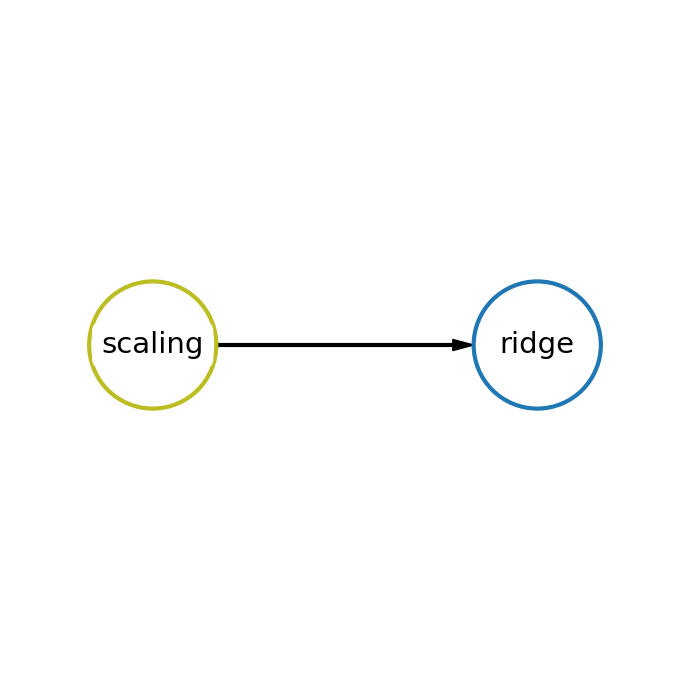

In [24]:
pipeline_cmab.show()

In [25]:
# метрика модели, обученной на 1/100 тренировочного датасета
prediction = model_cmab.predict(test)
r2_score_100 = r2_score(test.target, prediction)
print(r2_score_100)

0.8412996818262358


### FEDOT + NeuralCMAB Agent

In [26]:
model_neuralcmab = Fedot(problem='regression', timeout=30, with_tuning=False, early_stopping_timeout=np.inf,
                  seed=42, logging_level=20, n_jobs=-1, adaptive_mutation_type=MutationAgentTypeEnum.neural_bandit)

pipeline_neuralcmab = model_neuralcmab.fit(train)

2025-06-30 21:03:16,033 - TableTypesCorrector - Preprocessing was unable to define the categorical columns
2025-06-30 21:03:16,201 - AssumptionsHandler - Initial pipeline fitting started
2025-06-30 21:03:20,738 - AssumptionsHandler - Initial pipeline was fitted successfully
2025-06-30 21:03:20,739 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 3.8 MiB, max: 78.5 MiB
2025-06-30 21:03:20,740 - ApiComposer - Initial pipeline was fitted in 4.5 sec.
2025-06-30 21:03:20,742 - ApiComposer - Taking into account n_folds=5, estimated fit time for initial assumption is 22.7 sec.
2025-06-30 21:03:20,743 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2025-06-30 21:03:20,750 - ApiComposer - AutoML configured. Parameters tuning: False. Time limit: 30 min. Set of candidate models: ['adareg', 'catboostreg', 'fast_ica', 'isolation_forest_reg', 'knnreg', 'lasso', 'lgbmreg', 'linear', 'normaliz

Generations:   0%|          | 0/10000 [00:00<?, ?gen/s]

2025-06-30 21:03:20,875 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:03:41,391 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2025-06-30 21:03:41,399 - EvoGraphOptimizer - Generation num: 1 size: 3
2025-06-30 21:03:41,400 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 21:03:42,844 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:04:09,297 - MultiprocessingDispatcher - 21 individuals out of 21 in previous population were evaluated successfully.
2025-06-30 21:04:09,341 - EvoGraphOptimizer - Generation num: 2 size: 21
2025-06-30 21:04:09,342 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 21:04:09,344 - EvoGraphOptimizer - Next population size: 21; max graph depth: 6
2025-06-30 21:04:09,964 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-

Generations:   0%|          | 1/10000 [01:15<209:57:20, 75.59s/gen]

2025-06-30 21:04:36,519 - EvoGraphOptimizer - Generation num: 3 size: 21
2025-06-30 21:04:36,520 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 21:04:36,521 - EvoGraphOptimizer - no improvements for 1 iterations
2025-06-30 21:04:36,523 - EvoGraphOptimizer - spent time: 1.3 min
2025-06-30 21:04:36,524 - EvoGraphOptimizer - Next mutation proba: 0.1; Next crossover proba: 0.9
2025-06-30 21:04:36,526 - EvoGraphOptimizer - Next population size: 34; max graph depth: 6
2025-06-30 21:04:36,853 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:04:42,302 - MultiprocessingDispatcher - 20 individuals out of 20 in previous population were evaluated successfully.
2025-06-30 21:04:42,537 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:05:28,018 - MultiprocessingDispatcher - 14 individuals out of 14 in previous population were evaluated successfully.
2025-06-30 21:05:28,020 - ReproductionCont

Generations:   0%|          | 2/10000 [02:07<171:04:33, 61.60s/gen]

2025-06-30 21:05:28,354 - EvoGraphOptimizer - Generation num: 4 size: 34
2025-06-30 21:05:28,356 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 21:05:28,357 - EvoGraphOptimizer - no improvements for 2 iterations
2025-06-30 21:05:28,359 - EvoGraphOptimizer - spent time: 2.1 min
2025-06-30 21:05:28,360 - EvoGraphOptimizer - Next mutation proba: 0.2613156507622575; Next crossover proba: 0.7386843492377425
2025-06-30 21:05:28,362 - EvoGraphOptimizer - Next population size: 55; max graph depth: 6
2025-06-30 21:05:28,878 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:10:21,551 - MultiprocessingDispatcher - 34 individuals out of 34 in previous population were evaluated successfully.
2025-06-30 21:10:21,948 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:15:05,884 - MultiprocessingDispatcher - 22 individuals out of 22 in previous population were evaluated successfully.
2025-06-30 2

Generations:   0%|          | 3/10000 [11:46<826:59:36, 297.81s/gen]

2025-06-30 21:15:07,302 - EvoGraphOptimizer - Generation num: 5 size: 55
2025-06-30 21:15:07,304 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 21:15:07,305 - EvoGraphOptimizer - Next population size: 55; max graph depth: 6
2025-06-30 21:15:08,102 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:20:01,724 - MultiprocessingDispatcher - 54 individuals out of 54 in previous population were evaluated successfully.
2025-06-30 21:20:01,726 - ReproductionController - Reproduction achieved pop size 54 using 1 attempt(s) with success rate 0.924
2025-06-30 21:20:01,727 - NeuralContextualMultiArmedBanditAgent - len=10 nonzero=1 avg=-0.811 std=0.000 min=-0.811 max=-0.811 
2025-06-30 21:20:01,728 - NeuralContextualMultiArmedBanditAgent - actions/rewards: [('single_change', 0.0), ('single_change', -0.0), ('single_change', -0.8108), ('single_change', 0.0), ('single_change', 0.0), ('single_change', 0.0), ('singl

Generations:   0%|          | 4/10000 [16:41<824:09:18, 296.81s/gen]

2025-06-30 21:20:02,493 - EvoGraphOptimizer - Generation num: 6 size: 13
2025-06-30 21:20:02,495 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 21:20:02,496 - EvoGraphOptimizer - no improvements for 1 iterations
2025-06-30 21:20:02,498 - EvoGraphOptimizer - spent time: 16.7 min
2025-06-30 21:20:02,499 - EvoGraphOptimizer - Next mutation proba: 0.998752368069621; Next crossover proba: 0.0012476319303790229
2025-06-30 21:20:02,500 - EvoGraphOptimizer - Next population size: 13; max graph depth: 6
2025-06-30 21:20:02,709 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:24:44,341 - MultiprocessingDispatcher - 12 individuals out of 12 in previous population were evaluated successfully.
2025-06-30 21:24:44,343 - ReproductionController - Reproduction achieved pop size 12 using 1 attempt(s) with success rate 0.916
2025-06-30 21:24:44,345 - NeuralContextualMultiArmedBanditAgent - len=12 nonzero=12 avg=-0.

Generations:   0%|          | 5/10000 [21:24<810:32:16, 291.94s/gen]

2025-06-30 21:24:45,788 - EvoGraphOptimizer - Generation num: 7 size: 13
2025-06-30 21:24:45,790 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 21:24:45,791 - EvoGraphOptimizer - no improvements for 2 iterations
2025-06-30 21:24:45,792 - EvoGraphOptimizer - spent time: 21.4 min
2025-06-30 21:24:45,794 - EvoGraphOptimizer - Next mutation proba: 0.9893326361004636; Next crossover proba: 0.010667363899536375
2025-06-30 21:24:45,795 - EvoGraphOptimizer - Next population size: 13; max graph depth: 6
2025-06-30 21:24:46,005 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:29:22,513 - MultiprocessingDispatcher - 12 individuals out of 12 in previous population were evaluated successfully.
2025-06-30 21:29:22,515 - ReproductionController - Reproduction achieved pop size 12 using 1 attempt(s) with success rate 0.908
2025-06-30 21:29:22,516 - NeuralContextualMultiArmedBanditAgent - len=12 nonzero=9 avg=-0.4

Generations:   0%|          | 6/10000 [26:02<796:56:36, 287.07s/gen]

2025-06-30 21:29:23,412 - EvoGraphOptimizer - Generation num: 8 size: 13
2025-06-30 21:29:23,413 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 21:29:23,415 - EvoGraphOptimizer - no improvements for 3 iterations
2025-06-30 21:29:23,416 - EvoGraphOptimizer - spent time: 26.0 min
2025-06-30 21:29:23,417 - EvoGraphOptimizer - Next mutation proba: 0.9676215590386233; Next crossover proba: 0.03237844096137665
2025-06-30 21:29:23,419 - EvoGraphOptimizer - Next population size: 13; max graph depth: 6
2025-06-30 21:29:23,651 - MultiprocessingDispatcher - Number of used CPU's: 16
2025-06-30 21:30:36,658 - MultiprocessingDispatcher - 12 individuals out of 12 in previous population were evaluated successfully.
2025-06-30 21:30:36,660 - ReproductionController - Reproduction achieved pop size 12 using 1 attempt(s) with success rate 0.901
2025-06-30 21:30:36,661 - NeuralContextualMultiArmedBanditAgent - len=12 nonzero=8 avg=-0.28

Generations:   0%|          | 7/10000 [27:16<603:37:52, 217.46s/gen]

2025-06-30 21:30:37,549 - EvoGraphOptimizer - Generation num: 9 size: 13
2025-06-30 21:30:37,551 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 21:30:37,552 - EvoGraphOptimizer - no improvements for 4 iterations
2025-06-30 21:30:37,553 - EvoGraphOptimizer - spent time: 27.3 min
2025-06-30 21:30:37,555 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 7/10000 [27:16<649:01:19, 233.81s/gen]

2025-06-30 21:30:37,557 - OptimisationTimer - Composition time: 27.278 min
2025-06-30 21:30:37,559 - OptimisationTimer - Algorithm was terminated due to processing time limit
2025-06-30 21:30:37,563 - EvoGraphOptimizer - Generation num: 10 size: 1
2025-06-30 21:30:37,565 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<rmse=0.020 node_number=0.200>']
2025-06-30 21:30:37,566 - EvoGraphOptimizer - no improvements for 5 iterations
2025-06-30 21:30:37,568 - EvoGraphOptimizer - spent time: 27.3 min
2025-06-30 21:30:37,571 - GPComposer - GP composition finished


2025-06-30 21:30:37,741 - ApiComposer - Model generation finished
2025-06-30 21:30:39,877 - FEDOT logger - Final pipeline was fitted
2025-06-30 21:30:39,879 - FEDOT logger - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [catboostreg, fast_ica]}
catboostreg - {'n_jobs': 16, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': False, 'allow_writing_files': False, 'use_eval_set': True, 'use_best_model': True, 'enable_categorical': True}
fast_ica - {'whiten': 'unit-variance'}
2025-06-30 21:30:39,880 - MemoryAnalytics - Memory consumption for finish in main session: current 37.2 MiB, max: 78.5 MiB


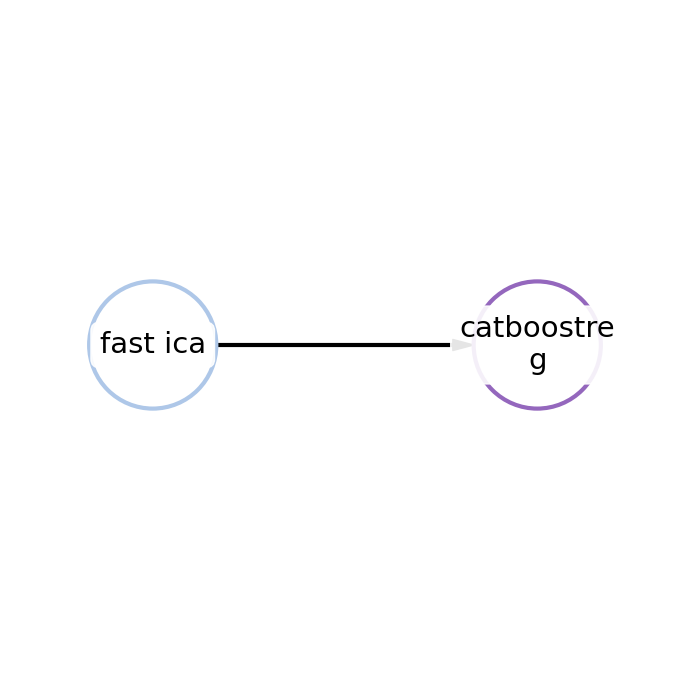

In [27]:
pipeline_neuralcmab.show()

In [28]:
# метрика модели, обученной на 1/100 тренировочного датасета
prediction = model_neuralcmab.predict(test)
r2_score_100 = r2_score(test.target, prediction)
print(r2_score_100)

0.8424041903082468
